In [1]:
from Preprocessing_Module import read_data, add_topological, add_landcover, merge_new_data, fill_data, select_columns, reshape_dataset, fillna_dataset, remove_nan_features, statistics, plot_correlations, temp_rainfall_plot
from Feature_Expansion_Module import feature_expansion
from Initializer_Module import initializer
from XGboost_Model_Module import Xgboost_model
from Neural_Network_Module import FeedforwardNeuralNetModel
from Model_Validation_Module import give_predictions_nn, evaluate_nn, give_predictions_xgboost, evaluate_xgboost, validate_results2, merge_predictions
import numpy as np
import pandas as pd

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)

In [3]:
data = read_data('../Datasets/Serbia/Vojvodina/SER_vojvodina_culex_2010_2023.csv')
data = merge_new_data('../Datasets/Serbia/Vojvodina/2023/SER_vojvodina_env_05_2023_2km_processed.csv', data)
data = merge_new_data('../Datasets/Serbia/Vojvodina/2023/SER_vojvodina_env_06_2023_2km_processed.csv', data)
data = merge_new_data('../Datasets/Serbia/Vojvodina/2023/SER_vojvodina_env_07_2023_2km_processed.csv', data)
data = merge_new_data('../Datasets/Serbia/Vojvodina/2023/SER_vojvodina_env_08_2023_2km_processed.csv', data)
data = merge_new_data('../Datasets/Serbia/Vojvodina/2023/SER_vojvodina_env_09_2023_2km_processed.csv', data)
data = merge_new_data('../Datasets/Serbia/Vojvodina/2023/SER_vojvodina_env_10_2023_2km_processed.csv', data)
columns = ['dt_placement', 'x', 'y', 'culex.spp', 'ndvi', 'ndwi', 'ndmi', 'ndbi',
           'ndvi_mean', 'ndvi_std', 'ndwi_mean', 'ndwi_std', 'ndmi_mean',
           'ndmi_std', 'ndbi_mean', 'ndbi_std', 'lst_day', 'lst_night',
           'acc_rainfall_1week', 'acc_rainfall_2week', 'acc_rainfall_jan',
           'lst_jan_day_mean', 'lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean',
           'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean']
names = ['dt_placement', 'x', 'y', 'mosq_now', 'ndvi', 'ndwi', 'ndmi', 'ndbi',
         'ndvi_mean', 'ndvi_std', 'ndwi_mean', 'ndwi_std', 'ndmi_mean',
         'ndmi_std', 'ndbi_mean', 'ndbi_std', 'lst_day', 'lst_night',
         'acc_rainfall_1week', 'acc_rainfall_2week', 'acc_rainfall_jan',
         'lst_jan_day_mean', 'lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean',
         'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean']
data = select_columns(data,columns,names)
data = add_topological(data,'../Datasets/Topological Datasets/2x2grid/serbia_vojvodina_2km_geo.csv')
data = add_landcover(data,'../Datasets/Landcover Datasets/2x2grid/serbia_vojvodina_2km_lulc.csv')
data = reshape_dataset(data,['x','y','dt_placement'])
data = fillna_dataset(data,{'acc_rainfall_1week':0, 'acc_rainfall_2week':0, 'acc_rainfall_jan':0})

Index(['station_id', 'x', 'y', 'dt_placement', 'week', 'month', 'year',
       'country_code', 'nuts0_code', 'nuts0_name', 'nuts1_code', 'nuts1_name',
       'nuts2_code', 'nuts2_name', 'nuts3_code', 'nuts3_name',
       'lau1_municipality', 'lau2_settlement', 'trap_type', 'culex.spp',
       'region', 'dt_placement_original', 'indices_image_date', 'indices_lat',
       'indices_lon', 'ndvi', 'ndmi', 'ndwi', 'ndbi', 'ndvi_mean', 'ndmi_mean',
       'ndwi_mean', 'ndbi_mean', 'ndvi_std', 'ndmi_std', 'ndwi_std',
       'ndbi_std', 'lst_image_date', 'lst_lat', 'lst_lon', 'lst_day',
       'lst_night', 'monthly_lst_lat', 'monthly_lst_lon', 'lst_jan_day_mean',
       'lst_jan_night_mean', 'lst_feb_day_mean', 'lst_feb_night_mean',
       'lst_mar_day_mean', 'lst_mar_night_mean', 'lst_apr_day_mean',
       'lst_apr_night_mean', 'indices_image_date.1', 'indices_lat.1',
       'indices_lon.1', 'acc_rainfall_jan', 'dt_placement_minus_7',
       'dt_placement_minus_14', 'dt_placement_minus_7_avail

In [4]:
# set the filename for export
case = 'Culex_Serbia_'

# set the filename to export
path = './predictions/Serbia/'

# set the name of the date column
date_col = 'dt_placement'

# set the model type. Could be 'class_regression' or 'mosquito_regression' or 'classification'
model_type = 'class_regression'

In [5]:
data = feature_expansion(data)

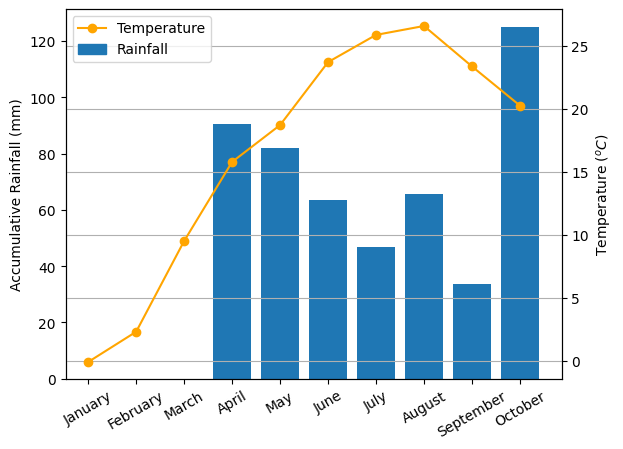

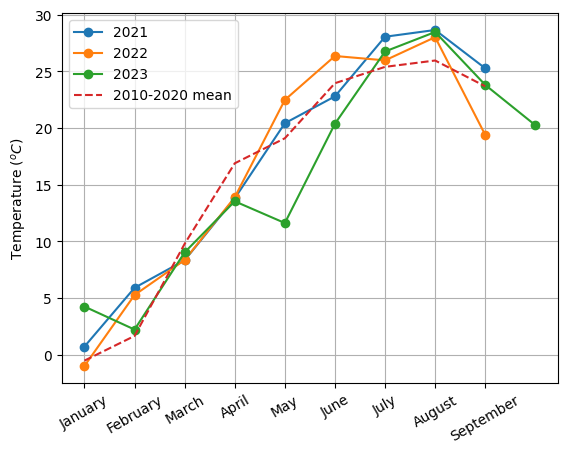

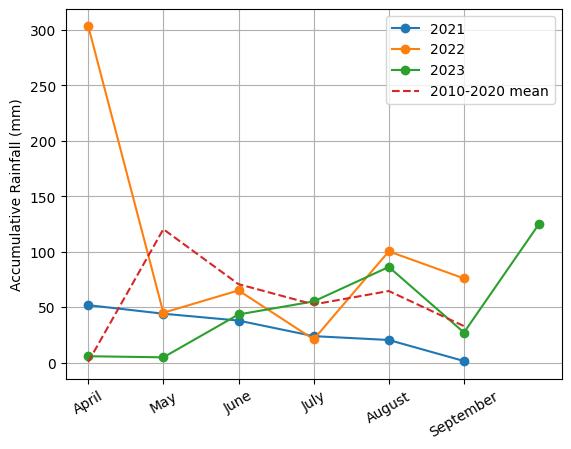

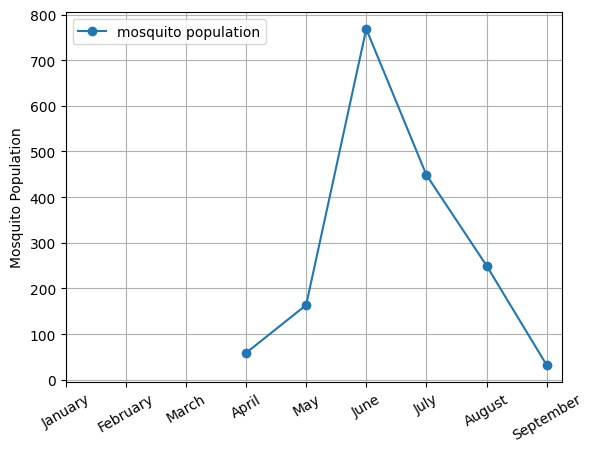

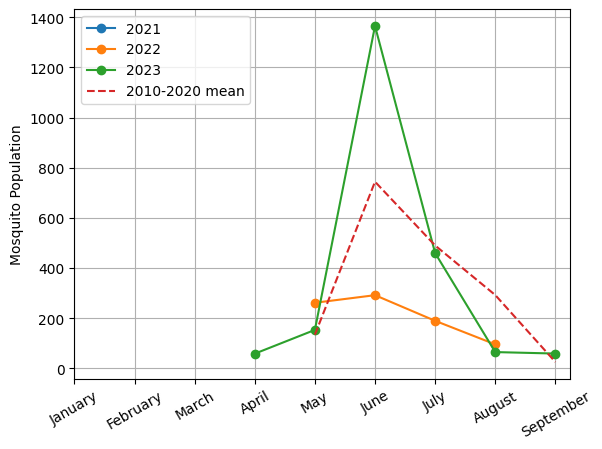

In [6]:
temp_rainfall_plot(data, rainfall_column='acc_rainfall_2week')

Total observatons: 2181
Number of unique traps: 173
Start date: 2010-08-18 00:00:00
End date: 2023-09-04 00:00:00


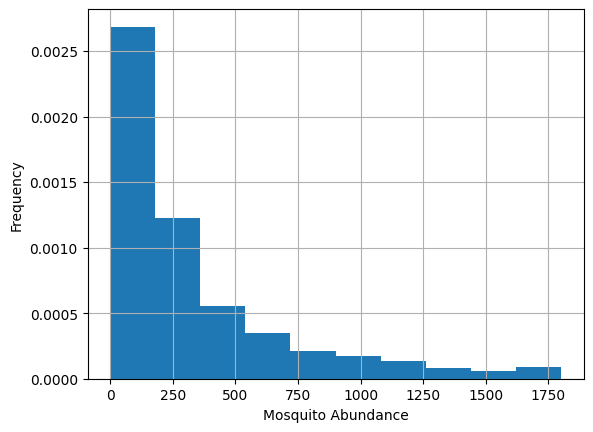

Mean: 473.4768454837231
Std: 1007.8865015650408
Skewness: 10.254792010067924
kurtosis: 179.1086743808113
2021 number of observations: 0
2022 number of observations: 325
2023 number of observations: 339
All operational years observations: 664
Number of fixed traps: 114
Number of temporal traps: 59


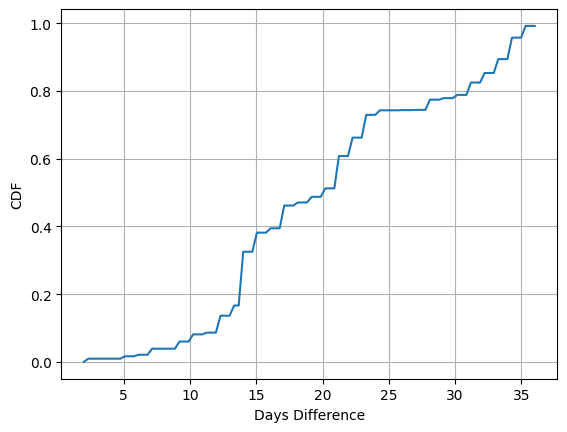

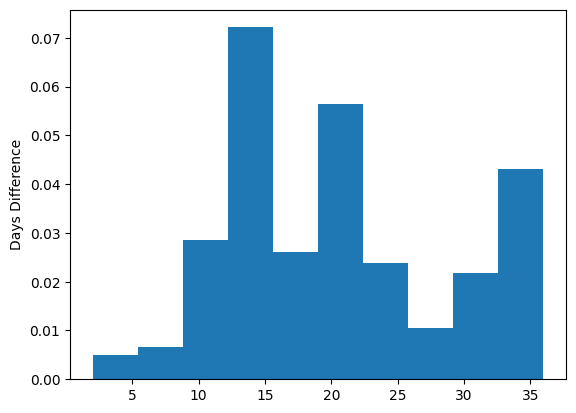

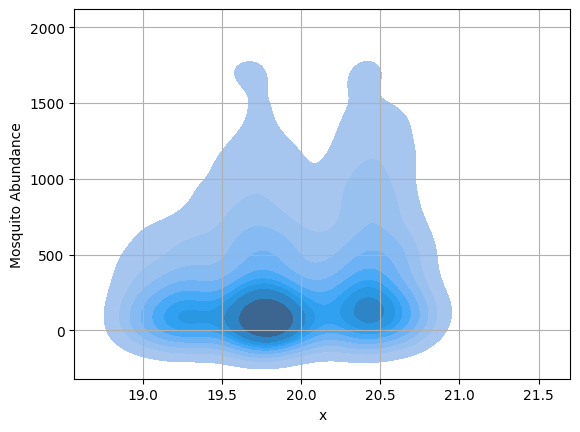

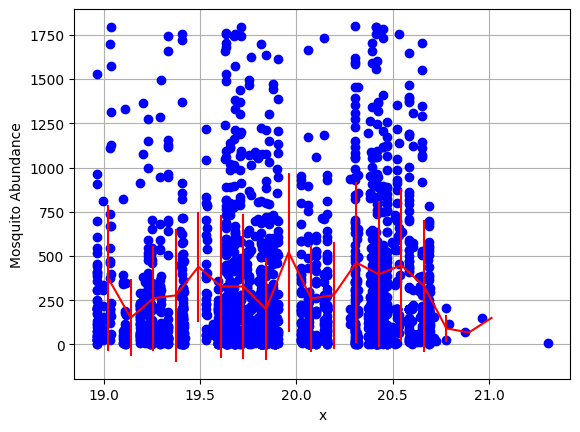

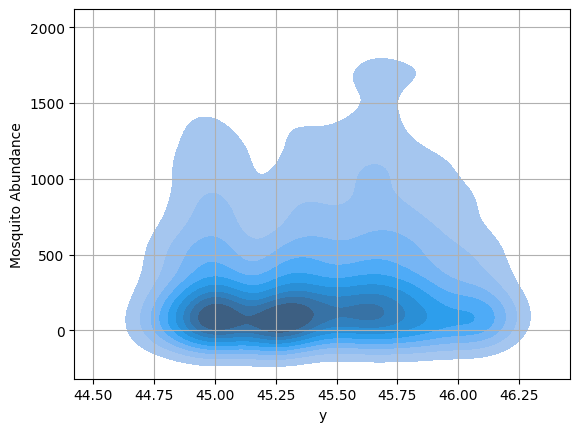

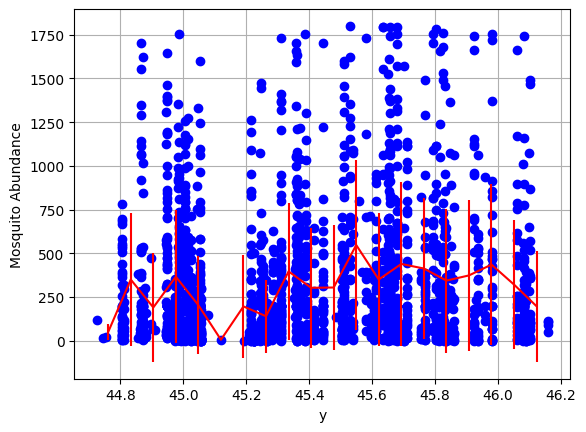

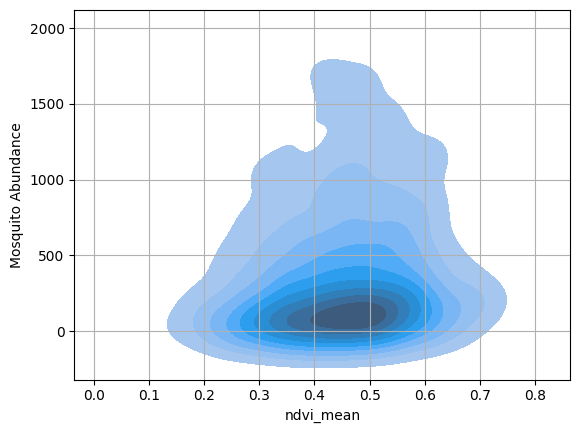

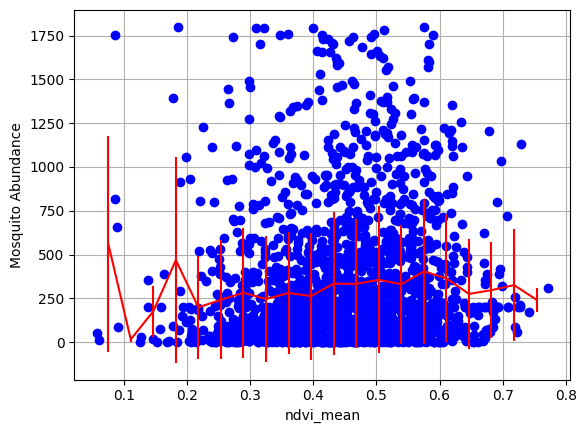

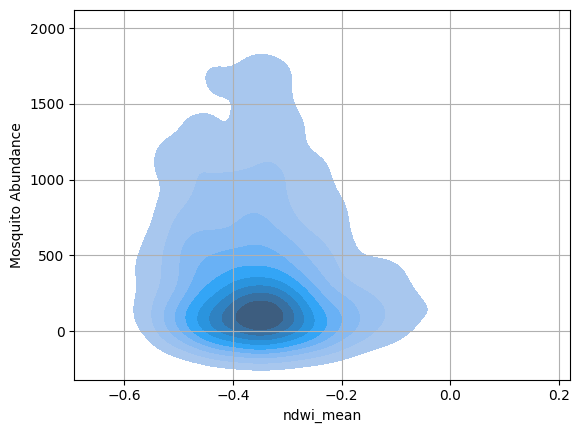

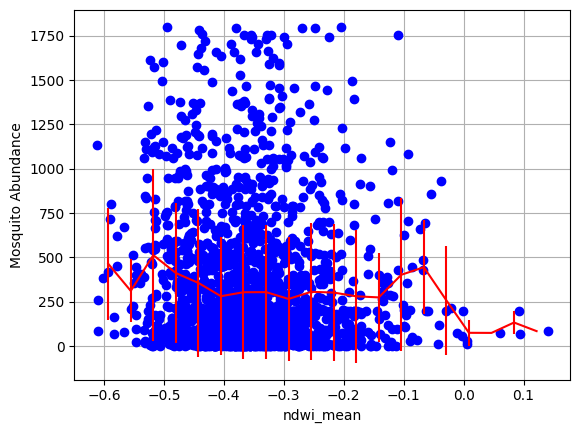

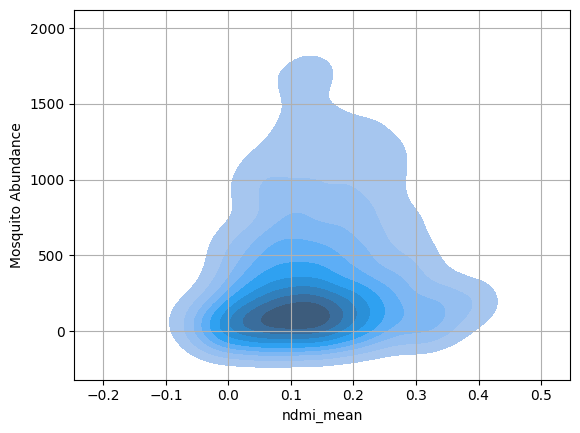

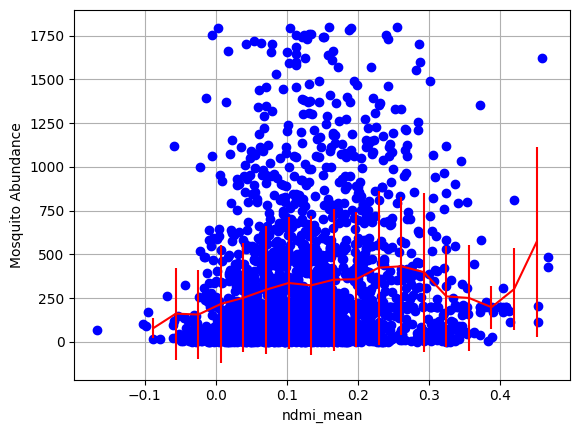

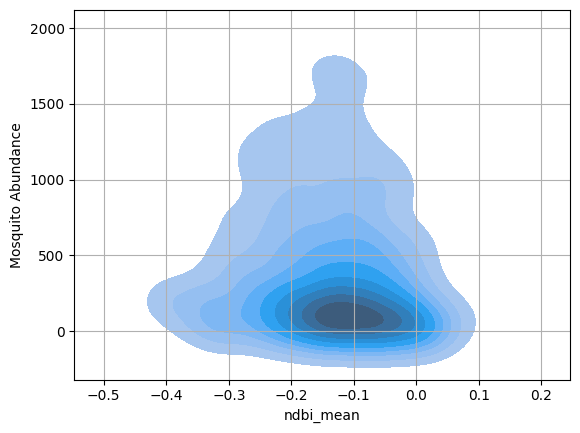

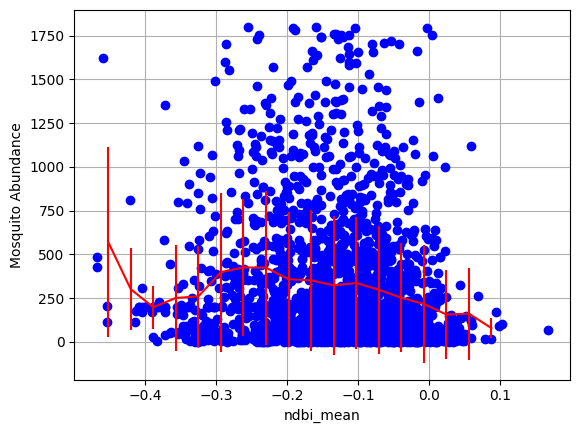

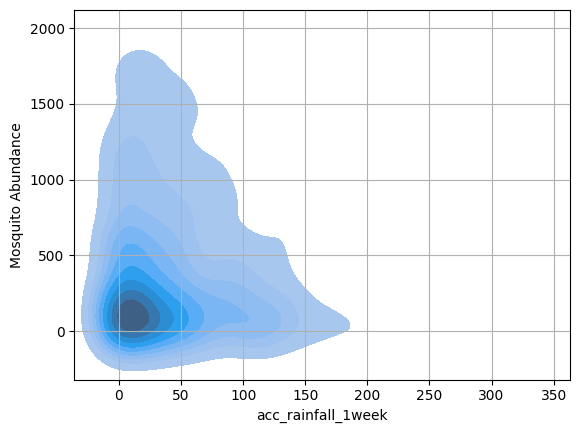

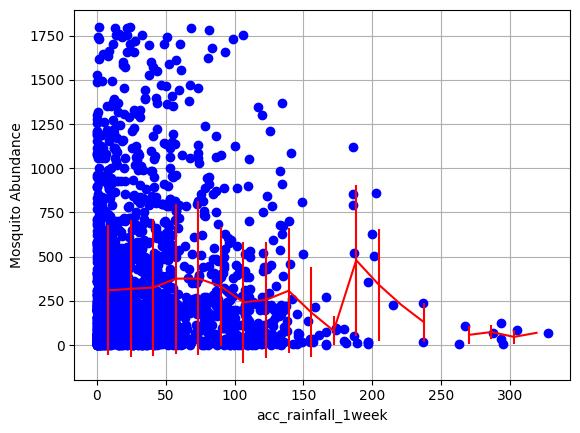

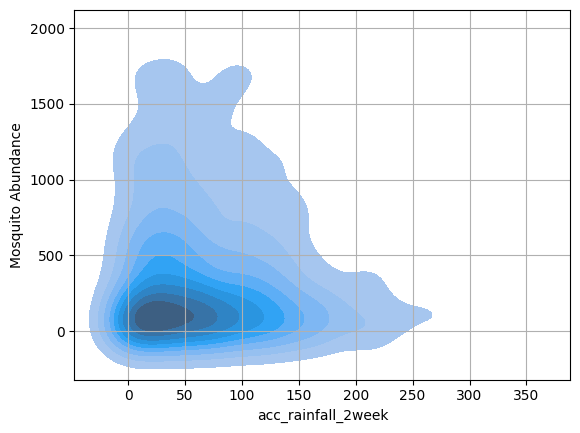

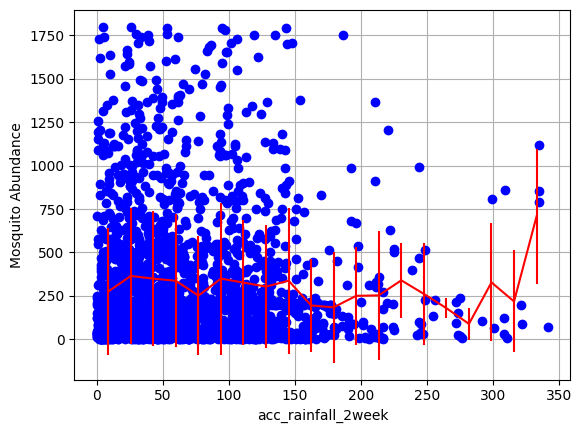

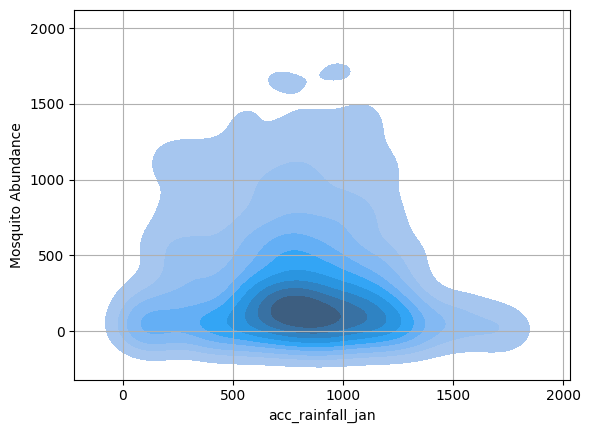

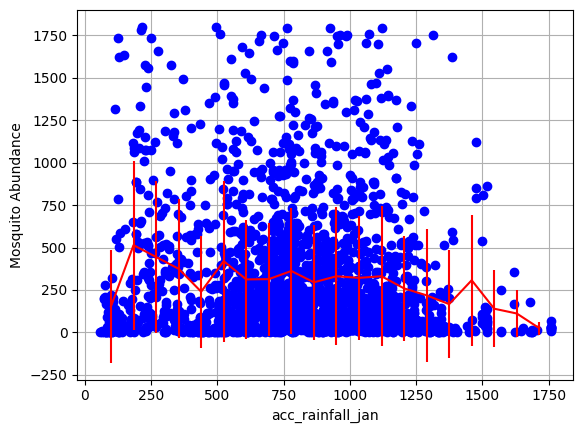

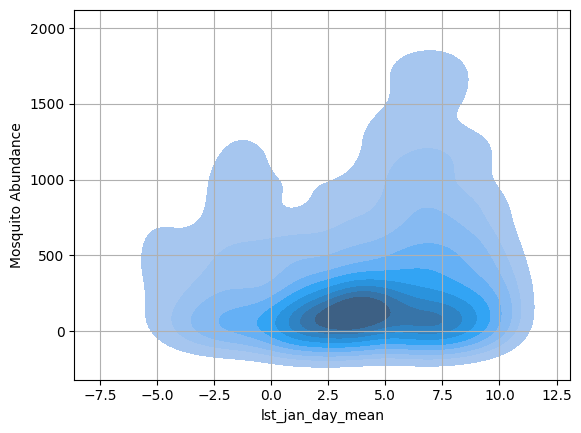

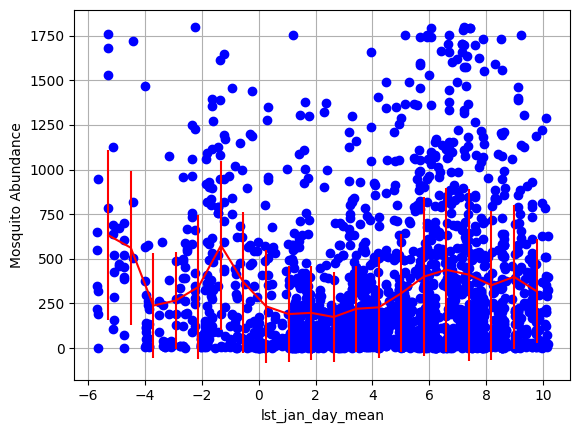

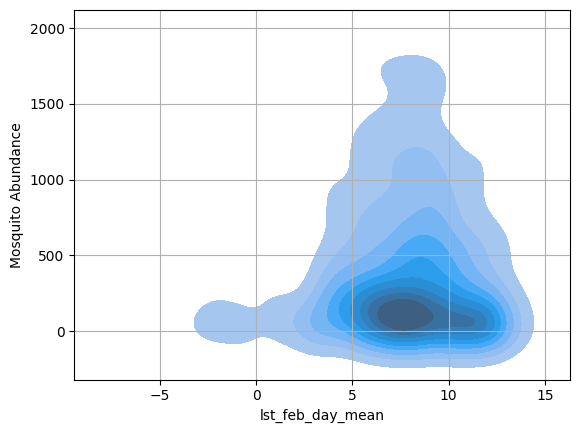

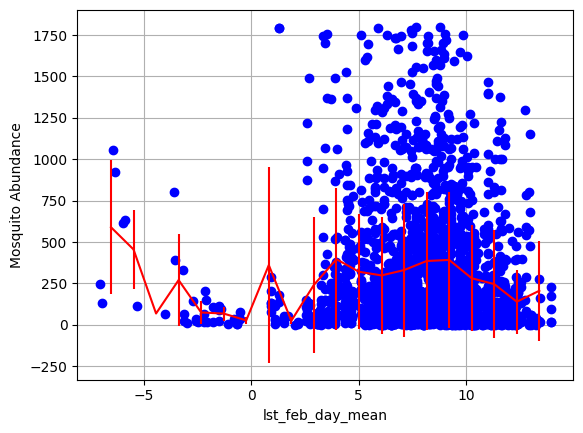

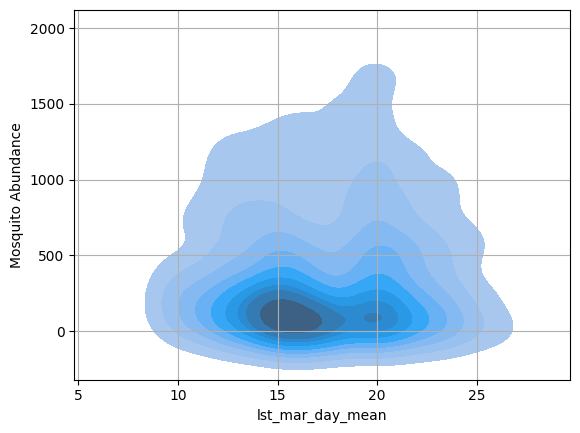

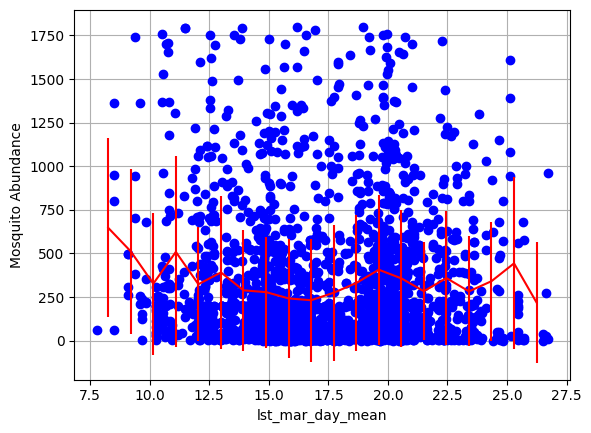

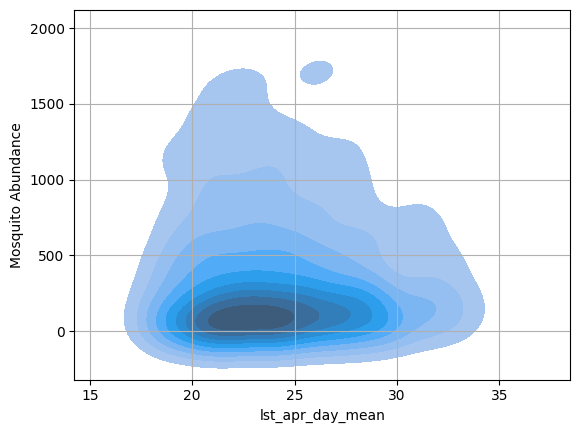

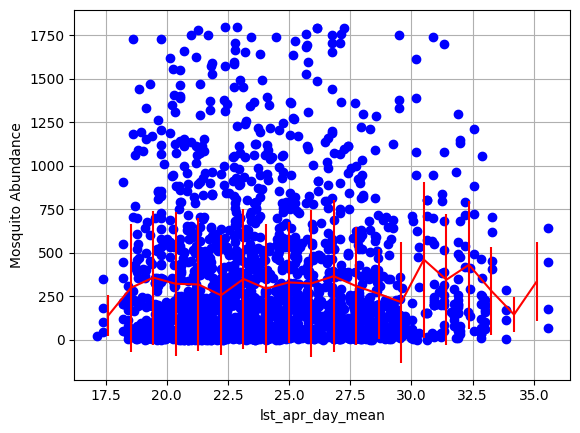

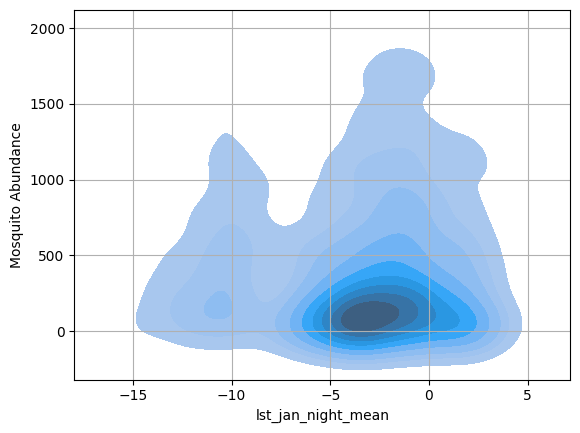

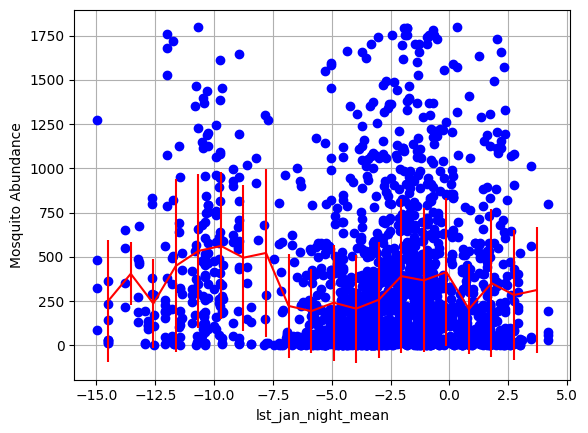

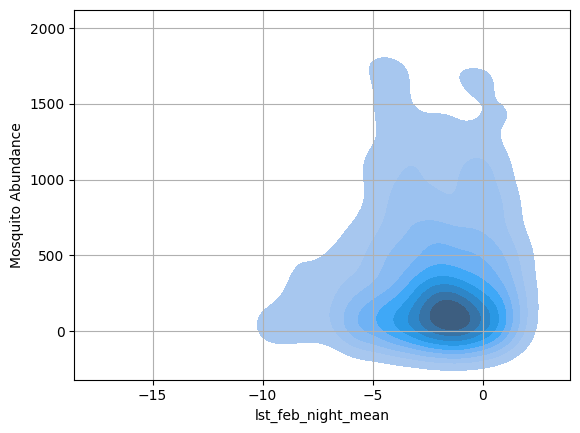

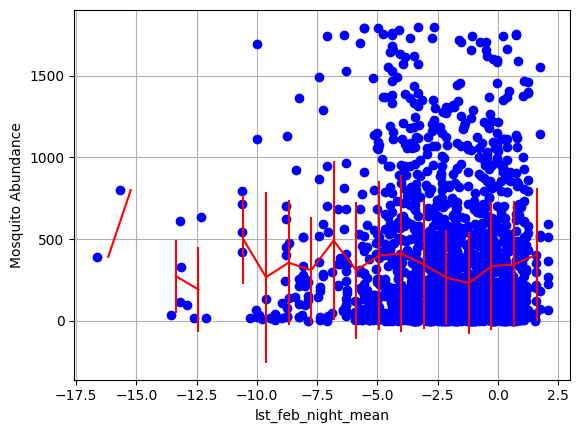

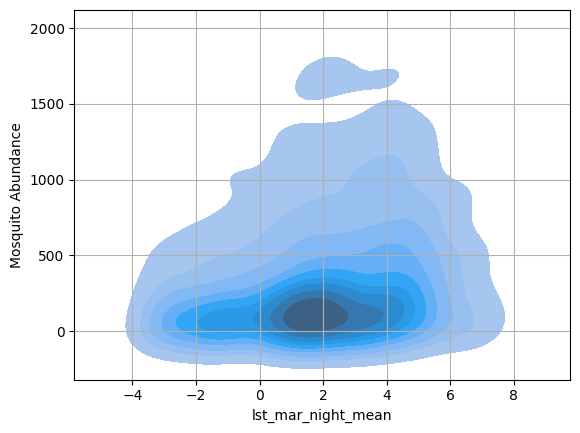

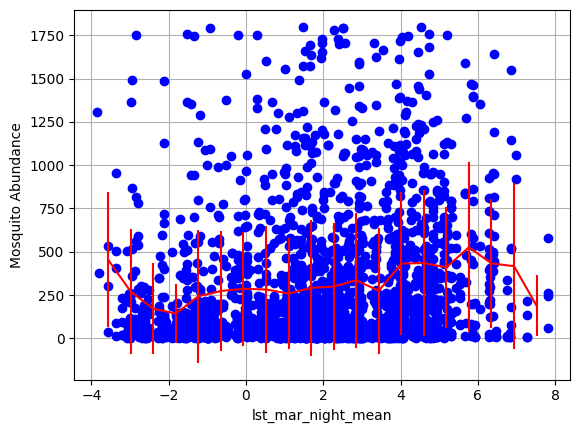

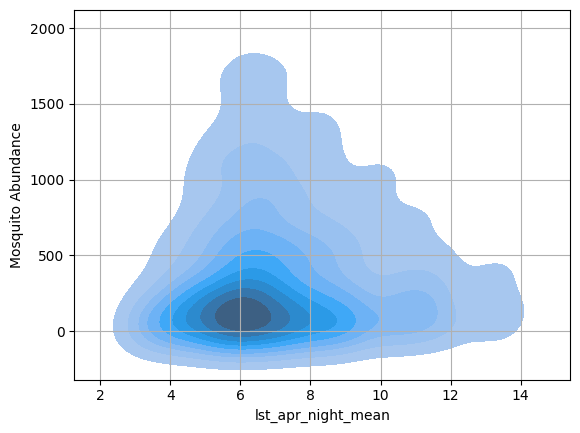

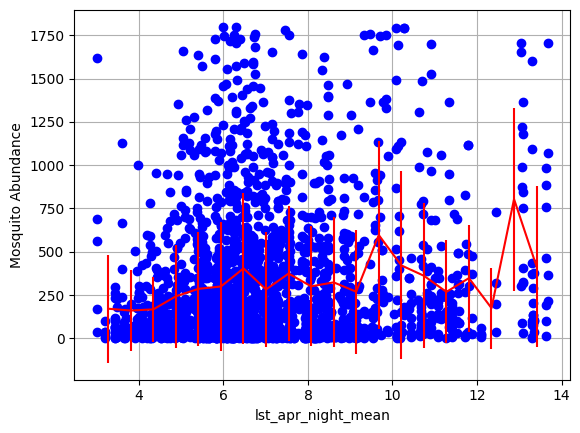

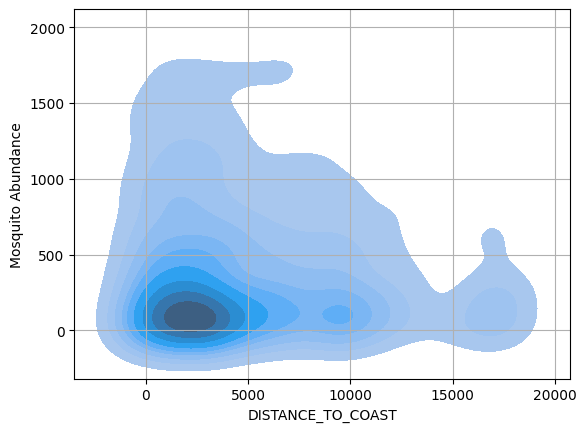

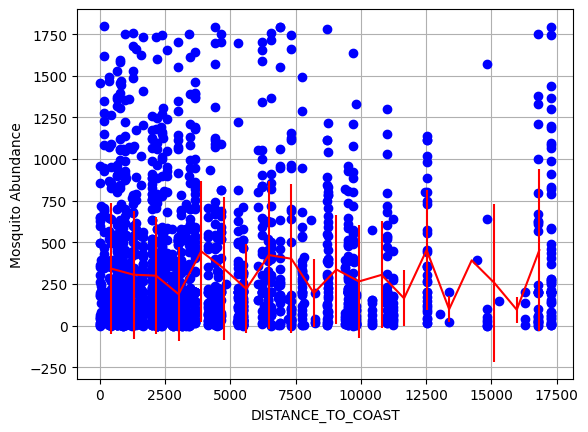

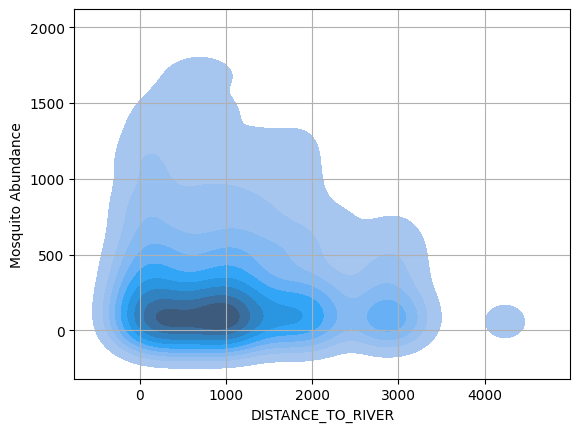

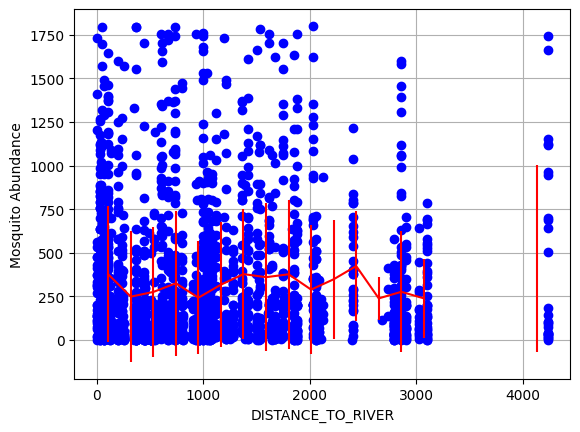

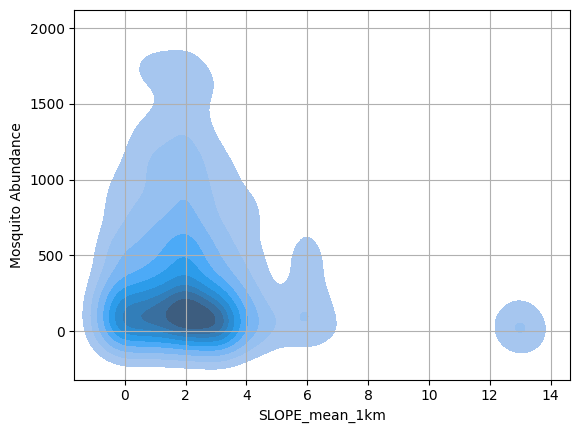

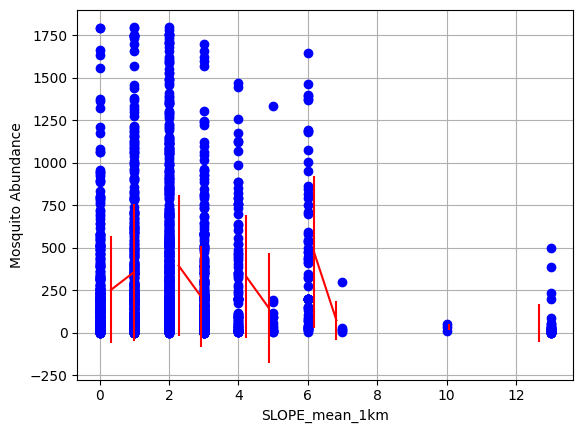

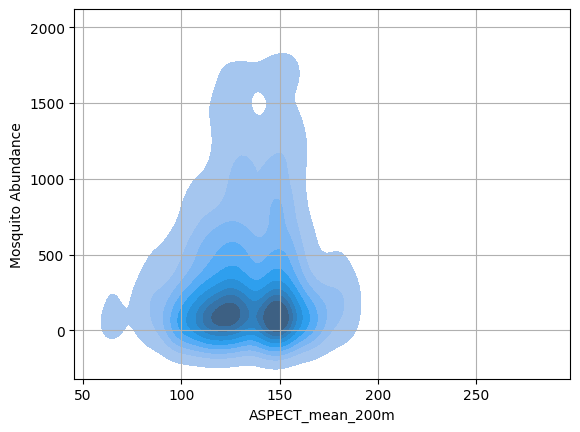

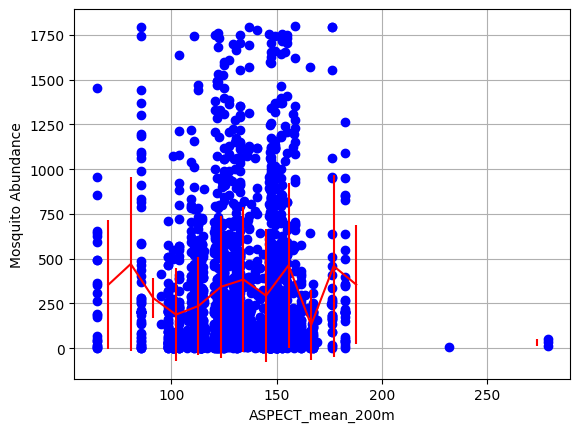

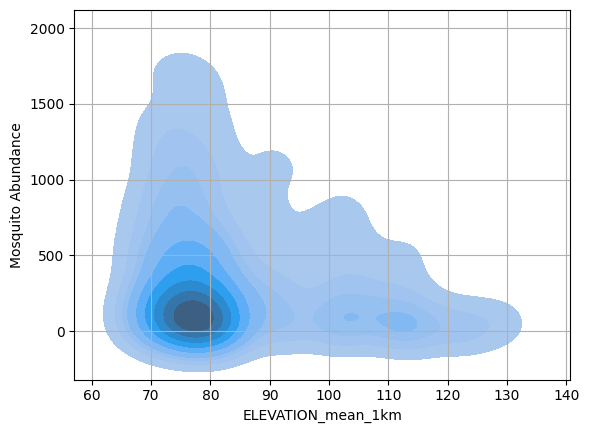

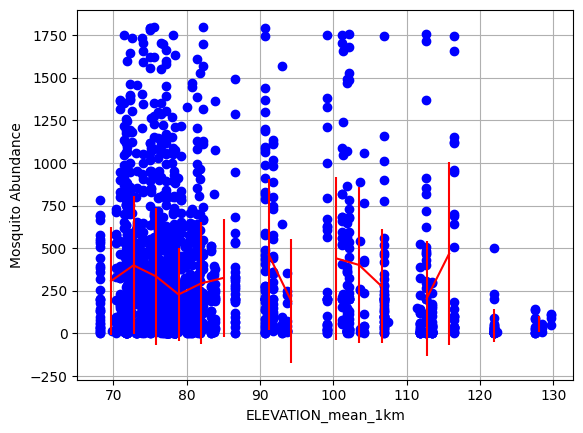

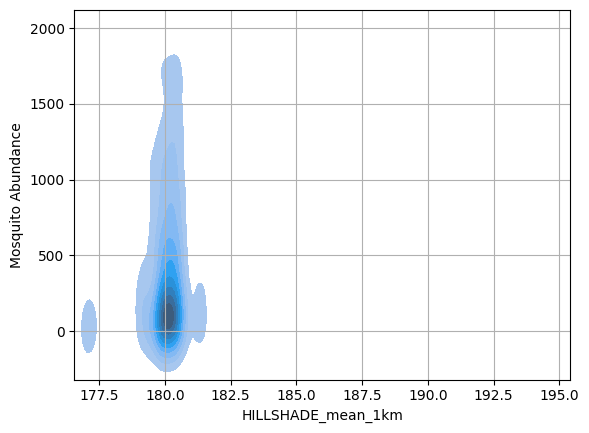

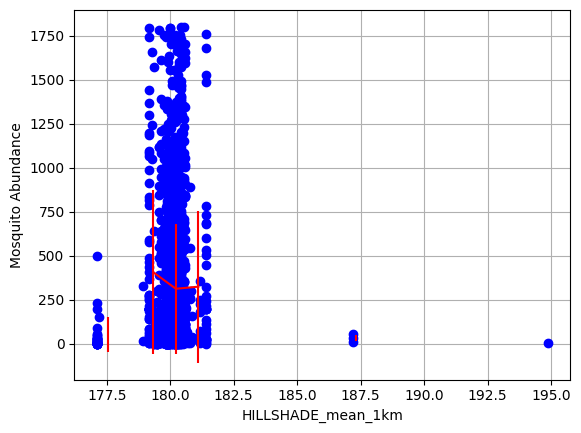

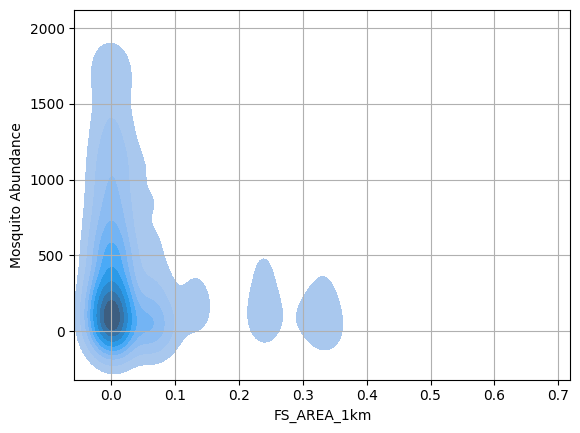

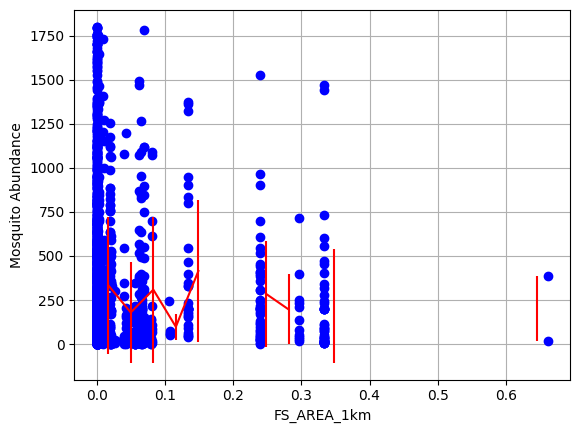

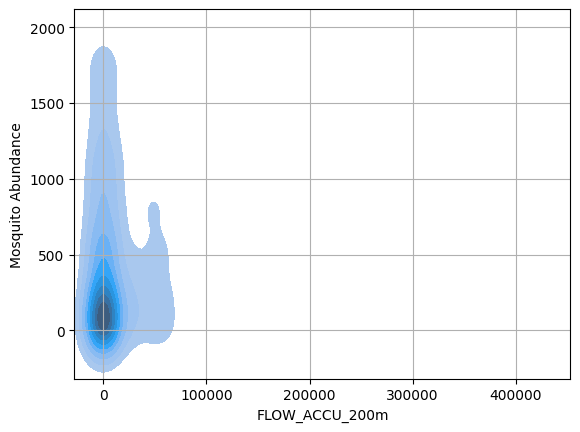

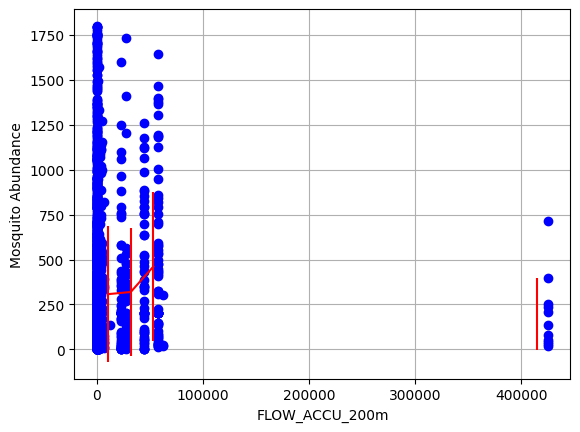

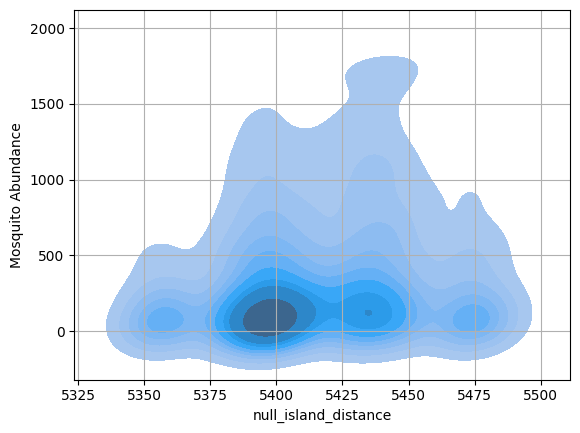

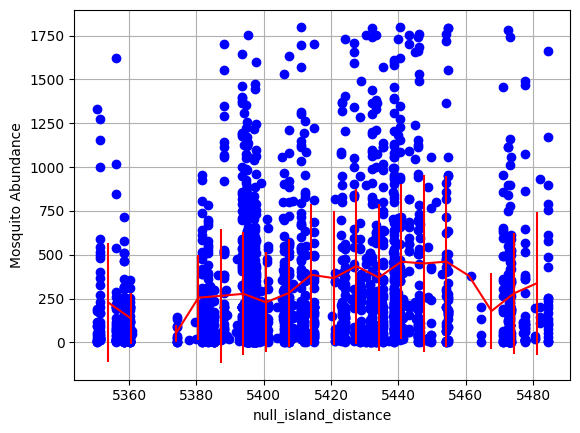

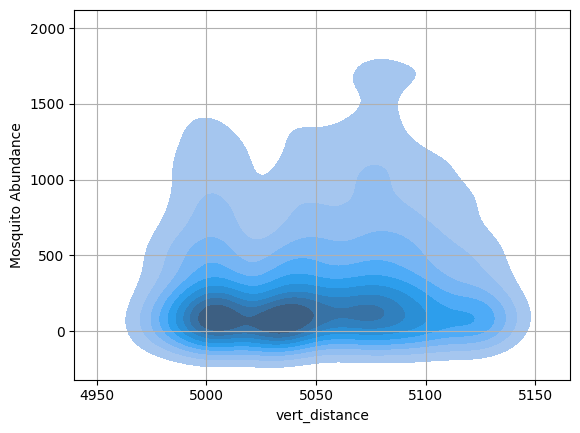

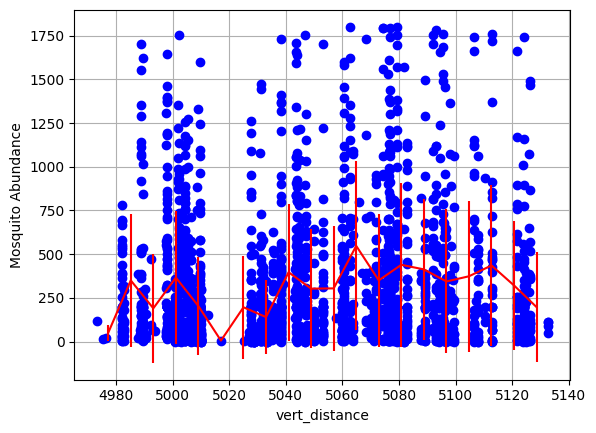

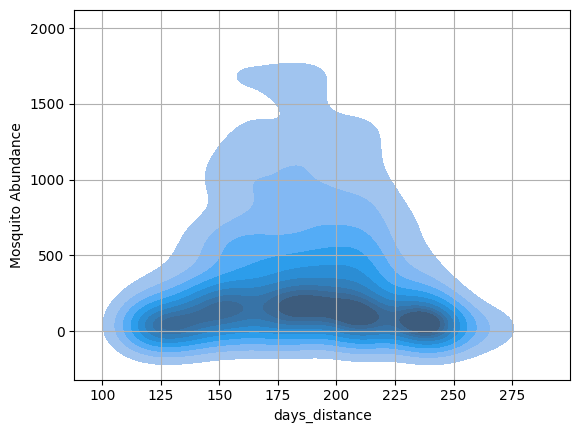

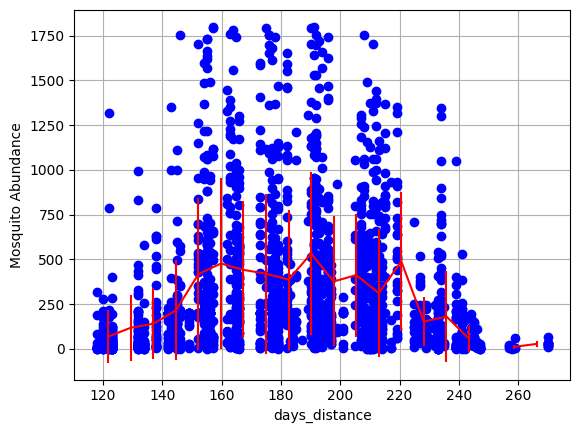

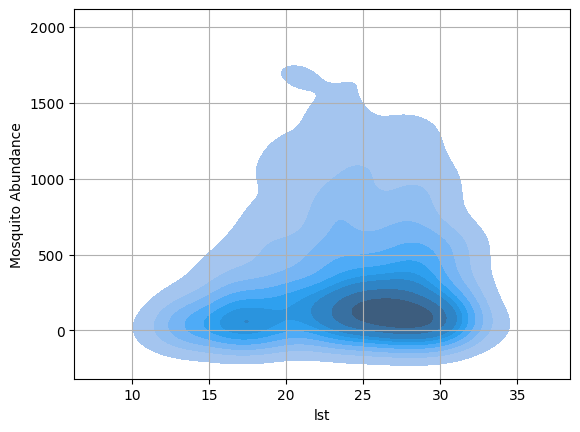

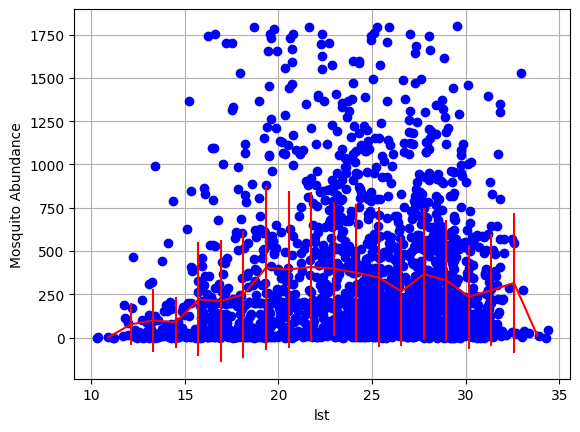

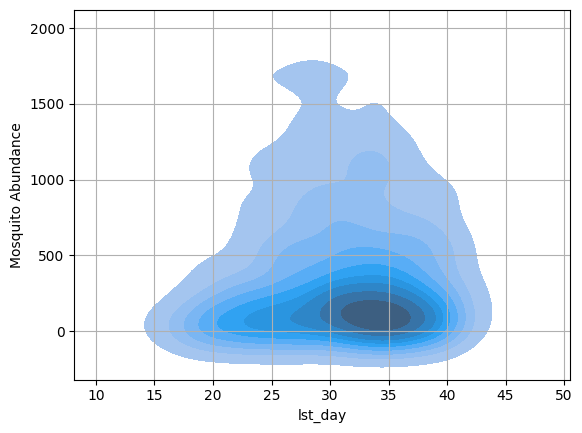

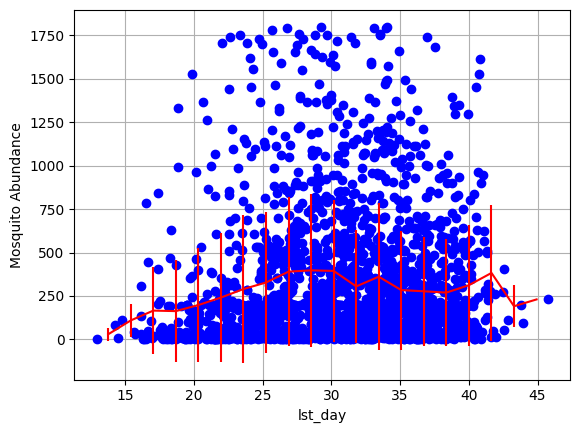

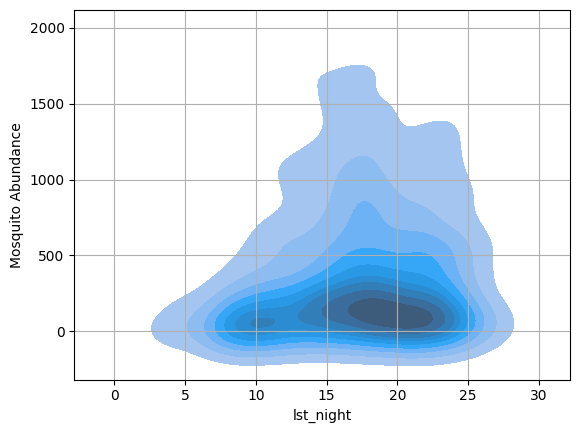

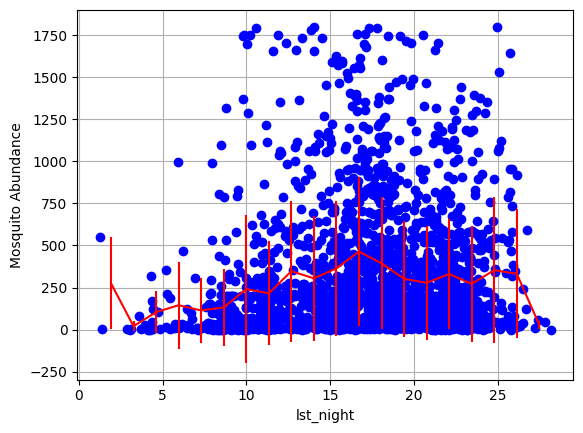

In [7]:
statistics(data)

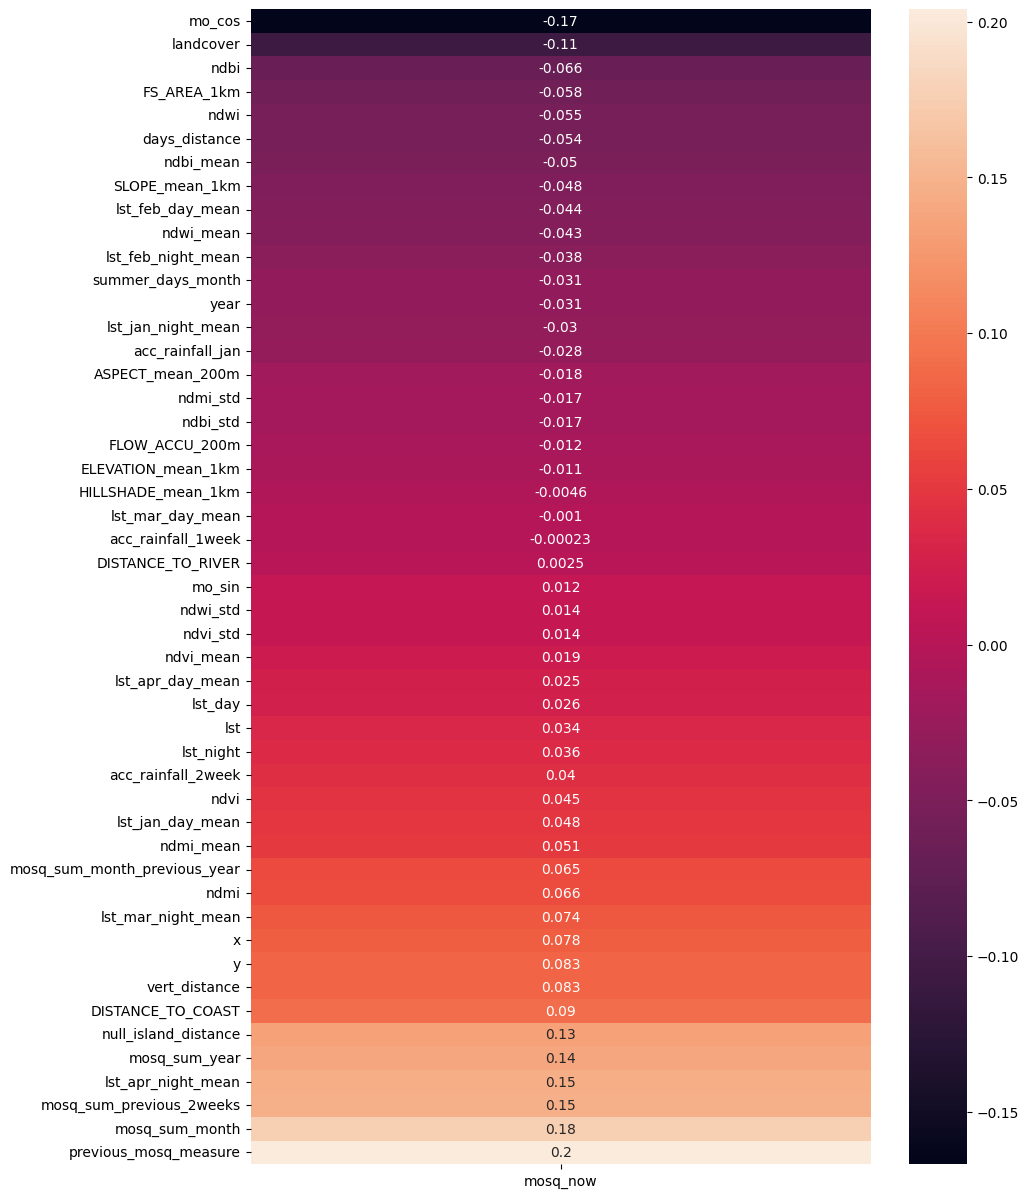

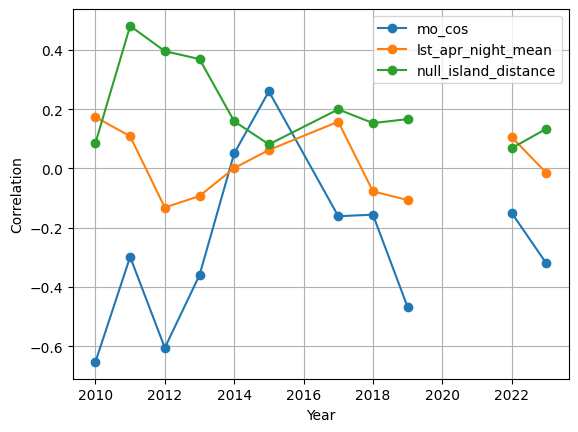

In [8]:
plot_correlations(data)

In [6]:
data = initializer(data, model_type, 10, dropna=False)

Bounds: [    0.    12.    35.    71.   134.   200.   256.   413.   638.  1144.
 23248.]


In [10]:
data['mosq_now'].value_counts().sort_index()

mosq_now
0.0    221
1.0    224
2.0    212
3.0    224
4.0    307
5.0    121
6.0    220
7.0    216
8.0    218
9.0    218
Name: count, dtype: int64

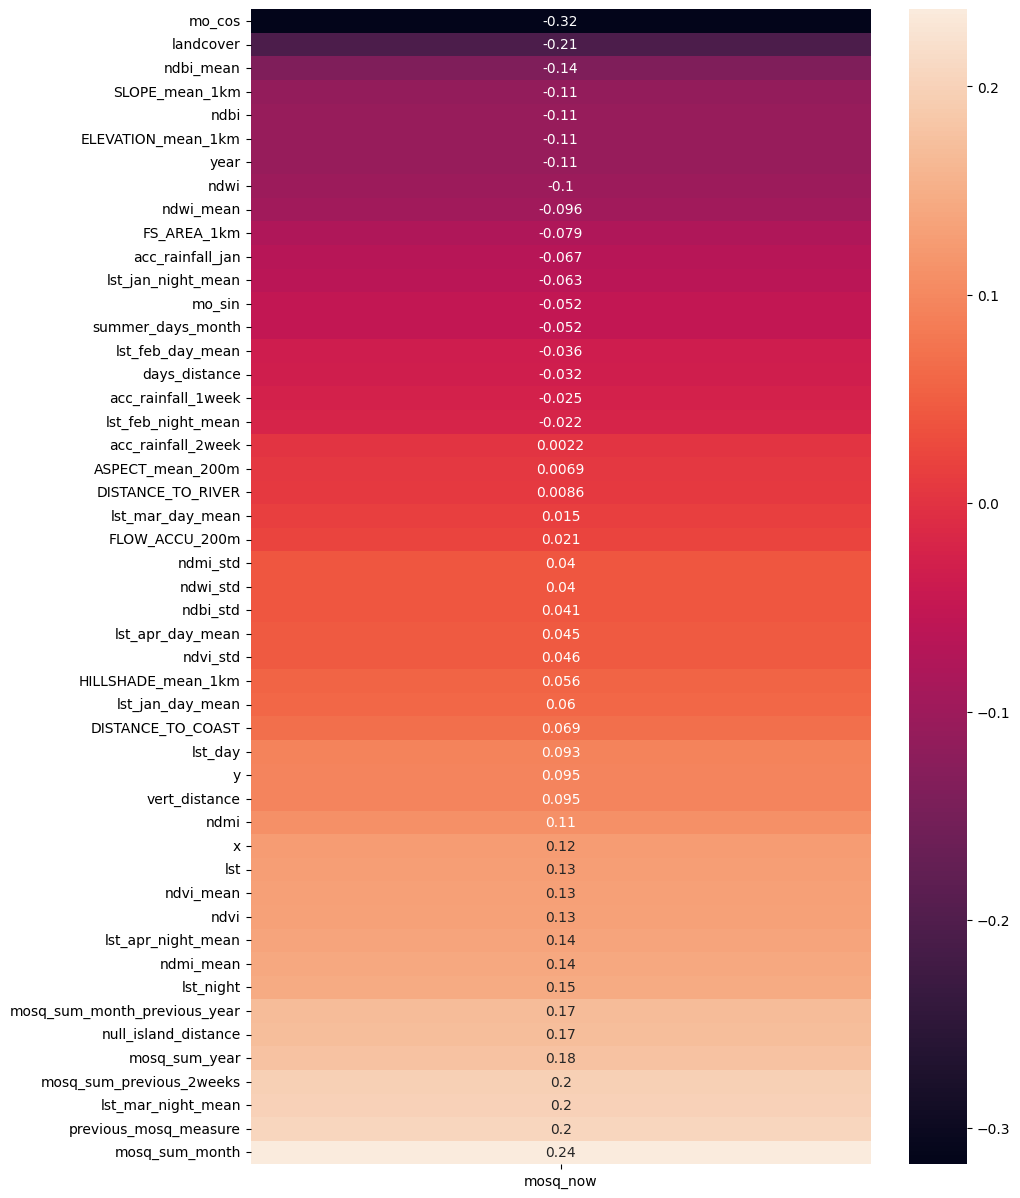

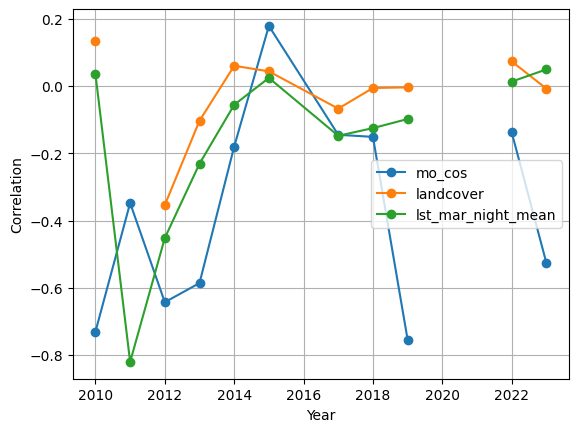

In [11]:
plot_correlations(data)

#===========================================
Predictions without entomological features
#===========================================



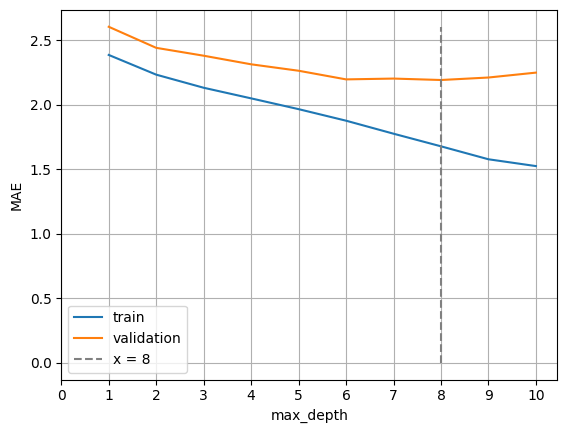

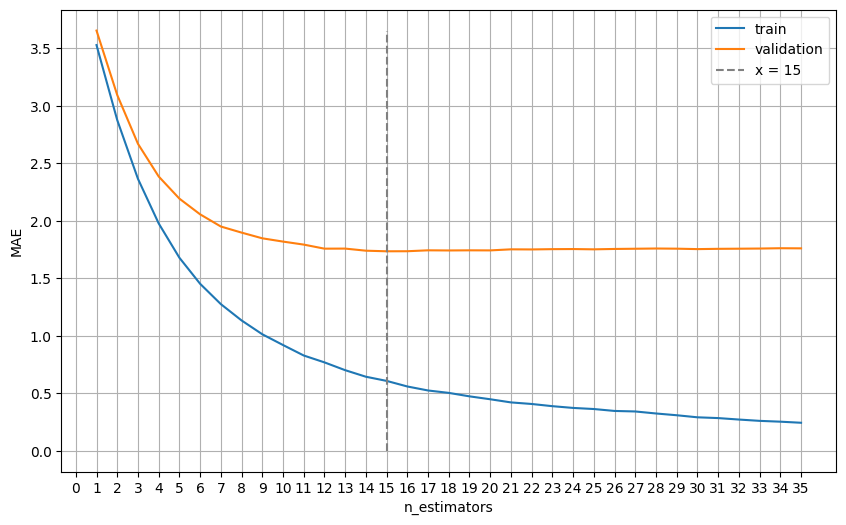

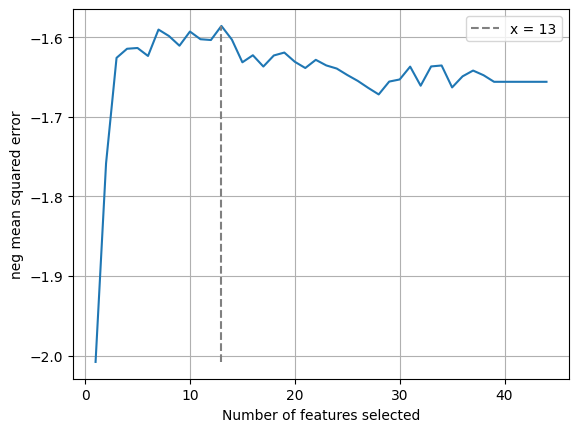

max_depth:  8
Number of estimators:  15
Selected_features:  Index(['y', 'lst_mar_day_mean', 'lst_feb_night_mean', 'lst_mar_night_mean',
       'lst_apr_night_mean', 'DISTANCE_TO_COAST', 'SLOPE_mean_1km',
       'ASPECT_mean_200m', 'HILLSHADE_mean_1km', 'null_island_distance',
       'days_distance', 'year', 'lst'],
      dtype='object')
prediction
0.0    13
1.0    45
2.0    52
3.0     7
4.0     1
7.0     3
Name: count, dtype: int64

Low risk category stations: 58
Medium risk category stations: 60
High risk category stations: 3
#===========================================
Predictions without entomological features
#===========================================

prediction
0.0    10
1.0    41
2.0    61
3.0     4
4.0     1
7.0     3
Name: count, dtype: int64

Low risk category stations: 51
Medium risk category stations: 66
High risk category stations: 3
#===========================================
Predictions without entomological features
#===========================================

predi

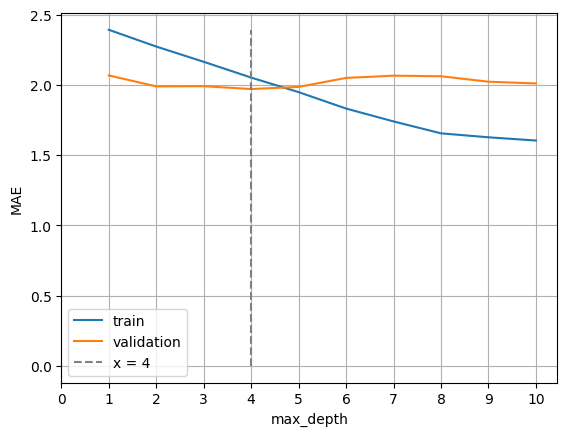

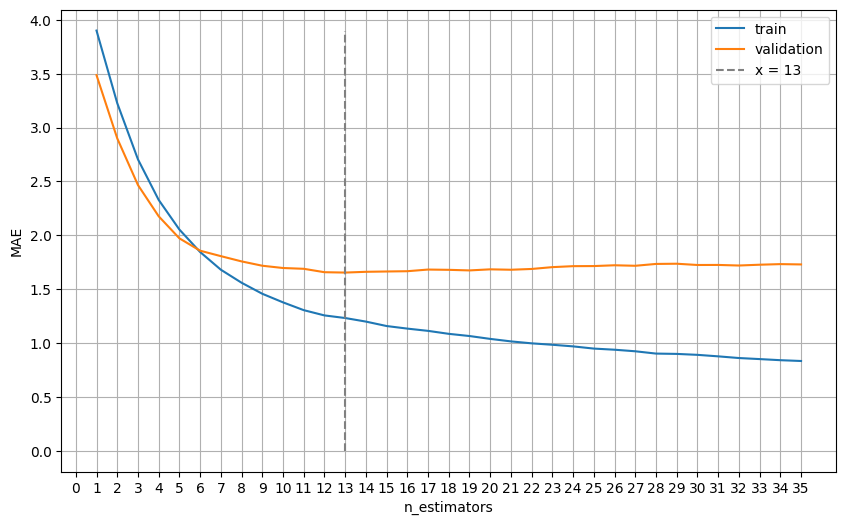

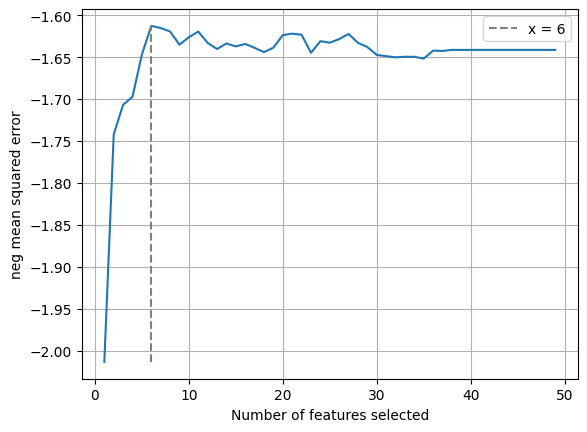

max_depth:  4
Number of estimators:  13
Selected_features:  Index(['null_island_distance', 'days_distance', 'year', 'mosq_sum_year',
       'mosq_sum_previous_2weeks', 'previous_mosq_measure'],
      dtype='object')
prediction
2.0     7
3.0    17
4.0     8
5.0    17
6.0    16
Name: count, dtype: int64

Low risk category stations: 0
Medium risk category stations: 49
High risk category stations: 16
#===========================================
Predictions without entomological features
#===========================================

prediction
2.0     9
3.0    15
4.0    60
5.0    71
6.0     9
7.0     9
Name: count, dtype: int64

Low risk category stations: 0
Medium risk category stations: 155
High risk category stations: 18
#===========================================
Predictions with entomological features
#===========================================

prediction
1.0    2
2.0    3
3.0    9
4.0    5
5.0    2
6.0    4
8.0    2
Name: count, dtype: int64

Low risk category stations: 2
Medium ri

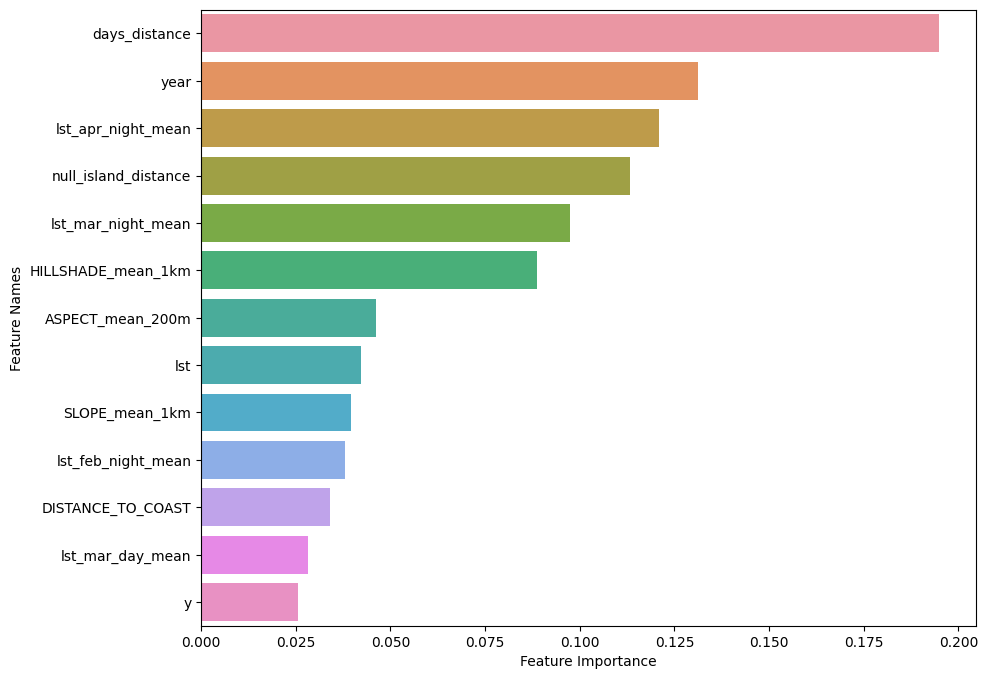

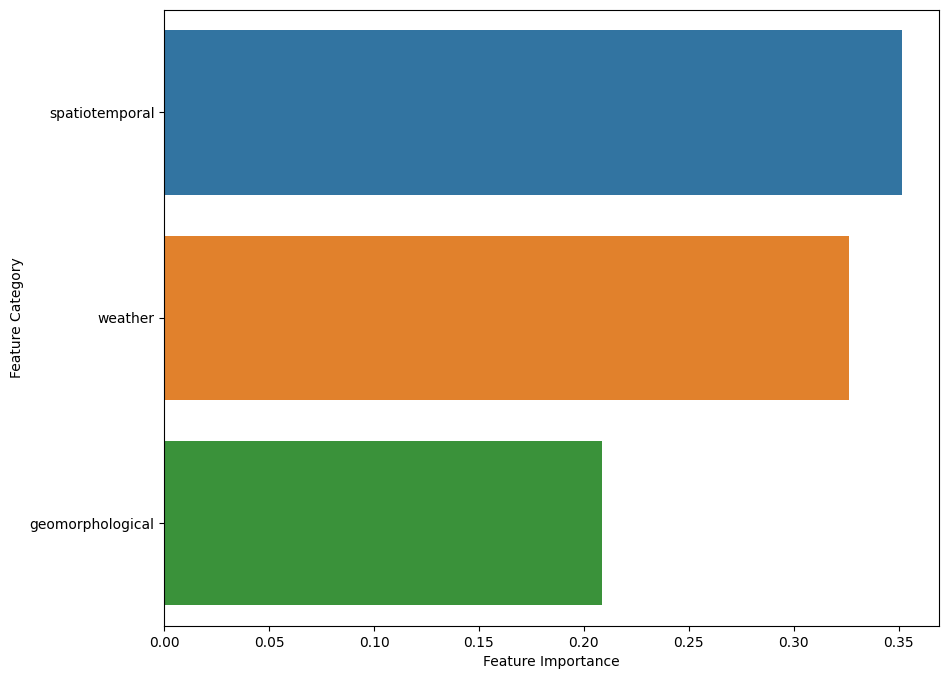

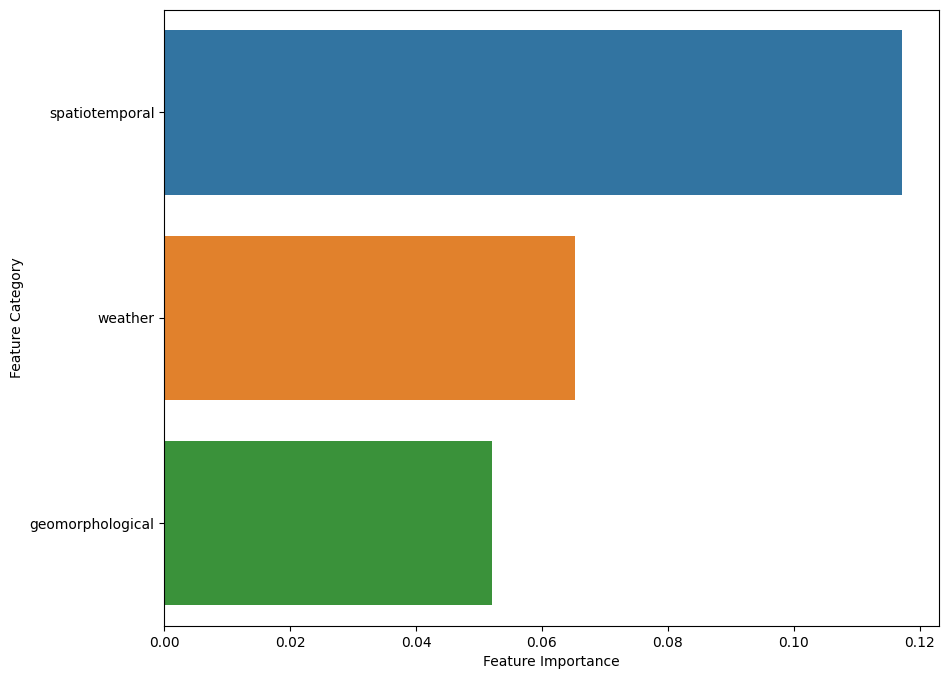

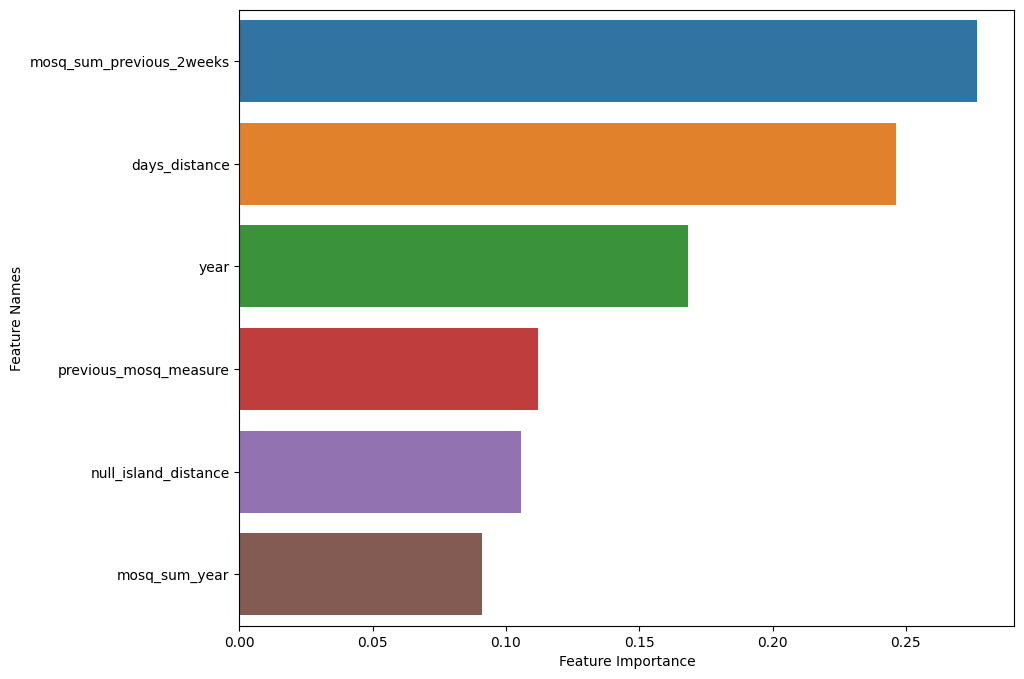

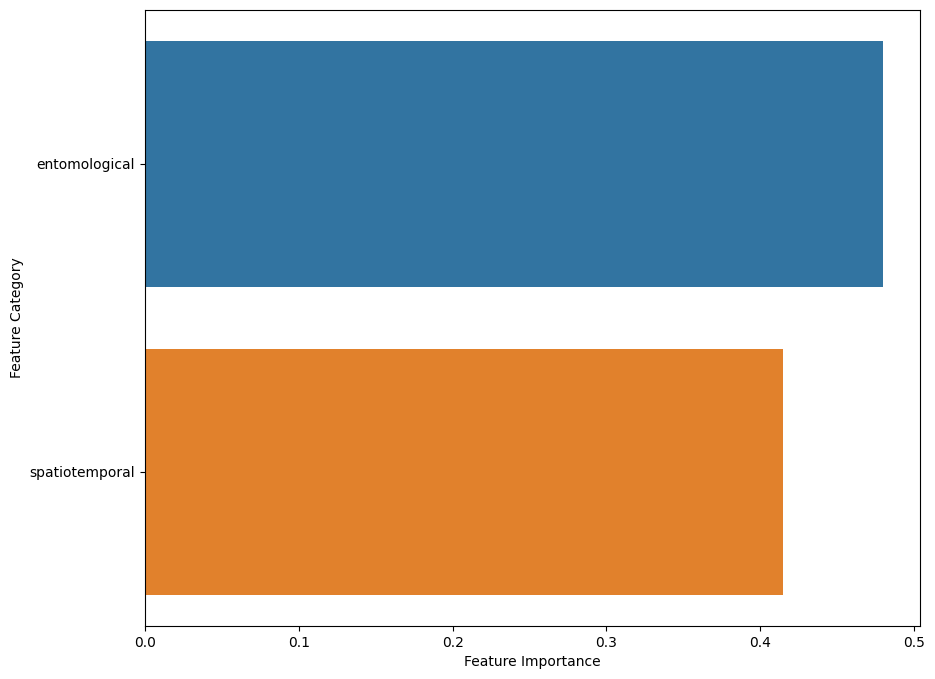

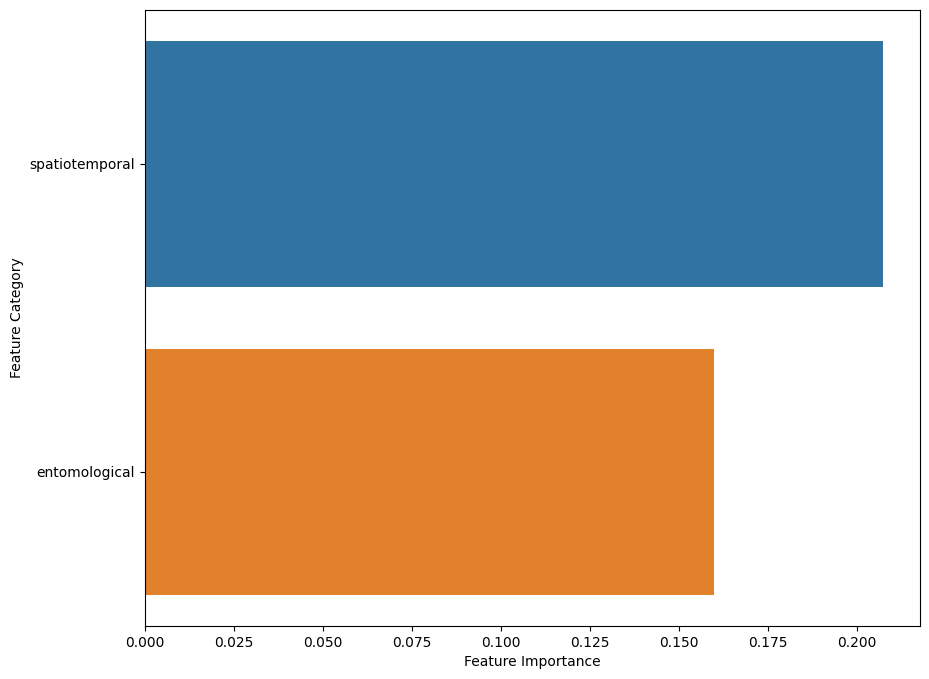

In [ ]:
#=====================================================================
# Automation models without or with/without entomological data
#=====================================================================
learning_rate = 0.2
# set the early stop argument as early_stop = (tolerance, min_delta)
early_stop = None
#set the transformation actions on the data. Options are 'augmentation', 'normalization', 'log', 'scaling'
transformation_list = []
#set the data for embeddings e.g. data[['col', 'col2']]
embedded_data = None
#set the boolean for plotting feature importance
fi = False

exp=False

model_ent = Xgboost_model(model_type = model_type, learning_rate = learning_rate,
                          embedding_data = embedded_data,  transformation_list = transformation_list,
                          early_stop = False, l1_weight = 0, l2_weight = 0, weights = False)

model_env = Xgboost_model(model_type = model_type, learning_rate = learning_rate,
                          embedding_data = embedded_data,  transformation_list = transformation_list,
                          early_stop = False, l1_weight = 0, l2_weight = 0, weights = False)

predictions = pd.DataFrame()
ent_predictions_env_model = pd.DataFrame()

date = '2021-01-01'
months = data.loc[data['dt_placement']>=pd.to_datetime(date),'dt_placement'].dt.to_period('M').unique()
months = months.strftime('%Y-%m')
months.sort()

for i in months:
    date1 = i +'-01'
    if i.split('-')[1]=='12':
        date2 = str(int(i.split('-')[0])+1) +'-01-01'
    else:
        date2 = i.split('-')[0] + '-' + str(int(i.split('-')[1]) + 1) + '-01'
        
    train = data.loc[data[date_col] < pd.to_datetime(date1)]
    train = train.reset_index(drop=True)
    
    test = data.loc[data[date_col] >= pd.to_datetime(date1)]
    test = test.loc[test[date_col] < pd.to_datetime(date2)]
    test = test.reset_index(drop=True)

    # set the only_env as True if there are no mosquitoes for the forecast month
    only_env=None    
    if len(test.dropna(subset=['mosq_sum_month', 'mosq_sum_month_previous_year', 'mosq_sum_year',
                               'mosq_sum_previous_2weeks','previous_mosq_measure']).drop(columns=['mosq_now']).dropna())>0:
        only_env=False
    elif len(test.drop(columns=['mosq_sum_month', 'mosq_sum_month_previous_year', 'mosq_sum_year',
                               'mosq_sum_previous_2weeks', 'previous_mosq_measure', 'mosq_now']).dropna())>0:
        only_env=True
    else:
        print('No data left for prediction')

    if only_env != None:
        # Run first without entomological features
        print("#===========================================")
        print("Predictions without entomological features")
        print("#===========================================")
        print()
        data_env = train.drop(['mosq_sum_month', 'mosq_sum_month_previous_year', 'mosq_sum_year',
                              'mosq_sum_previous_2weeks', 'previous_mosq_measure'], axis = 1)
        test_env = test.drop(['mosq_sum_month', 'mosq_sum_month_previous_year', 'mosq_sum_year',
                              'mosq_sum_previous_2weeks', 'previous_mosq_measure'], axis = 1)

        data_env = data_env.dropna().reset_index(drop=True)
        test_env = test_env.dropna(subset=test_env.columns.difference(['mosq_now'])).reset_index(drop=True)
        
        if len(test_env)!=0:
            predictions_env = give_predictions_xgboost(model_env, data_env, test_env, env = True,
                                                       filepath = path, case = '', fi = fi, export = False)
            predictions = pd.concat([predictions,predictions_env],axis=0)


        # Run with entomological features if at least one station has mosquitos number
        if not only_env:
            print("#===========================================")
            print("Predictions with entomological features")
            print("#===========================================")
            print()

            data_entom = train.dropna().reset_index(drop=True)
            test_entom = test.dropna(subset=test.columns.difference(['mosq_now'])).reset_index(drop=True)
            
            if len(test_entom)!=0:
            
                predictions2 = give_predictions_xgboost(model_env, data_entom, test_entom, env = True,
                                                        filepath = path, case = '', fi = fi, export = False)
                
                predictions_entom = give_predictions_xgboost(model_ent, data_entom, test_entom, env = False,
                                                             filepath = path, fi = fi, case = '', export = False)
                
                predictions = pd.concat([predictions,predictions_entom],axis=0)
                
                ent_predictions_env_model = pd.concat([ent_predictions_env_model,predictions2],axis=0)
                ent_predictions_env_model = pd.concat([ent_predictions_env_model,predictions_entom],axis=0)
                
model_env.plot_feature_importance()
model_ent.plot_feature_importance()

predictions = predictions.sort_values(['entomological_features'], ascending=False).reset_index(drop=True)
predictions = predictions.drop_duplicates(subset=['dt_placement', 'x', 'y'], keep='first').reset_index(drop=True)
predictions = predictions.drop_duplicates(subset=['week', 'x', 'y'], keep='first').reset_index(drop=True)

ent_predictions_env_model = ent_predictions_env_model.reset_index(drop=True)

predictions = validate_results2(predictions, data)
ent_predictions_env_model = validate_results2(ent_predictions_env_model, data)

if exp:
    csv_name =  path +'overall_predictions.csv'
    predictions.to_csv(csv_name,index=False)
    csv_name =  path +'overall_predictions_ent_with_env_model.csv'
    ent_predictions_env_model.to_csv(csv_name,index=False)

In [ ]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import statsmodels.api as sm
import pandas as pd
import numpy as np
import math
import seaborn as sns
import shap

In [ ]:
def shap_explanations(predictions, model):
    
    shap_data = predictions[model.features].dropna()
    explainer = shap.TreeExplainer(model.model)
    shap_values = explainer(shap_data)
    
    plt.figure()
    shap.summary_plot(shap_values.values, features=shap_data, 
                      feature_names=model.features, show=False, plot_type="violin")
    plt.show()
    
    plt.figure()
    shap.summary_plot(shap_values.values, features=shap_data,
                      feature_names=model.features, show=False, plot_type='bar')
    plt.show()

    months = {4:'April',
              5:'May',
              6:'June',
              7:'July',
              8:'August',
              9:'September',
              10:'October'}
    
    fi_df = pd.DataFrame(np.abs(shap_values.values), columns=model.features).mean(axis=0).sort_values().reset_index()
    fi_df.columns = ['feature_names','feature_importance']

    indicies = ['ndvi', 'ndmi', 'ndwi', 'ndbi',
                'ndvi_mean', 'ndmi_mean', 'ndwi_mean', 'ndbi_mean',
                'ndvi_std','ndmi_std', 'ndwi_std', 'ndbi_std',]

    weather = ['lst', 'lst_day', 'lst_night',
               'lst_jan_day_mean', 'lst_jan_night_mean',
               'lst_feb_day_mean', 'lst_feb_night_mean',
               'lst_mar_day_mean', 'lst_mar_night_mean',
               'lst_apr_day_mean', 'lst_apr_night_mean',
               'acc_rainfall_1week', 'acc_rainfall_2week', 'acc_rainfall_jan',]

    geomorphological = ['DISTANCE_TO_COAST', 'DISTANCE_TO_RIVER', 'SLOPE_mean_1km', 'ASPECT_mean_200m',
                        'ELEVATION_mean_1km', 'HILLSHADE_mean_1km', 'FS_AREA_1km', 'FLOW_ACCU_200m', 'landcover']

    spatiotemporal = ['x', 'y', 'year''null_island_distance', 'vert_distance',
                      'days_distance', 'mo_sin', 'mo_cos', 'year',  'summer_days_month']

    entomological = ['mosq_sum_month', 'mosq_sum_month_previous_year', 'mosq_sum_year',
                     'mosq_sum_previous_2weeks', 'previous_mosq_measure',]

    df_indicies = fi_df.loc[fi_df['feature_names'].isin(indicies)]
    df_weather = fi_df.loc[fi_df['feature_names'].isin(weather)]
    df_geomorphological = fi_df.loc[fi_df['feature_names'].isin(geomorphological)]
    df_spatiotemporal = fi_df.loc[fi_df['feature_names'].isin(spatiotemporal)]
    df_entomological = fi_df.loc[fi_df['feature_names'].isin(entomological)]

    categories = {'Category': ['rs_indicies', 'weather', 'geomorphological', 'spatiotemporal', 'entomological'],

                  'Mean_fi': [df_indicies.feature_importance.mean(),
                              df_weather.feature_importance.mean(),
                              df_geomorphological.feature_importance.mean(),
                              df_spatiotemporal.feature_importance.mean(),
                              df_entomological.feature_importance.mean()]}

    categories_df = pd.DataFrame.from_dict(categories)

    categories_df = categories_df.loc[(categories_df!=0).all(axis=1)].reset_index(drop=True)
    categories_df = categories_df.dropna().reset_index(drop=True)

    categories_df.sort_values(by = 'Mean_fi', ascending=False)


    #Sort the DataFrame in order decreasing feature importance
    categories_df.sort_values(by=['Mean_fi'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))

    #Plot Searborn bar chart
    sns.barplot(x=categories_df['Mean_fi'], y=categories_df['Category'])

    #Add chart labels
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Category')
    plt.show()
    
    predictions_month = predictions.dropna(subset=model.features).reset_index(drop=True)

    predictions_index = predictions_month[predictions_month['prediction']<=4].index
    
    plt.figure()
    shap.summary_plot(shap_values.values[predictions_index,:], features=shap_data.iloc[predictions_index,:], 
                          feature_names=model.features,max_display=5,show=False, plot_type="violin")
    plt.title('Low risk observations')
    plt.show()
    
    plt.figure()
    shap.summary_plot(shap_values.values[predictions_index,:], features=shap_data.iloc[predictions_index,:], 
                      feature_names=model.features, max_display=5, show=False, plot_type='bar')
    plt.title('Low risk observations')
    plt.show()

    predictions_index = predictions_month[predictions_month['prediction']>=5].index
    
    plt.figure()
    shap.summary_plot(shap_values.values[predictions_index,:], features=shap_data.iloc[predictions_index,:], 
                      feature_names=model.features, max_display=5, show=False, plot_type="violin")
    plt.title('High risk observations')
    plt.show()
    
    plt.figure()
    shap.summary_plot(shap_values.values[predictions_index,:], features=shap_data.iloc[predictions_index,:],
                      feature_names=model.features, max_display=5, show=False, plot_type='bar')
    plt.title('High risk observations')
    plt.show()
    
    for i in model.features:
        idx = np.where(predictions[model.features].columns==i)[0][0]
        x = shap_data.iloc[:,idx]
        y_sv = shap_values.values[:,idx]
        lowess = sm.nonparametric.lowess(y_sv, x, frac=.6)

        _,ax = plt.subplots()
        ax.grid()
        ax.plot(*list(zip(*lowess)), color="red")
        shap.plots.scatter(shap_values[:, i], ax=ax)
        
    for i in [5,6,7,8,9]:
        plt.figure()
        predictions_index = predictions_month[predictions_month['dt_placement'].dt.month==i].index
        shap.summary_plot(shap_values.values[predictions_index,:], features=shap_data.iloc[predictions_index,:], 
                          feature_names=model.features, max_display=5,show=False, plot_type="violin")
        plt.title(months[i])
        plt.show()
        
        plt.figure()
        predictions_index = predictions_month[predictions_month['dt_placement'].dt.month==i].index
        shap.summary_plot(shap_values.values[predictions_index,:], features=shap_data.iloc[predictions_index,:],  
                          feature_names=model.features, max_display=5,show=False, plot_type='bar')
        plt.title(months[i])
        plt.show()

In [ ]:
shap_explanations(predictions, model_env)
print('=============================')
shap_explanations(predictions, model_ent)

In [3]:
def validation_plots(path):
    csv_name =  path + 'overall_predictions.csv'
    predictions = pd.read_csv(csv_name)
    predictions['dt_placement'] = pd.to_datetime(predictions['dt_placement'], format="%Y-%m-%d")
    predictions['dt_prediction'] = pd.to_datetime(predictions['dt_prediction'], format="%Y-%m-%d")
    
    classes = list(range(10))
    q = np.array([-1., 12., 35., 71., 134., 200., 256., 413., 638., 1144., 23248.])
    bins, bounds = pd.cut(predictions.loc[:, 'previous_mosq_measure'], bins=q, retbins=True, labels=classes)
    predictions['previous_mosq_measure'] = bins
    predictions['previous_mosq_measure'] = predictions['previous_mosq_measure'].cat.codes.astype(int)
    predictions['previous_mosq_measure'] = predictions['previous_mosq_measure'].replace(-1,np.NaN)
    
    predictions['error'] = predictions['prediction'] - predictions['actual']
    predictions['abs_error'] = np.abs(predictions['error'])
    predictions['error_prev_actual'] = predictions['actual'] - predictions['previous_mosq_measure']
    predictions['abs_error_prev_actual'] = np.abs(predictions['error_prev_actual'])
    predictions['error_prev_pred'] = predictions['prediction'] - predictions['previous_mosq_measure']
    predictions['abs_error_prev_pred'] = np.abs(predictions['error_prev_pred'])
    
    months = {4:'April',
             5:'May',
             6:'June',
             7:'July',
             8:'August',
             9:'September',
             10:'October'}
    years = predictions['dt_prediction'].dt.year.unique().tolist()
    years.sort()
    
    predictions_10_diff = predictions[np.abs(predictions['time_diff'])<10]
    predictions_10_diff_v2 = predictions_10_diff.dropna(subset=['previous_mosq_measure']).reset_index(drop=True)
    predictions_30_diff = predictions[np.abs(predictions['time_diff'])<30].reset_index(drop=True)
    predictions_mean = predictions_10_diff.groupby(predictions_10_diff.dt_prediction.dt.to_period('M')).agg('mean')
    predictions_mean.index = predictions_mean.index.to_timestamp()
    predictions_std = predictions_10_diff.groupby(predictions_10_diff.dt_prediction.dt.to_period('M')).agg('std')
    predictions_std.index = predictions_std.index.to_timestamp()
    
    bins = np.arange(len(predictions_10_diff['actual'].unique())) - 0.5
    plt.hist(predictions_10_diff['abs_error'], bins)
    plt.xticks(range(len(predictions_10_diff['actual'].unique())))
    plt.xlabel('Absolute Error')
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()
    
    bins = np.arange(len(predictions_10_diff['actual'].unique())) - 0.5
    _, _, bars = plt.hist(predictions_10_diff['abs_error'], bins, density=True)
    plt.xticks(range(len(predictions_10_diff['actual'].unique())))
    plt.xlabel('Absolute Error')
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()
    
    print('Error 0:', bars[0].get_height())
    print('Error 1:', bars[1].get_height())
    print('Error 0+1:', bars[0].get_height() + bars[1].get_height())
    
    plt.plot(predictions_mean.index, predictions_mean['prediction'],'-o', label='prediction')
    plt.plot(predictions_mean.index, predictions_mean['actual'],'-o', label='actual')
    plt.grid()
    plt.legend()
    plt.xticks(rotation=30)
    plt.xlabel('Year - Month')
    plt.ylabel('Mean Class')
    plt.show()
    
    labels = predictions_10_diff.loc[:,'actual'].unique().tolist()
    labels.sort()
    f = []
    length = []
    for k in labels:
        cc = predictions_10_diff.loc[predictions_10_diff['actual']==k]
        length.append(len(cc))
        actual = cc.loc[:,'actual']
        predictions = cc.loc[:,'prediction']
        mae_class = np.abs(actual - predictions).mean()
        f.append(mae_class)
    labels = [str(int(e)) for e in labels]
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(labels,f)
    for i, v in enumerate(f):
        ax.text(i, v, str('%.2f'%(v)), rotation=30)
        ax.text(i, v/2,'n = '+ str(length[i]), weight="bold", ha='center', rotation=90)
    plt.xlabel('Class')
    plt.ylabel('MAE')
    plt.grid(axis='y')
    plt.show()
    
    def obj(x, a):
        return a * x
    
    freq_df = predictions_10_diff.groupby(by=['actual', 'prediction']).size().reset_index(name='frequency')
    f, ax = plt.subplots()
    points = ax.scatter(freq_df['actual'], freq_df['prediction'], c=freq_df['frequency'], cmap='Greens')
    f.colorbar(points, label='Frequency')
    popt, pcov = curve_fit(obj, predictions_10_diff['actual'], predictions_10_diff['prediction'])
    m = popt[0]
    b=0    
    plt.plot(predictions_10_diff['actual'], m*predictions_10_diff['actual'] + b,'r',label='y={:.2f}x'.format(m))
#     plt.plot([min(predictions_10_diff['actual'].min(),predictions_10_diff['prediction'].min()), max(predictions_10_diff['actual'].max(), predictions_10_diff['prediction'].max())], [min(predictions_10_diff['actual'].min(), predictions_10_diff['prediction'].min()), max(predictions_10_diff['actual'].max(), predictions_10_diff['prediction'].max())], '--', color='grey', label='y=x')
    plt.plot([0.0, 9.0], [0.0, 9.0],'--', color='grey', label='y=x')
    plt.grid()
    plt.legend()
    plt.xlabel('Actual Class')
    plt.ylabel('Predicted Class')
    plt.show()
    
    f, ax = plt.subplots(nrows=1, ncols=5,  figsize=(50, 10))
    k=1
    for i in [5,6,7,8,9]:
        plt.subplot(1, 5, k)
        month_df = predictions_10_diff[predictions_10_diff.dt_placement.dt.month==i].reset_index(drop=True)
        if len(month_df) != 0:
            freq_df = month_df.groupby(by=['prediction', 'actual']).size().reset_index(name='frequency')
            points = ax[k-1].scatter(freq_df['actual'], freq_df['prediction'],  c=freq_df['frequency'], cmap='Greens')
            f.colorbar(points, label='Frequency')
            popt, pcov = curve_fit(obj, month_df['actual'], month_df['prediction'])
            m = popt[0]
            b=0
            plt.plot([0.0, 9.0], m*pd.Series([0.0, 9.0]) + b, 'r', label='y={:.2f}x'.format(m))
#             plt.plot(month_df['actual'], m*month_df['actual'] + b, 'r', label='y={:.2f}x'.format(m))
#         plt.plot([min(month_df['actual'].min(),month_df['prediction'].min()), max(month_df['actual'].max(),month_df['prediction'].max())], [min(month_df['actual'].min(),month_df['prediction'].min()), max(month_df['actual'].max(),month_df['prediction'].max())], '--', color='grey', label='y=x')
        plt.plot([0.0, 9.0], [0.0, 9.0],'--', color='grey', label='y=x')
        plt.grid()
        plt.legend()
        plt.xlabel('Actual Class')
        plt.ylabel('Predicted Class')
        plt.title(months[i])
        k = k+1
    plt.tight_layout()
    plt.show()

    for i in years:
        predictions_year = predictions_mean[predictions_mean.index.year==i]    
        plt.plot(predictions_year.index.month, predictions_year['abs_error'],'-o',label=str(i))
    plt.grid()
    plt.legend()
    plt.xticks(list(months.keys()), rotation=30, labels = list(months.values()))
    plt.xlabel('Month')
    plt.ylabel('Mean Absolute Error')
    plt.show()
    
    for i in years:
        predictions_year = predictions_mean[predictions_mean.index.year==i]    
        plt.plot(predictions_year.index.month, predictions_year['error'],'-o',label=str(i))
    plt.grid()
    plt.legend()
    plt.xticks(list(months.keys()), rotation=30, labels = list(months.values()))
    plt.xlabel('Month')
    plt.ylabel('Mean Error')
    plt.show()
    
    for i in years:
        predictions_year = predictions_mean[predictions_mean.index.year==i]    
        plt.plot(predictions_year.index.month, predictions_year['prediction'],'-o',label=str(i))
    plt.grid()
    plt.legend()
    plt.xticks(list(months.keys()), rotation=30, labels = list(months.values()))
    plt.xlabel('Month')
    plt.ylabel('Mean Predicted Class')
    plt.show()
    
    for i in years:
        predictions_year = predictions_mean[predictions_mean.index.year==i]    
        plt.plot(predictions_year.index.month, predictions_year['actual'],'-o',label=str(i))
    plt.grid()
    plt.legend()
    plt.xticks(list(months.keys()), rotation=30, labels = list(months.values()))
    plt.xlabel('Month')
    plt.ylabel('Mean Actual Class')
    plt.show()
    
    for i in years:
        predictions_year_mean = predictions_mean[predictions_mean.index.year==i]
        predictions_year_std = predictions_std[predictions_std.index.year==i]
        plt.plot(predictions_year_std.index.month, predictions_year_std['abs_error']/predictions_year_mean['abs_error'],'-o',label=str(i))
    plt.grid()
    plt.legend()
    plt.xticks(list(months.keys()), rotation=30, labels = list(months.values()))
    plt.xlabel('Month')
    plt.ylabel('Coefficient of Error Std')
    plt.show()
    
    predictions_30_diff['time_diff'] = np.abs(predictions_30_diff['time_diff'])
    freq_df = predictions_30_diff.groupby(by=['time_diff', 'abs_error']).size().reset_index(name='frequency')
    f, ax = plt.subplots()
    points = ax.scatter(freq_df['time_diff'], freq_df['abs_error'], c=freq_df['frequency'], cmap='Greens')
    f.colorbar(points, label='Frequency')
    m, b = np.polyfit(np.abs(predictions_30_diff['time_diff']),predictions_30_diff['abs_error'], 1)
    plt.plot(np.abs(predictions_30_diff['time_diff']), m*np.abs(predictions_30_diff['time_diff']) + b,'r',label='y={:.2f}x+{:.2f}'.format(m,b))
    plt.ylabel('Absolute error')
    plt.xlabel('Time Difference (Days)')
    plt.legend()
    plt.grid()
    plt.show()
    
    for i in years:
        predictions_year = predictions_mean[predictions_mean.index.year==i]    
        plt.plot(predictions_year.index.month, predictions_year['abs_error_prev_actual'],'-o',label=str(i))
    plt.grid()
    plt.legend()
    plt.xticks(list(months.keys()), rotation=30, labels = list(months.values()))
    plt.xlabel('Month')
    plt.ylabel('consecutive measurements \n mean difference')
    plt.show()
    
    for i in years:
        predictions_year = predictions_mean[predictions_mean.index.year==i]    
        plt.plot(predictions_year.index.month, predictions_year['abs_error_prev_pred'],'-o',label=str(i))
    plt.grid()
    plt.legend()
    plt.xticks(list(months.keys()), rotation=30, labels = list(months.values()))
    plt.xlabel('Month')
    plt.ylabel('Prediction - previous measurment \n mean difference')
    plt.show()
    
    freq_df = predictions_10_diff_v2.groupby(by=['actual', 'previous_mosq_measure']).size().reset_index(name='frequency')
    f, ax = plt.subplots()
    points = ax.scatter(freq_df['previous_mosq_measure'], freq_df['actual'],  c=freq_df['frequency'], cmap='Greens')
    f.colorbar(points, label='Frequency')
    popt, pcov = curve_fit(obj, predictions_10_diff_v2['previous_mosq_measure'], predictions_10_diff_v2['actual'])
    m = popt[0]
    b=0
    plt.plot(predictions_10_diff_v2['previous_mosq_measure'], m*predictions_10_diff_v2['previous_mosq_measure'] + b, 'r', label='y={:.2f}x'.format(m))
    #plt.plot([min(predictions_10_diff_v2['previous_mosq_measure'].min(),predictions_10_diff_v2['actual'].min()), max(predictions_10_diff_v2['previous_mosq_measure'].max(), predictions_10_diff_v2['actual'].max())], [min(predictions_10_diff_v2['previous_mosq_measure'].min(), predictions_10_diff_v2['actual'].min()), max(predictions_10_diff_v2['previous_mosq_measure'].max(), predictions_10_diff_v2['actual'].max())], '--', color='grey', label='y=x')
    plt.plot([0.0, 9.0], [0.0, 9.0],'--', color='grey', label='y=x')
    plt.grid()
    plt.legend()
    plt.xlabel('Previous Class')
    plt.ylabel('Current Class')
    plt.show()
    
    f, ax = plt.subplots(nrows=1, ncols=5,  figsize=(50, 10))
    k=1
    for i in [5,6,7,8,9]:
        plt.subplot(1, 5, k)
        month_df = predictions_10_diff_v2[predictions_10_diff_v2.dt_prediction.dt.month==i].reset_index(drop=True)
        if len(month_df) != 0:
            print(months[i]+':', len(month_df[month_df['actual']>= month_df['previous_mosq_measure']])/len(month_df))
            freq_df = month_df.groupby(by=['actual', 'previous_mosq_measure']).size().reset_index(name='frequency')
            points = ax[k-1].scatter(freq_df['previous_mosq_measure'], freq_df['actual'],  c=freq_df['frequency'], cmap='Greens')
            f.colorbar(points, label='Frequency')
            popt, pcov = curve_fit(obj, month_df['previous_mosq_measure'], month_df['actual'])
            m = popt[0]
            b=0
            plt.plot([0.0, 9.0], m*pd.Series([0.0, 9.0]) + b, 'r', label='y={:.2f}x'.format(m))
#             plt.plot(month_df['previous_mosq_measure'], m*month_df['previous_mosq_measure'] + b, 'r', label='y={:.2f}x'.format(m))
#         plt.plot([min(predictions_10_diff_v2['previous_mosq_measure'].min(),predictions_10_diff_v2['actual'].min()), max(predictions_10_diff_v2['previous_mosq_measure'].max(), predictions_10_diff_v2['actual'].max())], [min(predictions_10_diff_v2['previous_mosq_measure'].min(), predictions_10_diff_v2['actual'].min()), max(predictions_10_diff_v2['previous_mosq_measure'].max(), predictions_10_diff_v2['actual'].max())], '--', color='grey', label='y=x')
        plt.plot([0.0, 9.0], [0.0, 9.0],'--', color='grey', label='y=x')
        plt.grid()
        plt.legend()
        plt.xlabel('Previous Class')
        plt.ylabel('Current Class')
        plt.title(months[i])
        k = k+1
    plt.tight_layout()
    plt.show()
    
    freq_df = predictions_10_diff_v2.groupby(by=['prediction', 'previous_mosq_measure']).size().reset_index(name='frequency')
    f, ax = plt.subplots()
    points = ax.scatter(freq_df['previous_mosq_measure'], freq_df['prediction'], c=freq_df['frequency'], cmap='Greens')
    f.colorbar(points, label='Frequency')
    popt, pcov = curve_fit(obj, predictions_10_diff_v2['previous_mosq_measure'], predictions_10_diff_v2['prediction'])
    m = popt[0]
    b=0
    plt.plot(predictions_10_diff_v2['previous_mosq_measure'], m*predictions_10_diff_v2['previous_mosq_measure'] + b, 'r', label='y={:.2f}x'.format(m))
#     plt.plot([min(predictions_10_diff_v2['previous_mosq_measure'].min(),predictions_10_diff_v2['prediction'].min()), max(predictions_10_diff_v2['previous_mosq_measure'].max(), predictions_10_diff_v2['prediction'].max())], [min(predictions_10_diff_v2['previous_mosq_measure'].min(), predictions_10_diff_v2['prediction'].min()), max(predictions_10_diff_v2['previous_mosq_measure'].max(), predictions_10_diff_v2['prediction'].max())], '--', color='grey', label='y=x')
    plt.plot([0.0, 9.0], [0.0, 9.0],'--', color='grey', label='y=x')
    plt.grid()
    plt.legend()
    plt.xlabel('Previous Class')
    plt.ylabel('Predicted Class')
    plt.show()
    
    f, ax = plt.subplots(nrows=1, ncols=5,  figsize=(50, 10))
    k=1
    for i in [5,6,7,8,9]:
        plt.subplot(1, 5, k)
        month_df = predictions_10_diff_v2[predictions_10_diff_v2.dt_prediction.dt.month==i].reset_index(drop=True) 
        if len(month_df) != 0:
            freq_df =month_df.groupby(by=['prediction', 'previous_mosq_measure']).size().reset_index(name='frequency')
            points = ax[k-1].scatter(freq_df['previous_mosq_measure'], freq_df['prediction'],  c=freq_df['frequency'], cmap='Greens')
            f.colorbar(points, label='Frequency')
            popt, pcov = curve_fit(obj, month_df['previous_mosq_measure'], month_df['prediction'])
            m = popt[0]
            b=0
            plt.plot([0.0, 9.0], m*pd.Series([0.0, 9.0]) + b, 'r', label='y={:.2f}x'.format(m))
#             plt.plot(month_df['previous_mosq_measure'], m*month_df['previous_mosq_measure'] + b, 'r', label='y={:.2f}x'.format(m))
#         plt.plot([min(month_df['previous_mosq_measure'].min(),month_df['prediction'].min()), max(month_df['previous_mosq_measure'].max(),month_df['prediction'].max())], [min(month_df['previous_mosq_measure'].min(),month_df['prediction'].min()), max(month_df['previous_mosq_measure'].max(),month_df['prediction'].max())], '--', color='grey', label='y=x')
        plt.plot([0.0, 9.0], [0.0, 9.0],'--', color='grey', label='y=x')
        plt.grid()
        plt.legend()
        plt.xlabel('Previous Class')
        plt.ylabel('Predicted Class')
        plt.title(months[i])
        k = k+1
    plt.tight_layout()
    plt.show()
    
#     f, ax = plt.subplots(nrows=1, ncols=5,  figsize=(50, 10))
#     k=1
#     for i in [5,6,7,8,9]:
#         plt.subplot(1, 5, k)
#         month_df = predictions_10_diff_v2[predictions_10_diff_v2.dt_prediction.dt.month==i].reset_index(drop=True) 
#         if len(month_df) != 0:
#             month_df['diff'] =  month_df['actual'] - month_df['previous_mosq_measure']
#             freq_df =month_df.groupby(by=['diff', 'previous_mosq_measure']).size().reset_index(name='frequency')
#             points = ax[k-1].scatter(freq_df['previous_mosq_measure'], freq_df['diff'],  c=freq_df['frequency'], cmap='Greens')
#             f.colorbar(points, label='Frequency')
#             popt, pcov = curve_fit(obj, month_df['previous_mosq_measure'], month_df['diff'])
#             m = popt[0]
#             b=0
#             plt.plot(month_df['previous_mosq_measure'], m*month_df['previous_mosq_measure'] + b, 'r', label='y={:.2f}x'.format(m))
#         plt.grid()
#         plt.legend()
#         plt.xlabel('Previous Class')
#         plt.ylabel('Diff Class')
#         plt.title(months[i])
#         k = k+1
#     plt.tight_layout()
#     plt.show()    

In [4]:
def validation_plots_comparison(path):
    csv_name =  path + 'overall_predictions_ent_with_env_model.csv'
    predictions = pd.read_csv(csv_name)
    predictions['dt_placement'] = pd.to_datetime(predictions['dt_placement'], format="%Y-%m-%d")
    predictions['dt_prediction'] = pd.to_datetime(predictions['dt_prediction'], format="%Y-%m-%d")
    
    classes = list(range(10))
    q = np.array([-1., 12., 35., 71., 134., 200., 256., 413., 638., 1144., 23248.])
    bins, bounds = pd.cut(predictions.loc[:, 'previous_mosq_measure'], bins=q, retbins=True, labels=classes)
    predictions['previous_mosq_measure'] = bins
    predictions['previous_mosq_measure'] = predictions['previous_mosq_measure'].cat.codes.astype(int)
    predictions['previous_mosq_measure'] = predictions['previous_mosq_measure'].replace(-1,np.NaN)
    
    predictions['error'] = predictions['prediction'] - predictions['actual']
    predictions['abs_error'] = np.abs(predictions['error'])
    predictions['error_prev_actual'] = predictions['actual'] - predictions['previous_mosq_measure']
    predictions['abs_error_prev_actual'] = np.abs(predictions['error_prev_actual'])
    predictions['error_prev_pred'] = predictions['prediction'] - predictions['previous_mosq_measure']
    predictions['abs_error_prev_pred'] = np.abs(predictions['error_prev_pred'])
    
    months = {4:'April',
             5:'May',
             6:'June',
             7:'July',
             8:'August',
             9:'September',
             10:'October'}
    years = predictions['dt_prediction'].dt.year.unique().tolist()
    years.sort()
    
    predictions_10_diff = predictions[np.abs(predictions['time_diff'])<10]
    predictions_10_diff_ent = predictions_10_diff[predictions_10_diff['entomological_features']==True]
    predictions_10_diff_env = predictions_10_diff[predictions_10_diff['entomological_features']==False]
    predictions_30_diff = predictions[np.abs(predictions['time_diff'])<30].reset_index(drop=True)
    predictions_mean_env = predictions_10_diff_env.groupby(predictions_10_diff_env.dt_prediction.dt.to_period('M')).agg('mean')
    predictions_mean_env.index = predictions_mean_env.index.to_timestamp()
    predictions_std_env = predictions_10_diff_env.groupby(predictions_10_diff_env.dt_prediction.dt.to_period('M')).agg('std')
    predictions_std_env.index = predictions_std_env.index.to_timestamp()
    predictions_mean_ent = predictions_10_diff_ent.groupby(predictions_10_diff_ent.dt_prediction.dt.to_period('M')).agg('mean')
    predictions_mean_ent.index = predictions_mean_ent.index.to_timestamp()
    predictions_std_ent = predictions_10_diff_ent.groupby(predictions_10_diff_ent.dt_prediction.dt.to_period('M')).agg('std')
    predictions_std_ent.index = predictions_std_ent.index.to_timestamp()
    
    plt.subplot(1, 2, 1)
    bins = np.arange(len(predictions_10_diff_ent['actual'].unique())) - 0.5
    plt.hist(predictions_10_diff_ent['abs_error'], bins)
    plt.xticks(range(len(predictions_10_diff_ent['actual'].unique())))
    plt.xlabel('Absolute Error')
    plt.ylabel('Frequency')
    plt.title('With entomological info')
    plt.grid()
    plt.subplot(1, 2, 2)
    bins = np.arange(len(predictions_10_diff_env['actual'].unique())) - 0.5
    plt.hist(predictions_10_diff_env['abs_error'], bins)
    plt.xticks(range(len(predictions_10_diff_env['actual'].unique())))
    plt.xlabel('Absolute Error')
    plt.ylabel('Frequency')
    plt.title('Without entomological info')
    plt.grid()
    plt.tight_layout()
    plt.show()
    
    plt.plot(predictions_mean_env.index, predictions_mean_env['prediction'],'-o', label='entomological prediction')
    plt.plot(predictions_mean_ent.index, predictions_mean_ent['prediction'],'-o', label='environmental prediction')
    plt.plot(predictions_mean_ent.index, predictions_mean_ent['actual'],'-o', label='actual')
    plt.grid()
    plt.legend()
    plt.xticks(rotation=30)
    plt.xlabel('Year - Month')
    plt.ylabel('Mean Class')
    plt.show()
    
    
    labels = predictions_10_diff.loc[:,'actual'].unique().tolist()
    labels.sort()
    f_env = []
    length_env = []
    f_ent = []
    length_ent = []
    for k in labels:
        cc = predictions_10_diff_env.loc[predictions_10_diff_env['actual']==k]
        length_env.append(len(cc))
        actual = cc.loc[:,'actual']
        predictions = cc.loc[:,'prediction']
        mae_class = np.abs(actual - predictions).mean()
        f_env.append(mae_class)
        cc = predictions_10_diff_ent.loc[predictions_10_diff_ent['actual']==k]
        length_ent.append(len(cc))
        actual = cc.loc[:,'actual']
        predictions = cc.loc[:,'prediction']
        mae_class = np.abs(actual - predictions).mean()
        f_ent.append(mae_class)
    total = []
    size = []
    for j in range(10):
        total.append([f_ent[j], f_env[j]])
        size.append([length_ent[j], length_ent[j]])
    df = pd.DataFrame(total, index=list(range(10)), columns = ["entomological","environmental"])
    size_df = pd.DataFrame(size, index=list(range(10)), columns = ["entomological","environmental"])
    ax = df.plot(kind='bar',figsize=(10,8),width=0.8, ylabel="MAE",title='MAE per class', xlabel='Class')
    i = 0
    for p in ax.patches:
        row = i%(len(df))
        column = i//(len(df))
        if not math.isnan(df.iloc[row,column]):
            ax.annotate('%.2f'%(p.get_height()), (p.get_x() +0.1, p.get_height() * 1.005),rotation=30)
            ax.annotate(int(size_df.iloc[row,column]), (p.get_x()+0.1, p.get_height()/2),rotation=90)
        i += 1
    ax.legend(loc="lower right")
    fig = ax.get_figure()
    plt.grid(axis='y')
    plt.show()
    
    f, [ax1, ax2] = plt.subplots(nrows=1, ncols=2)
    plt.subplot(1, 2, 1)

    m, b = np.polyfit(predictions_10_diff_env['actual'], predictions_10_diff_env['prediction'], 1)
    plt.plot(predictions_10_diff_env['actual'], m*predictions_10_diff_env['actual'] + b,'r',label='y={:.2f}x+{:.2f}'.format(m,b))
    freq_df = predictions_10_diff_env.groupby(by=['actual', 'prediction']).size().reset_index(name='frequency')
    points = ax1.scatter(freq_df['actual'], freq_df['prediction'], c=freq_df['frequency'], cmap='Greens')
    f.colorbar(points, label='Frequency')
    plt.grid()
    plt.title('Without entomological info')
    plt.legend()
    plt.xlabel('Actual Class')
    plt.ylabel('Predicted Class')
    plt.subplot(1, 2, 2)
    m, b = np.polyfit(predictions_10_diff_ent['actual'], predictions_10_diff_ent['prediction'], 1)
    plt.plot(predictions_10_diff_ent['actual'], m*predictions_10_diff_ent['actual'] + b,'r',label='y={:.2f}x+{:.2f}'.format(m,b))
    freq_df = freq_df.groupby(by=['actual', 'prediction']).size().reset_index(name='frequency')
    points = ax2.scatter(freq_df['actual'], freq_df['prediction'], c=freq_df['frequency'], cmap='Greens')
    f.colorbar(points, label='Frequency')
    plt.grid()
    plt.legend()
    plt.title('With entomological info')
    plt.xlabel('Actual Class')
    plt.ylabel('Predicted Class')
    plt.tight_layout()
    plt.show()

    colours = ['b','r','g']
    c =0
    for i in years:
        predictions_year = predictions_mean_env[predictions_mean_env.index.year==i]    
        plt.plot(predictions_year.index.month, predictions_year['abs_error'],'-o',color=colours[c],label=str(i)+'_env')
        predictions_year = predictions_mean_ent[predictions_mean_ent.index.year==i]    
        plt.plot(predictions_year.index.month, predictions_year['abs_error'],'--o',color=colours[c],label=str(i)+'_ent')
        c = c+1
    plt.grid()
    plt.legend()
    plt.xticks(list(months.keys()), rotation=30, labels = list(months.values()))
    plt.xlabel('Month')
    plt.ylabel('Mean Absolute Error')
    plt.show()
    
    c =0
    for i in years:
        predictions_year = predictions_mean_env[predictions_mean_env.index.year==i]    
        plt.plot(predictions_year.index.month, predictions_year['error'],'-o',color=colours[c],label=str(i)+'_env')
        predictions_year = predictions_mean_ent[predictions_mean_ent.index.year==i]    
        plt.plot(predictions_year.index.month, predictions_year['error'],'--o',color=colours[c],label=str(i)+'_ent')
        c = c+1
    plt.grid()
    plt.legend()
    plt.xticks(list(months.keys()), rotation=30, labels = list(months.values()))
    plt.xlabel('Month')
    plt.ylabel('Mean Error')
    plt.show()
    
    c =0
    for i in years:
        predictions_year = predictions_mean_env[predictions_mean_env.index.year==i]    
        plt.plot(predictions_year.index.month, predictions_year['prediction'],'-o',color=colours[c],label=str(i)+'_env')
        predictions_year = predictions_mean_ent[predictions_mean_ent.index.year==i]    
        plt.plot(predictions_year.index.month, predictions_year['prediction'],'--o',color=colours[c],label=str(i)+'_ent')
        c = c+1
    plt.grid()
    plt.legend()
    plt.xticks(list(months.keys()), rotation=30, labels = list(months.values()))
    plt.xlabel('Month')
    plt.ylabel('Mean Predicted Class')
    plt.show()
    
    c =0
    for i in years:
        predictions_year = predictions_mean_env[predictions_mean_env.index.year==i]    
        plt.plot(predictions_year.index.month, predictions_year['actual'],'-o',color=colours[c],label=str(i))
        c = c+1
    plt.grid()
    plt.legend()
    plt.xticks(list(months.keys()), rotation=30, labels = list(months.values()))
    plt.xlabel('Month')
    plt.ylabel('Mean Actual Class')
    plt.show()
    
    c=0
    for i in years:
        predictions_year_mean = predictions_mean_env[predictions_mean_env.index.year==i]
        predictions_year_std = predictions_std_env[predictions_std_env.index.year==i]
        plt.plot(predictions_year_std.index.month, predictions_year_std['abs_error']/predictions_year_mean['abs_error'],'-o', color=colours[c], label=str(i)+'_env')
        predictions_year_mean = predictions_mean_ent[predictions_mean_ent.index.year==i]
        predictions_year_std= predictions_std_ent[predictions_std_ent.index.year==i]
        plt.plot(predictions_year_std.index.month, predictions_year_std['abs_error']/predictions_year_mean['abs_error'],'--o', color=colours[c], label=str(i)+'_ent')
        c = c+1
    plt.grid()
    plt.legend()
    plt.xticks(list(months.keys()), rotation=30, labels = list(months.values()))
    plt.xlabel('Month')
    plt.ylabel('Coefficient of Error Std')
    plt.show()
    
    
    predictions_30_diff['time_diff'] = np.abs(predictions_30_diff['time_diff'])
    f, [ax1, ax2] = plt.subplots(nrows=1, ncols=2)
    plt.subplot(1, 2, 1)
    freq_df = predictions_30_diff[predictions_30_diff['entomological_features']==False]
    m, b = np.polyfit(freq_df['time_diff'],freq_df['abs_error'], 1)
    plt.plot(np.abs(freq_df['time_diff']), m*np.abs(freq_df['time_diff']) + b,'r',label='y={:.2f}x+{:.2f}'.format(m,b))
    freq_df = freq_df.groupby(by=['time_diff', 'abs_error']).size().reset_index(name='frequency')
    points = ax1.scatter(freq_df['time_diff'], freq_df['abs_error'], c=freq_df['frequency'], cmap='Greens')
    f.colorbar(points, label='Frequency')
    plt.ylabel('Absolute error')
    plt.xlabel('Time Difference (Days)')
    plt.title('Without entomological info')
    plt.legend()
    plt.grid()
    plt.subplot(1, 2, 2)
    freq_df = predictions_30_diff[predictions_30_diff['entomological_features']==True]
    m, b = np.polyfit(freq_df['time_diff'],freq_df['abs_error'], 1)
    plt.plot(np.abs(freq_df['time_diff']), m*np.abs(freq_df['time_diff']) + b,'r',label='y={:.2f}x+{:.2f}'.format(m,b))
    freq_df = freq_df.groupby(by=['time_diff', 'abs_error']).size().reset_index(name='frequency')
    points = ax2.scatter(freq_df['time_diff'], freq_df['abs_error'], c=freq_df['frequency'], cmap='Greens')
    f.colorbar(points, label='Frequency')
    plt.ylabel('Absolute error')
    plt.xlabel('Time Difference (Days)')
    plt.title('With entomological info')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()
    
    c=0
    for i in years:
        predictions_year = predictions_mean_env[predictions_mean_env.index.year==i]    
        plt.plot(predictions_year.index.month, predictions_year['abs_error_prev_actual'],'-o', color=colours[c], label=str(i))
        c = c+1
    plt.grid()
    plt.legend()
    plt.xticks(list(months.keys()), rotation=30, labels = list(months.values()))
    plt.xlabel('Month')
    plt.ylabel('consecutive measurements \n mean difference')
    plt.show()
    
    c=0
    for i in years:
        predictions_year = predictions_mean_env[predictions_mean_env.index.year==i]    
        plt.plot(predictions_year.index.month, predictions_year['abs_error_prev_pred'],'-o', color=colours[c], label=str(i)+'_env')
        predictions_year = predictions_mean_ent[predictions_mean_ent.index.year==i]    
        plt.plot(predictions_year.index.month, predictions_year['abs_error_prev_pred'],'--o', color=colours[c], label=str(i)+'_ent')
        c = c+1
    plt.grid()
    plt.legend()
    plt.xticks(list(months.keys()), rotation=30, labels = list(months.values()))
    plt.xlabel('Month')
    plt.ylabel('Prediction - previous measurment \n mean difference')
    plt.show()
    
    f, ax = plt.subplots()
    m, b = np.polyfit(predictions_10_diff_ent['previous_mosq_measure'], predictions_10_diff_ent['actual'], 1)
    plt.plot(predictions_10_diff_ent['previous_mosq_measure'], m*predictions_10_diff_ent['previous_mosq_measure'] + b, 'r', label='y={:.2f}x+{:.2f}'.format(m,b))
    freq_df = predictions_10_diff_ent.groupby(by=['actual', 'previous_mosq_measure']).size().reset_index(name='frequency')
    points = ax.scatter(freq_df['previous_mosq_measure'], freq_df['actual'],  c=freq_df['frequency'], cmap='Greens')
    f.colorbar(points, label='Frequency')
    plt.grid()
    plt.legend()
    plt.xlabel('Previous Class')
    plt.ylabel('Current Actual Class')
    plt.title('With entomological info')
    plt.show()
    
    f, [ax1, ax2] = plt.subplots(nrows=1, ncols=2)
    plt.subplot(1, 2, 1)
    m, b = np.polyfit(predictions_10_diff_env['previous_mosq_measure'], predictions_10_diff_env['prediction'], 1)
    plt.plot(predictions_10_diff_env['previous_mosq_measure'], m*predictions_10_diff_env['previous_mosq_measure'] + b, 'r', label='y={:.2f}x+{:.2f}'.format(m,b))
    freq_df = predictions_10_diff_env.groupby(by=['prediction', 'previous_mosq_measure']).size().reset_index(name='frequency')
    points = ax1.scatter(freq_df['previous_mosq_measure'], freq_df['prediction'],  c=freq_df['frequency'], cmap='Greens')
    f.colorbar(points, label='Frequency')
    plt.grid()
    plt.legend()
    plt.xlabel('Previous Class')
    plt.ylabel('Current Predicted Class')
    plt.title('Without entomological info')
    plt.subplot(1, 2, 2)
    m, b = np.polyfit(predictions_10_diff_ent['previous_mosq_measure'], predictions_10_diff_ent['prediction'], 1)
    plt.plot(predictions_10_diff_ent['previous_mosq_measure'], m*predictions_10_diff_ent['previous_mosq_measure'] + b, 'r', label='y={:.2f}x+{:.2f}'.format(m,b))
    freq_df = predictions_10_diff_ent.groupby(by=['prediction', 'previous_mosq_measure']).size().reset_index(name='frequency')
    points = ax2.scatter(freq_df['previous_mosq_measure'], freq_df['prediction'],  c=freq_df['frequency'], cmap='Greens')
    f.colorbar(points, label='Frequency')
    plt.grid()
    plt.legend()
    plt.xlabel('Previous Class')
    plt.ylabel('Current Predicted Class')
    plt.title('With entomological info')
    plt.tight_layout()
    plt.show()

In [5]:
def metrics_plot(path):
    csv_name =  path + 'overall_predictions.csv'
    predictions = pd.read_csv(csv_name)
    predictions['dt_placement'] = pd.to_datetime(predictions['dt_placement'], format="%Y-%m-%d")
    predictions['dt_prediction'] = pd.to_datetime(predictions['dt_prediction'], format="%Y-%m-%d")
    predictions['error'] = predictions['prediction'] - predictions['actual']
    predictions['abs_error'] = np.abs(predictions['error'])
    
    predictions = predictions[np.abs(predictions['time_diff'])<10].reset_index(drop=True)
    
    month = {1:'Janauary',
             2:'February',
             3:'March',
             4:'April',
             5:'May',
             6:'June',
             7:'July',
             8:'August',
             9:'September',
             10:'October',
             11:'November',
             12:'December'}
    
    years = predictions['dt_prediction'].dt.year.unique().tolist()
    years.sort()
    months = predictions['dt_prediction'].dt.month.unique().tolist()
    months.sort()
    
    print('Overall MAE:', predictions['abs_error'].mean())
    print('Scaled MAE:', predictions['abs_error'].mean() / predictions['actual'].std() )
    print('Bias:', predictions['error'].mean())
    print('Error <= 3:', round(((predictions['abs_error']<=3).mean())*100, 2))
    
    x = predictions.loc[predictions['entomological_features']==True].reset_index(drop=True)
    print('Overall MAE with entomolgical info:',x['abs_error'].mean())
    print('% of error <= 3 with entomolgical info:',round((x['abs_error']<=3).mean()*100,2))
    x = predictions.loc[predictions['entomological_features']==False].reset_index(drop=True)
    print('Overall MAE without entomolgical info:',x['abs_error'].mean())
    print('% of error <= 3 without entomolgical info:',round((x['abs_error']<=3).mean()*100,2))
    
    bias = []
    error_list_year = []
    sc_error_list_year = []
    error_list_ent_year = []
    error_list_env_year = []
    perc_list_year = []
    perc_list_ent_year = []
    perc_list_env_year = []
    size_list_year = []
    size_list_ent_year = []
    size_list_env_year = []
    for k in years:
        error_list = []
        sc_error_list = []
        error_list_ent = []
        error_list_env = []
        size_list = []
        size_list_ent = []
        size_list_env = []
        perc_list = []
        perc_list_ent = []
        perc_list_env = []
        
        predictions2 = predictions[predictions['dt_prediction'].dt.year==k]    
        error_list_year.append(np.abs(predictions2['abs_error']).mean())
        bias.append(predictions2['error'].mean())
        sc_error_list_year.append((predictions2['abs_error'].mean())/(predictions2['actual'].std()))
        perc_list_year.append((predictions2['abs_error']<=3).mean())
        size_list_year.append(len(predictions2['abs_error']))
        
        ent = predictions2.loc[predictions2['entomological_features']==True]
        if len(ent) != 0:
            error_list_ent_year.append(ent['abs_error'].mean())
            perc_list_ent_year.append((ent['abs_error']<=3).mean())
            size_list_ent_year.append(len(ent['abs_error']))
        else:
            error_list_ent_year.append(np.nan)
            perc_list_ent_year.append(np.nan)
            size_list_ent_year.append(np.nan)
            
        ent = predictions2.loc[predictions2['entomological_features']==False]
        if len(ent) != 0:
            error_list_env_year.append(ent['abs_error'].mean())
            perc_list_env_year.append((ent['abs_error']<=3).mean())
            size_list_env_year.append(len(ent['abs_error']))
        else:
            error_list_env_year.append(np.nan)
            perc_list_env_year.append(np.nan)
            size_list_env_year.append(np.nan)

        for x in months:
            data1 = predictions2.loc[predictions2['dt_prediction'].dt.month==x]
            error_list.append(data1['abs_error'].mean())
            perc_list.append((data1['abs_error']<=3).mean())
            size_list.append(len(data1['abs_error']))
            ent = data1.loc[data1['entomological_features']==True]
            if len(ent) != 0:
                error_list_ent.append(ent['abs_error'].mean())
                perc_list_ent.append((ent['abs_error']<=3).mean())
                size_list_ent.append(len(ent['abs_error']))
            else:
                error_list_ent.append(np.nan)
                size_list_ent.append(np.nan)
                perc_list_ent.append(np.nan)
            ent = data1.loc[data1['entomological_features']==False]
            if len(ent) != 0:
                error_list_env.append(ent['abs_error'].mean())
                perc_list_env.append((ent['abs_error']<=3).mean())
                size_list_env.append(len(ent['abs_error']))
            else:
                error_list_env.append(np.nan)
                size_list_env.append(np.nan)
                perc_list_env.append(np.nan)
                

        total = []
        size = []
        perc = []
        for j in range(len(months)):
            total.append([error_list[j],error_list_ent[j],error_list_env[j]])
            perc.append([perc_list[j],perc_list_ent[j],perc_list_env[j]])
            size.append([size_list[j], size_list_ent[j], size_list_env[j]])


        df = pd.DataFrame(total, index=months, columns = ['total',"entomological","environmental"])
        size_df = pd.DataFrame(size, index=months, columns = ['total',"entomological","environmental"])
        perc_df = pd.DataFrame(perc, index=months, columns = ['total',"entomological","environmental"])
        perc_df = perc_df*100

        ax = df.plot(kind='bar',figsize=(10,8),width=0.8, ylabel="MAE",title=k, xlabel='Months')
        i = 0
        for p in ax.patches:
            row = i%(len(df))
            column = i//(len(df))
            if not math.isnan(df.iloc[row,column]):
                ax.annotate('%.2f'%(p.get_height()), (p.get_x() +0.1, p.get_height() * 1.005),rotation=30)
                ax.annotate(int(size_df.iloc[row,column]), (p.get_x()+0.1, p.get_height()/2),rotation=90)
            i += 1
        ax.legend(loc="lower right")
        fig = ax.get_figure()
        plt.grid(axis='y')
        plt.show()

        ax = perc_df.plot(kind='bar',figsize=(10,8),width=0.8, ylabel="Percentage of error < 3",title=k, xlabel='Months')
        i = 0
        for p in ax.patches:
            row = i%(len(df))
            column = i//(len(df))
            if not math.isnan(perc_df.iloc[row,column]):
                ax.annotate('%.2f'%(p.get_height()) + '%', (p.get_x() +0.1, p.get_height() * 1.005),rotation=30)
                ax.annotate(int(size_df.iloc[row,column]), (p.get_x()+0.1, p.get_height()/2),rotation=90)
            i += 1
        ax.legend(loc="lower right")
        fig = ax.get_figure()
        plt.grid(axis='y')
        plt.show()
        

    total =[]
    size = []
    perc = []
    for j in range(len(years)):
        total.append([error_list_year[j], error_list_ent_year[j],error_list_env_year[j]])
        perc.append([perc_list_year[j],perc_list_ent_year[j],perc_list_env_year[j]])
        size.append([size_list_year[j], size_list_ent_year[j], size_list_env_year[j]])

    df = pd.DataFrame(total, index=years, columns = ['total', "entomological","environmental"])
    size_df = pd.DataFrame(size, index=years, columns = ['total',"entomological","environmental"])
    perc_df = pd.DataFrame(perc, index=years, columns = ['total',"entomological","environmental"])
    perc_df = perc_df*100

    ax = df.plot(kind='bar',figsize=(10,8),width=0.8, ylabel="MAE", xlabel='Year')
    i = 0
    for p in ax.patches:
        row = i%(len(df))
        column = i//(len(df))
        if not math.isnan(df.iloc[row,column]):
            ax.annotate('%.2f'%(p.get_height()), (p.get_x() +0.1, p.get_height() * 1.005),rotation=30)
            ax.annotate(int(size_df.iloc[row,column]), (p.get_x()+0.1, p.get_height()/2),rotation=90)
        i += 1

    ax.legend(loc="lower right")
    fig = ax.get_figure()
    plt.grid(axis='y')
    plt.show()

    ax = perc_df.plot(kind='bar',figsize=(10,8),width=0.8, ylabel="Percentage of error < 3", xlabel='Year')
    i = 0
    for p in ax.patches:
        row = i%(len(df))
        column = i//(len(df))
        if not math.isnan(perc_df.iloc[row,column]):
            ax.annotate('%.2f'%(p.get_height()) + '%', (p.get_x() +0.1, p.get_height() * 1.005),rotation=30)
            ax.annotate(int(size_df.iloc[row,column]), (p.get_x()+0.1, p.get_height()/2),rotation=90)
        i += 1
    ax.legend(loc="lower right")
    fig = ax.get_figure()
    plt.grid(axis='y')
    plt.show()
    
    total =[]
    for j in range(len(years)):
        total.append([error_list_year[j],sc_error_list_year[j], bias[j]])

    df = pd.DataFrame(total, index=years, columns = ['MAE','Scaled MAE', 'Bias'])

    ax = df.plot(kind='bar',figsize=(10,8),width=0.8, xlabel='Year')
    i = 0
    for p in ax.patches:
        row = i%(len(df))
        column = i//(len(df))
        if not math.isnan(df.iloc[row,column]):
            ax.annotate('%.2f'%(p.get_height()), (p.get_x() +0.1, p.get_height() * 1.005),rotation=30)
#             ax.annotate(int(size_df.iloc[row,column]), (p.get_x()+0.1, p.get_height()/2),rotation=90)
        i += 1
    ax.legend(loc="upper right")
    fig = ax.get_figure()
    plt.grid(axis='y')
    plt.show()

In [6]:
def metrics_plot_comparison(path):
    csv_name =  path + 'overall_predictions_ent_with_env_model.csv'
    predictions = pd.read_csv(csv_name)
    predictions['dt_placement'] = pd.to_datetime(predictions['dt_placement'], format="%Y-%m-%d")
    predictions['dt_prediction'] = pd.to_datetime(predictions['dt_prediction'], format="%Y-%m-%d")
    predictions['error'] = predictions['prediction'] - predictions['actual']
    predictions['abs_error'] = np.abs(predictions['error'])
    
    predictions = predictions[np.abs(predictions['time_diff'])<10].reset_index(drop=True)
    
    month = {1:'Janauary',
             2:'February',
             3:'March',
             4:'April',
             5:'May',
             6:'June',
             7:'July',
             8:'August',
             9:'September',
             10:'October',
             11:'November',
             12:'December'}
    
    years = predictions['dt_prediction'].dt.year.unique().tolist()
    years.sort()
    

    error_list_ent_year = []
    error_list_env_year = []
    
    perc_list_ent_year = []
    perc_list_env_year = []

    size_list_ent_year = []
    size_list_env_year = []
    for k in years:
        predictions2 = predictions[predictions['dt_prediction'].dt.year==k]    
        months = predictions2['dt_prediction'].dt.month.unique()
        months.sort()
        error_list_ent = []
        error_list_env = []
        size_list_ent = []
        size_list_env = []
        perc_list_ent = []
        perc_list_env = []
        ent = predictions2.loc[predictions2['entomological_features']==True]
        if len(ent) != 0:
            error_list_ent_year.append(ent['abs_error'].mean())
            perc_list_ent_year.append((ent['abs_error']<=3).mean())
            size_list_ent_year.append(len(ent['abs_error']))
        else:
            error_list_ent_year.append(np.nan)
            perc_list_ent_year.append(np.nan)
            size_list_ent_year.append(np.nan)
            
        ent = predictions2.loc[predictions2['entomological_features']==False]
        if len(ent) != 0:
            error_list_env_year.append(ent['abs_error'].mean())
            perc_list_env_year.append((ent['abs_error']<=3).mean())
            size_list_env_year.append(len(ent['abs_error']))
        else:
            error_list_env_year.append(np.nan)
            perc_list_env_year.append(np.nan)
            size_list_env_year.append(np.nan)

        for x in months:
            data1 = predictions2.loc[predictions2['dt_prediction'].dt.month==x]
            
            ent = data1.loc[data1['entomological_features']==True]
            if len(ent) != 0:
                error_list_ent.append(ent['abs_error'].mean())
                perc_list_ent.append((ent['abs_error']<=3).mean())
                size_list_ent.append(len(ent['abs_error']))
            else:
                error_list_ent.append(np.nan)
                size_list_ent.append(np.nan)
                perc_list_ent.append(np.nan)
                
            ent = data1.loc[data1['entomological_features']==False]
            if len(ent) != 0:
                error_list_env.append(ent['abs_error'].mean())
                perc_list_env.append((ent['abs_error']<=3).mean())
                size_list_env.append(len(ent['abs_error']))
            else:
                error_list_env.append(np.nan)
                size_list_env.append(np.nan)
                perc_list_env.append(np.nan)

        total = []
        size = []
        perc = []
        for j in range(len(months)):
            total.append([error_list_ent[j],error_list_env[j]])
            perc.append([perc_list_ent[j],perc_list_env[j]])
            size.append([size_list_ent[j], size_list_env[j]])


        df = pd.DataFrame(total, index=months, columns = ['entomological','environmental'])
        size_df = pd.DataFrame(size, index=months, columns = ['entomological','environmental'])
        perc_df = pd.DataFrame(perc, index=months, columns = ['entomological','environmental'])
        perc_df = perc_df*100

        ax = df.plot(kind='bar',figsize=(10,8),width=0.8, ylabel="MAE",title=k, xlabel='Months')
        i = 0
        for p in ax.patches:
            row = i%(len(df))
            column = i//(len(df))
            if not math.isnan(df.iloc[row,column]):
                ax.annotate('%.2f'%(p.get_height()), (p.get_x() +0.1, p.get_height() * 1.005),rotation=30)
                ax.annotate(int(size_df.iloc[row,column]), (p.get_x()+0.15, p.get_height()/2),rotation=90)
            i += 1
        ax.legend(loc="lower right")
        fig = ax.get_figure()
        plt.grid(axis='y')
        plt.show()

        ax = perc_df.plot(kind='bar',figsize=(10,8),width=0.8, ylabel="Percentage of error < 3",title=k, xlabel='Months')
        i = 0
        for p in ax.patches:
            row = i%(len(df))
            column = i//(len(df))
            if not math.isnan(perc_df.iloc[row,column]):
                ax.annotate('%.2f'%(p.get_height()) + '%', (p.get_x() +0.1, p.get_height() * 1.005),rotation=30)
                ax.annotate(int(size_df.iloc[row,column]), (p.get_x()+0.15, p.get_height()/2),rotation=90)
            i += 1
        ax.legend(loc="lower right")
        fig = ax.get_figure()
        plt.grid(axis='y')
        plt.show()

    total =[]
    size = []
    perc = []
    for j in range(len(years)):
        total.append([error_list_ent_year[j],error_list_env_year[j]])
        perc.append([perc_list_ent_year[j],perc_list_env_year[j]])
        size.append([size_list_ent_year[j], size_list_env_year[j]])

    df = pd.DataFrame(total, index=years, columns = ['entomological','environmental'])
    size_df = pd.DataFrame(size, index=years, columns = ['entomological','environmental'])
    perc_df = pd.DataFrame(perc, index=years, columns = ['entomological','environmental'])
    perc_df = perc_df*100

    ax = df.plot(kind='bar',figsize=(10,8),width=0.8, ylabel="MAE", xlabel='Year')
    i = 0
    for p in ax.patches:
        row = i%(len(df))
        column = i//(len(df))
        if not math.isnan(df.iloc[row,column]):
            ax.annotate('%.2f'%(p.get_height()), (p.get_x() +0.1, p.get_height() * 1.005),rotation=30)
            ax.annotate(int(size_df.iloc[row,column]), (p.get_x()+0.15, p.get_height()/2),rotation=90)
        i += 1

    ax.legend(loc="lower right")
    fig = ax.get_figure()
    plt.grid(axis='y')
    plt.show()

    ax = perc_df.plot(kind='bar',figsize=(10,8),width=0.8, ylabel="Percentage of error < 3", xlabel='Year')
    i = 0
    for p in ax.patches:
        row = i%(len(df))
        column = i//(len(df))
        if not math.isnan(perc_df.iloc[row,column]):
            ax.annotate('%.2f'%(p.get_height()) + '%', (p.get_x() +0.1, p.get_height() * 1.005),rotation=30)
            ax.annotate(int(size_df.iloc[row,column]), (p.get_x()+0.15, p.get_height()/2),rotation=90)
        i += 1
    ax.legend(loc="lower right")
    fig = ax.get_figure()
    plt.grid(axis='y')
    plt.show()

In [7]:
def plot_correlations(path):    
    csv_name =  path + 'overall_predictions.csv'
    predictions = pd.read_csv(csv_name)
    predictions['dt_placement'] = pd.to_datetime(predictions['dt_placement'], format="%Y-%m-%d")
    predictions['dt_prediction'] = pd.to_datetime(predictions['dt_prediction'], format="%Y-%m-%d")
    predictions['error'] = predictions['prediction'] - predictions['actual']
    predictions['abs_error'] = np.abs(predictions['error'])
    predictions = predictions[np.abs(predictions['time_diff'])<10].reset_index(drop=True)

    predictions_mean = predictions.copy()
    csv_name =  path + 'yearly_mean_values.csv'
    mean_values = pd.read_csv(csv_name) 

    correlation_cols = mean_values.columns.tolist()
    correlation_cols.remove('year_index')

    plt.figure(figsize=(10,15))
    sns.heatmap(predictions_mean[correlation_cols+['error']].corr()[['error']].sort_values(by=['error'])[:-1].dropna(), annot=True)
    plt.show()

    predictions_mean = pd.merge(predictions_mean, mean_values, how='left', right_on = [mean_values['year']], left_on = [predictions_mean['dt_placement'].dt.year])
    for i in mean_values.columns[1:].tolist():
        predictions_mean.loc[:, i+'_x'] = predictions_mean.loc[:, i+'_x'] - predictions_mean.loc[:,i+'_y']
    predictions_mean = predictions_mean.drop(columns=['key_0', 'year_index']+[e+'_y' for e in mean_values.columns[1:]])
    predictions_mean.columns = [i.replace('_x', '') for i in predictions_mean.columns.tolist()]

    predictions_mean = predictions_mean[correlation_cols+['error']]
    plt.figure(figsize=(10,15))
    sns.heatmap(predictions_mean.corr()[['error']].sort_values(by=['error'])[:-1].dropna(), annot=True)
    plt.show()

In [8]:
def plot_correlations_comparison(path):    
    csv_name =  path + 'overall_predictions_ent_with_env_model.csv'
    predictions = pd.read_csv(csv_name)
    predictions['dt_placement'] = pd.to_datetime(predictions['dt_placement'], format="%Y-%m-%d")
    predictions['dt_prediction'] = pd.to_datetime(predictions['dt_prediction'], format="%Y-%m-%d")
    predictions['error'] = predictions['prediction'] - predictions['actual']
    predictions['abs_error'] = np.abs(predictions['error'])
    predictions = predictions[np.abs(predictions['time_diff'])<10].reset_index(drop=True)

    predictions_env = predictions[predictions['entomological_features']==False]
    predictions_ent = predictions[predictions['entomological_features']==True]
    csv_name =  path + 'yearly_mean_values.csv'
    mean_values = pd.read_csv(csv_name) 

    correlation_cols = mean_values.columns.tolist()
    correlation_cols.remove('year_index')

    plt.figure(figsize=(10,15))
    sns.heatmap(predictions_env[correlation_cols+['error']].corr()[['error']][:-1].sort_values(by=['error']).dropna(), annot=True)
    plt.title('Correlation of error without entomological info')
    plt.show()
    
    plt.figure(figsize=(10,15))
    sns.heatmap(predictions_ent[correlation_cols+['error']].corr()[['error']][:-1].sort_values(by=['error']).dropna(), annot=True)
    plt.title('Correlation of error with entomological info')
    plt.show()

    predictions_env = pd.merge(predictions_env, mean_values, how='left', right_on = [mean_values['year']], left_on = [predictions_env['dt_placement'].dt.year])
    for i in mean_values.columns[1:].tolist():
        predictions_env.loc[:, i+'_x'] = predictions_env.loc[:, i+'_x'] - predictions_env.loc[:,i+'_y']
    predictions_env = predictions_env.drop(columns=['key_0', 'year_index']+[e+'_y' for e in mean_values.columns[1:]])
    predictions_env.columns = [i.replace('_x', '') for i in predictions_env.columns.tolist()]
    
    predictions_ent = pd.merge(predictions_ent, mean_values, how='left', right_on = [mean_values['year']], left_on = [predictions_ent['dt_placement'].dt.year])
    for i in mean_values.columns[1:].tolist():
        predictions_ent.loc[:, i+'_x'] = predictions_ent.loc[:, i+'_x'] - predictions_ent.loc[:,i+'_y']
    predictions_ent = predictions_ent.drop(columns=['key_0', 'year_index']+[e+'_y' for e in mean_values.columns[1:]])
    predictions_ent.columns = [i.replace('_x', '') for i in predictions_ent.columns.tolist()]

    plt.figure(figsize=(10,15))
    sns.heatmap(predictions_env[correlation_cols+['error']].corr()[['error']].sort_values(by=['error'])[:-1].dropna(), annot=True)
    plt.title('Correlation of error without entomological info')
    plt.show()
    
    plt.figure(figsize=(10,15))
    sns.heatmap(predictions_ent[correlation_cols+['error']].corr()[['error']].sort_values(by=['error'])[:-1].dropna(), annot=True)
    plt.title('Correlation of error with entomological info')
    plt.show()

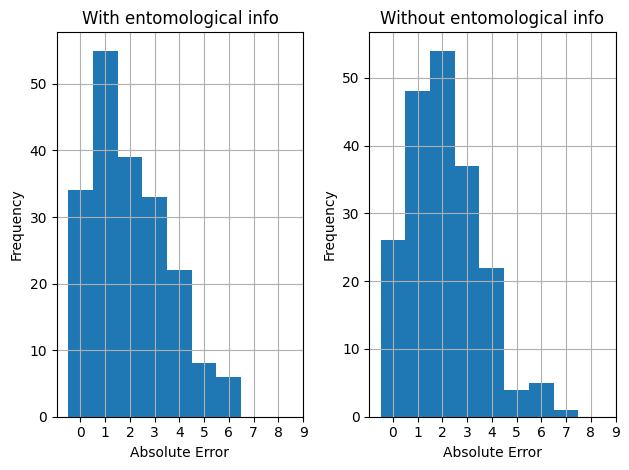

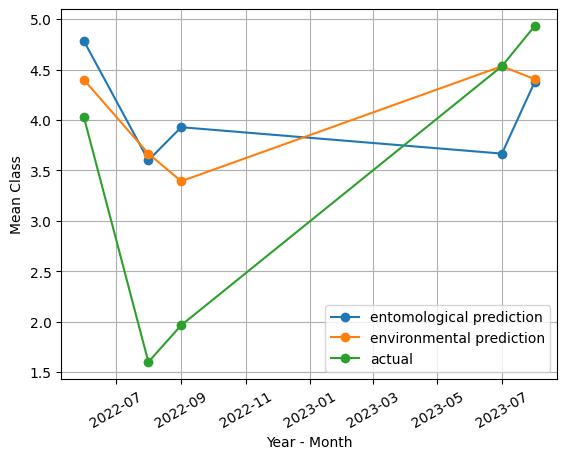

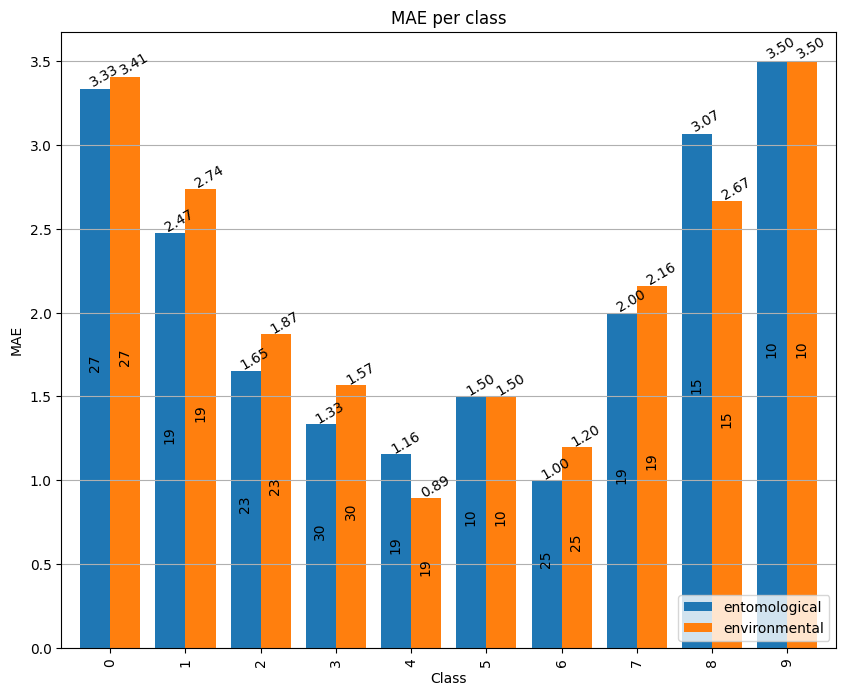

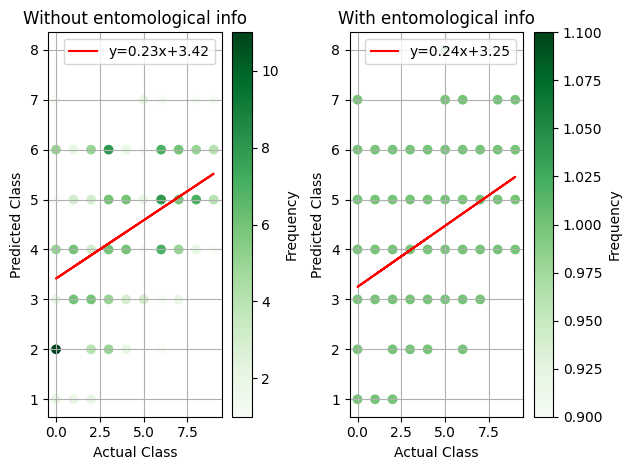

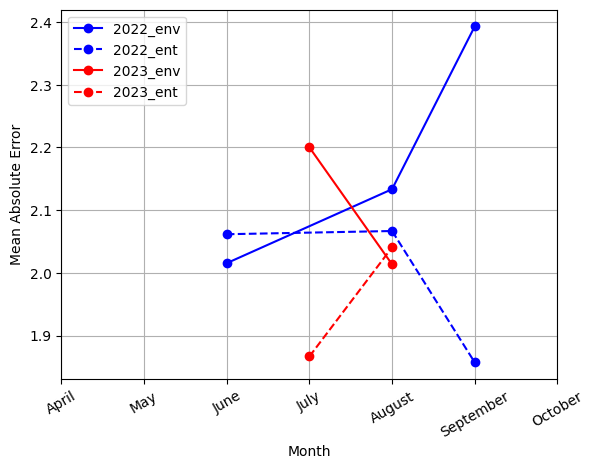

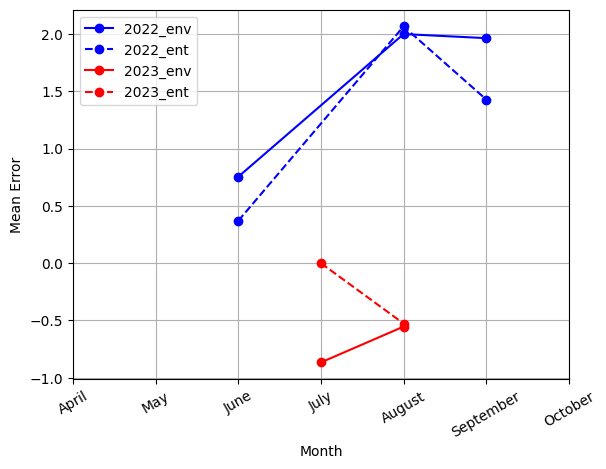

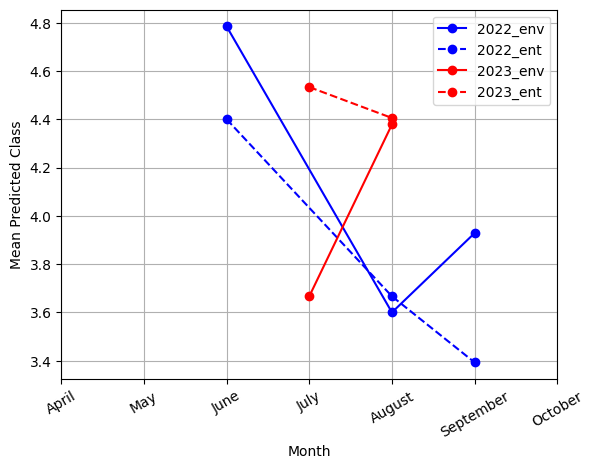

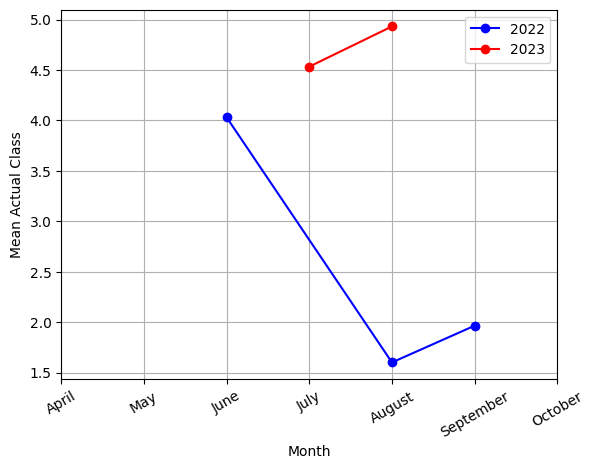

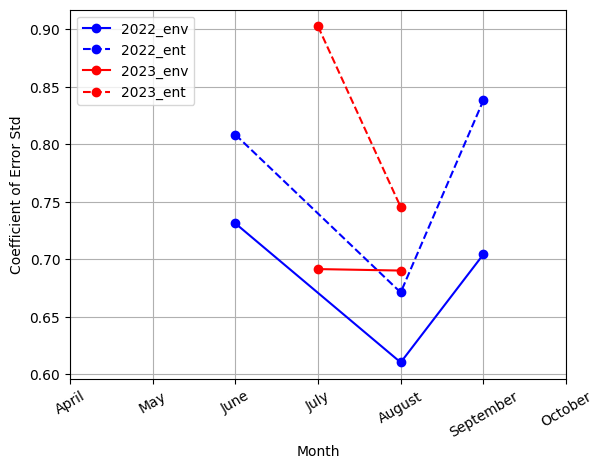

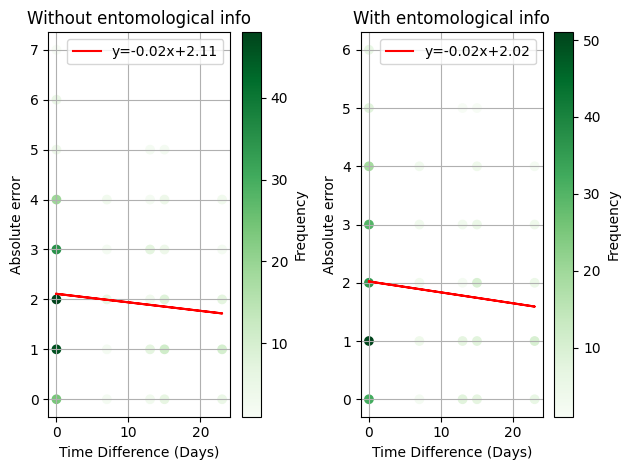

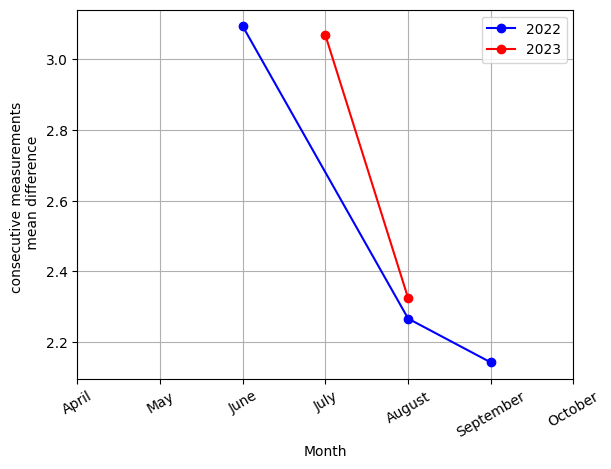

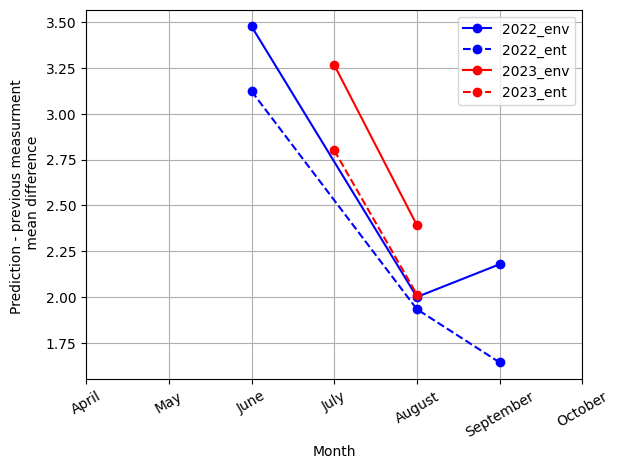

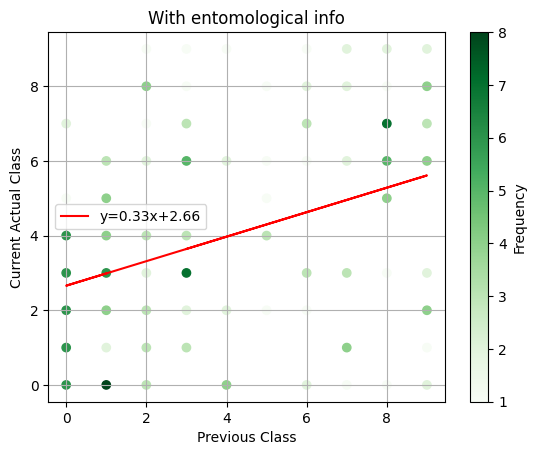

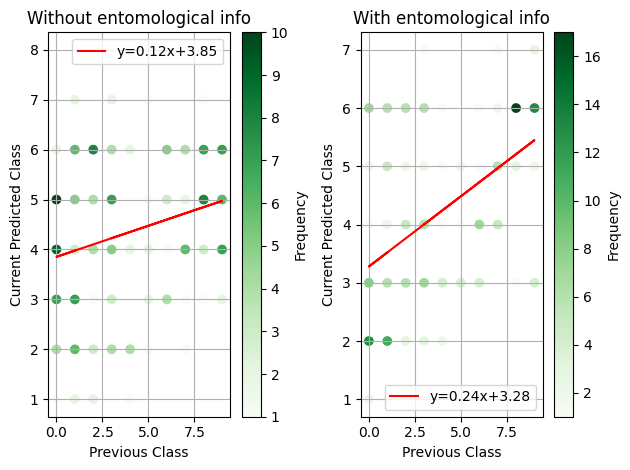

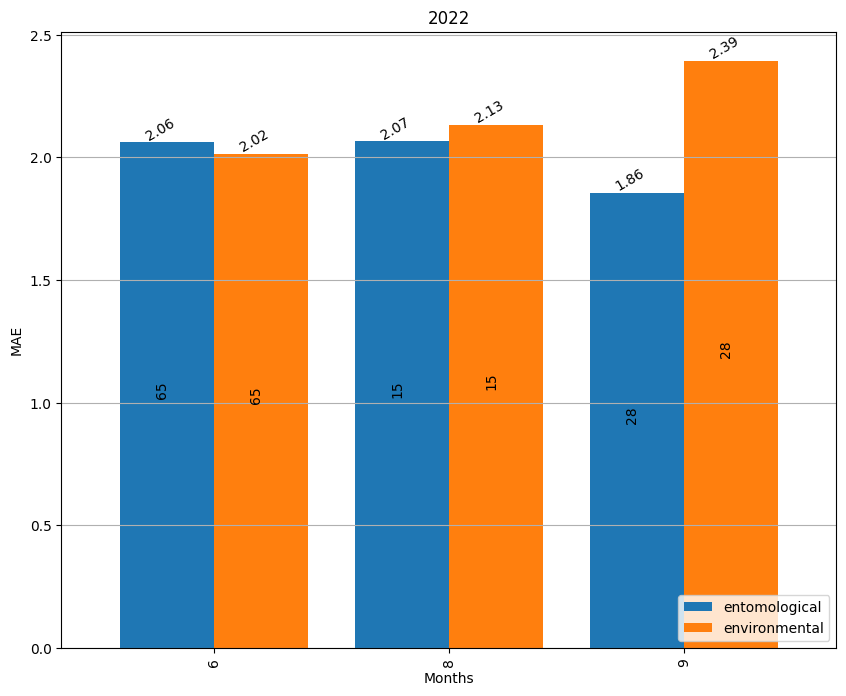

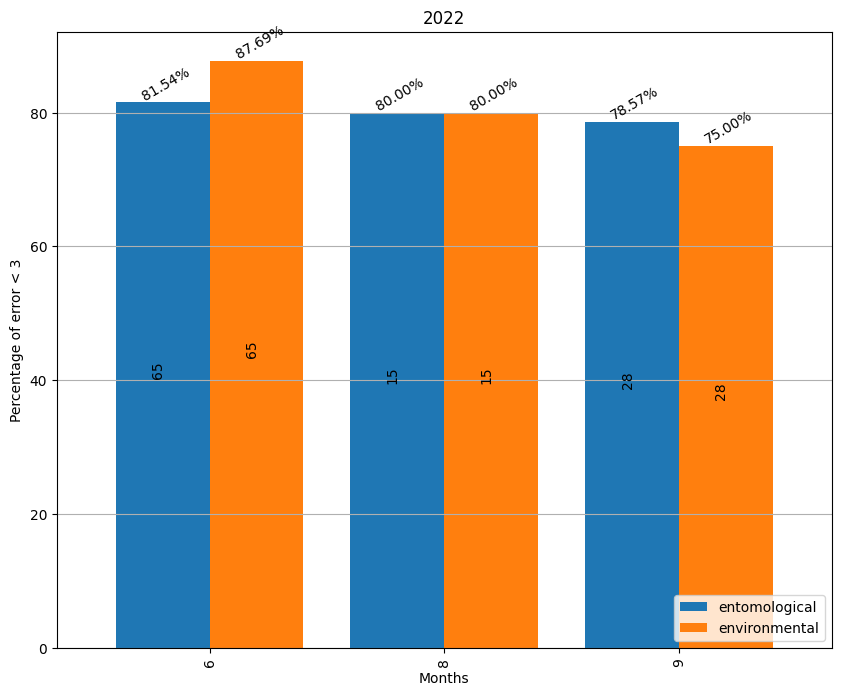

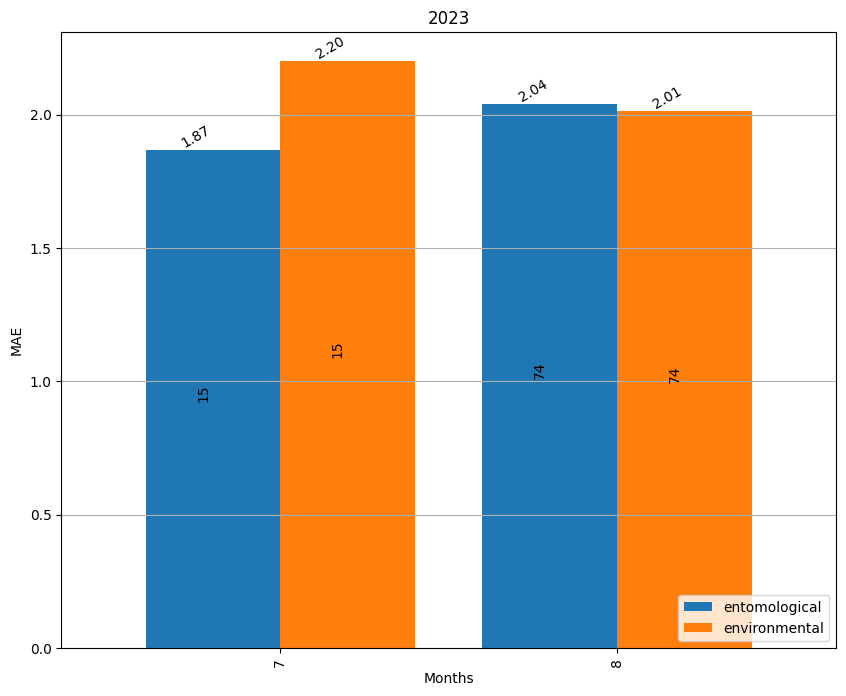

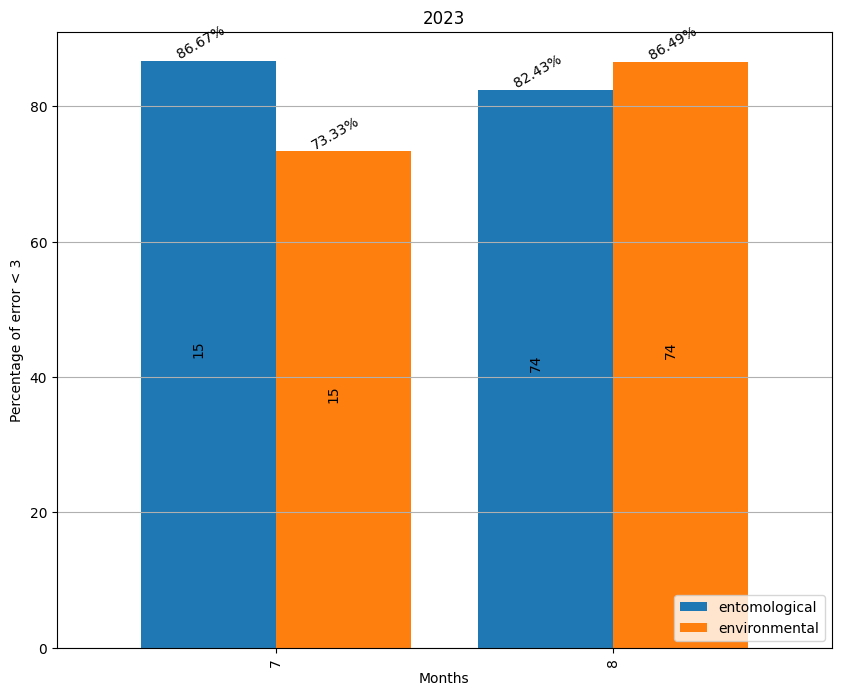

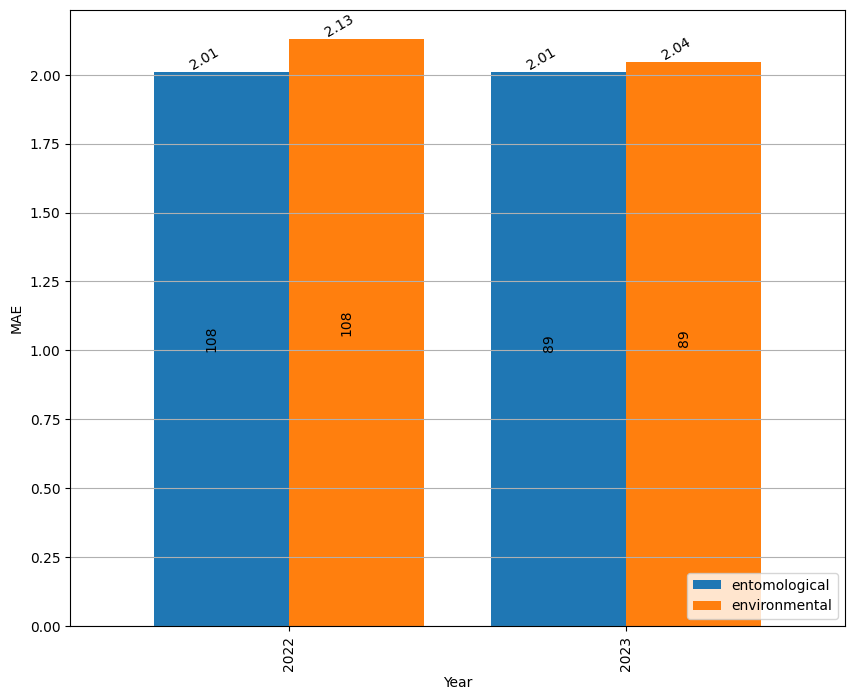

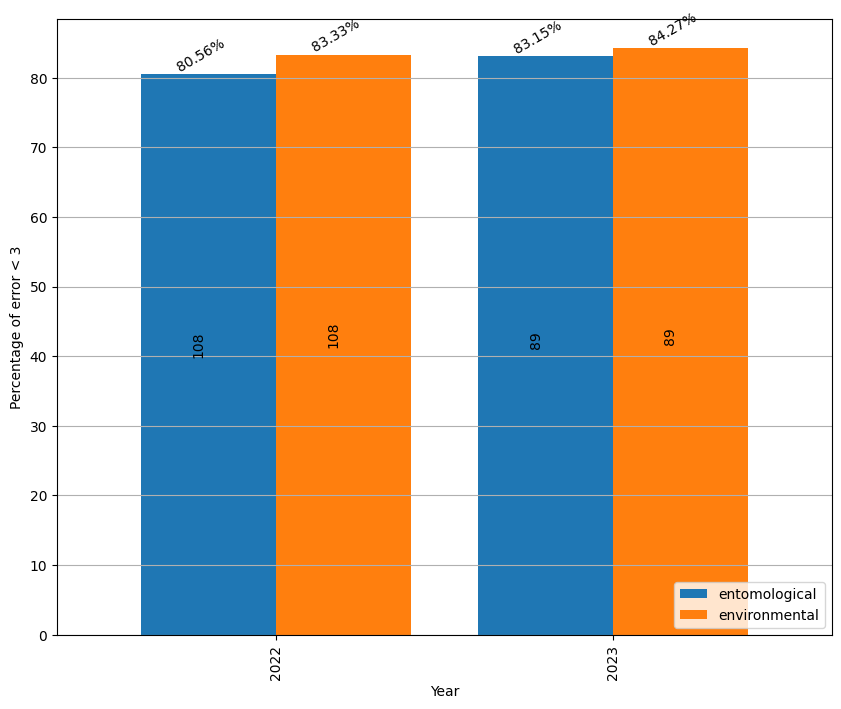

In [11]:
validation_plots_comparison(path)
metrics_plot_comparison(path)
# plot_correlations_comparison(path)

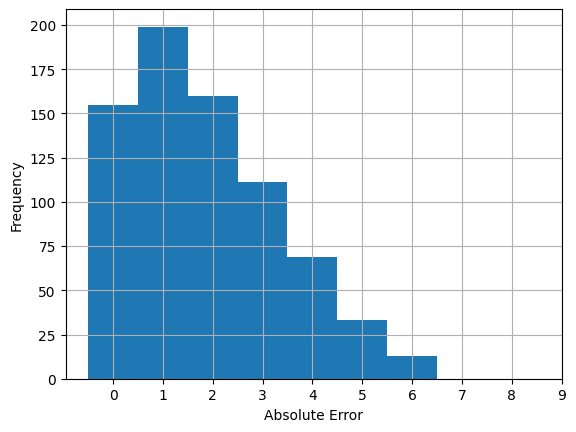

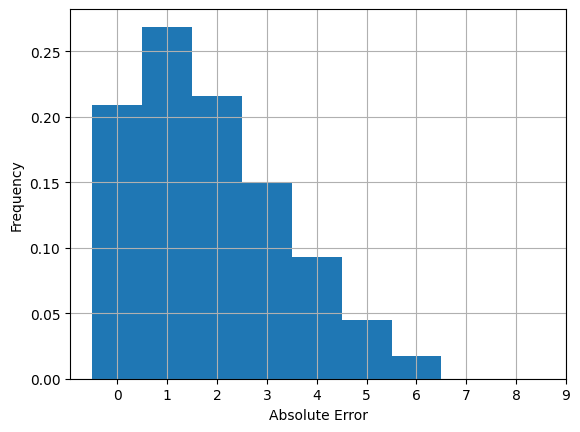

Error 0: 0.20945945945945946
Error 1: 0.2689189189189189
Error 0+1: 0.4783783783783784


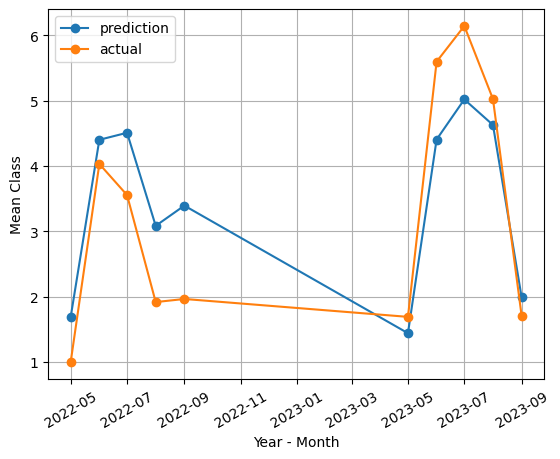

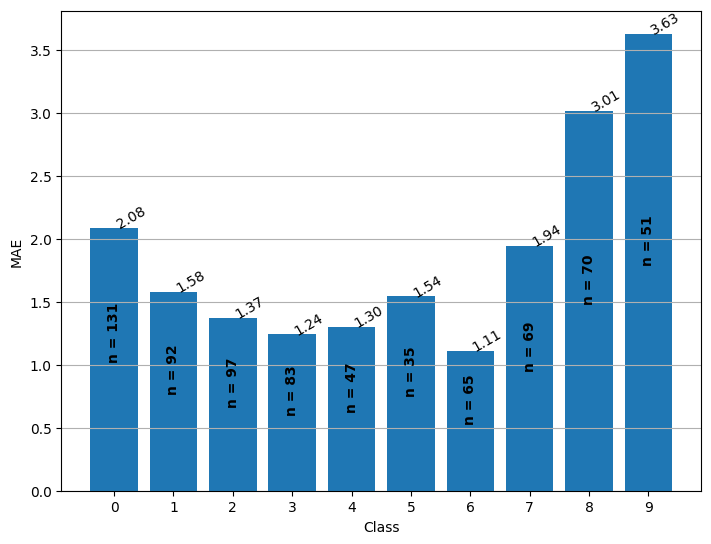

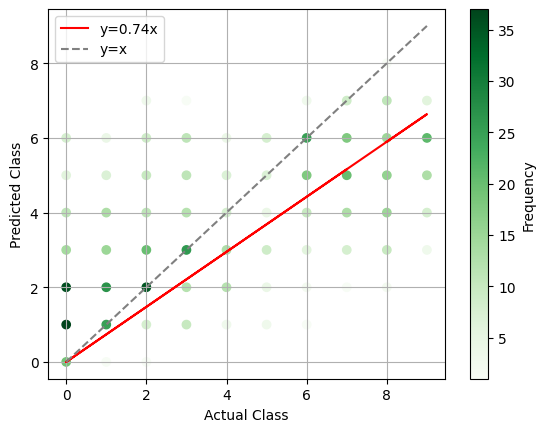

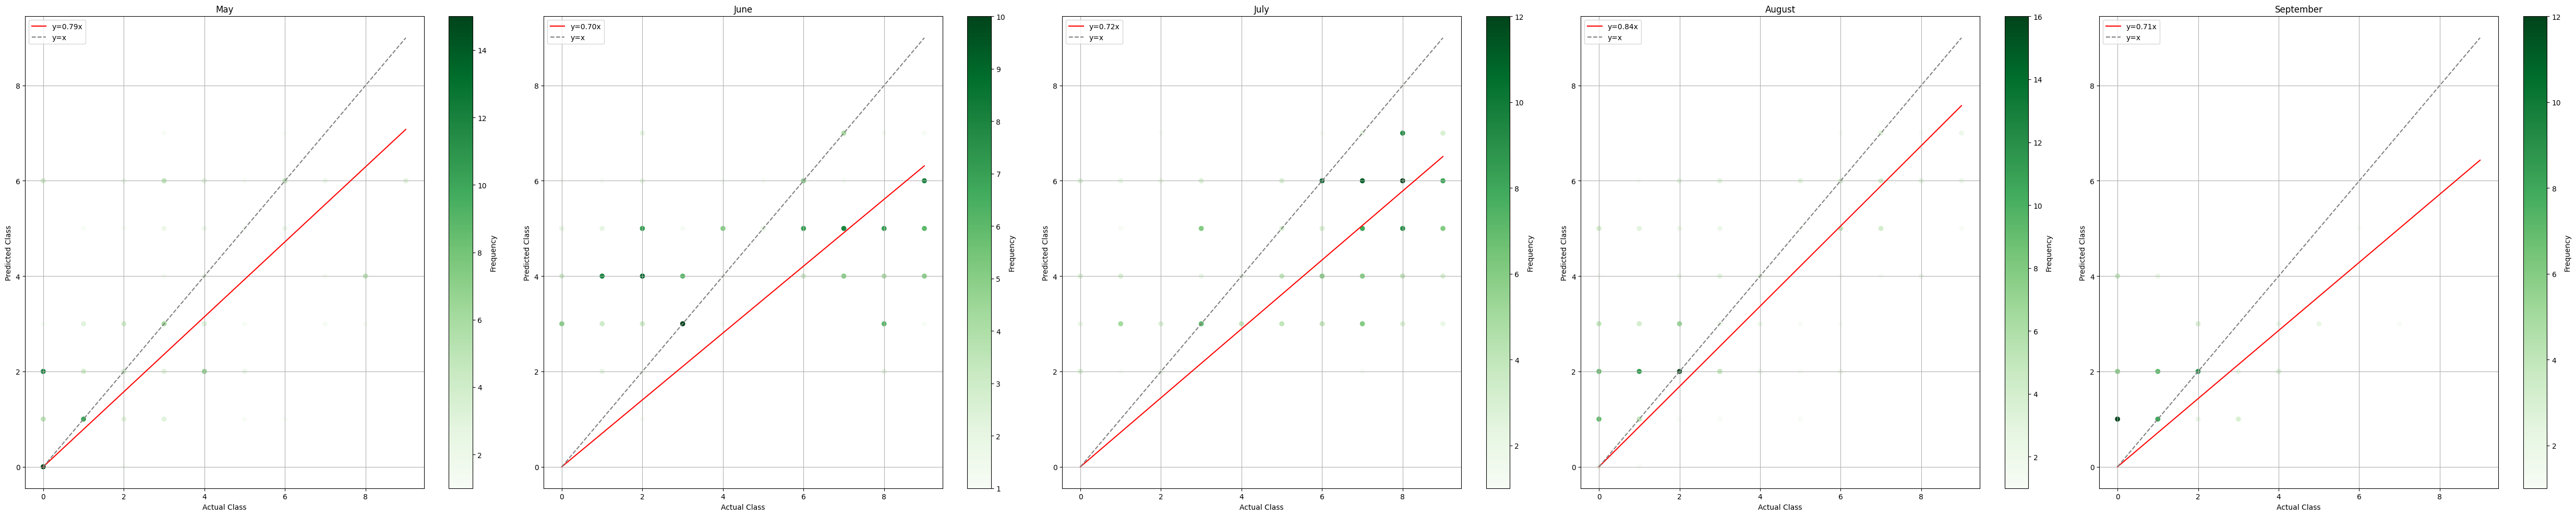

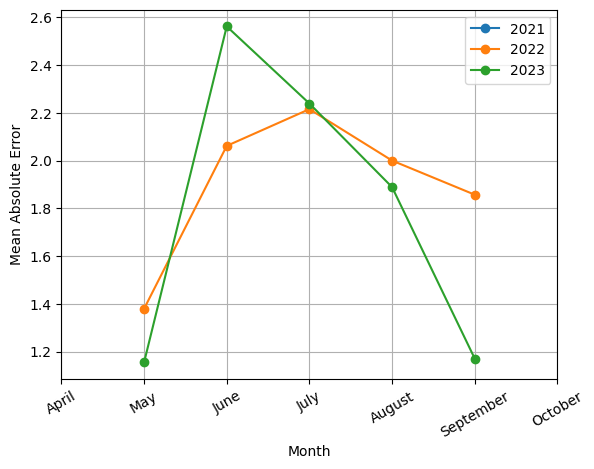

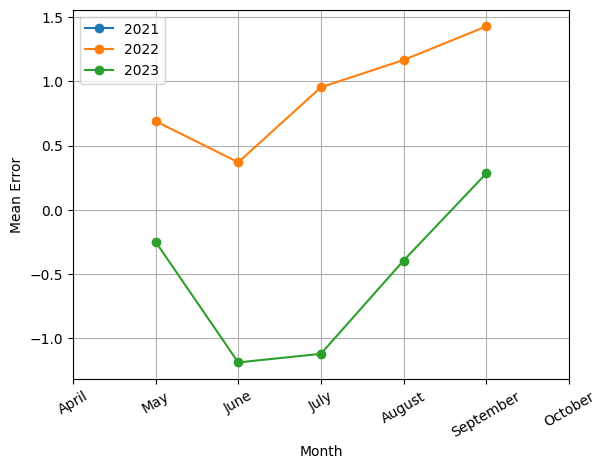

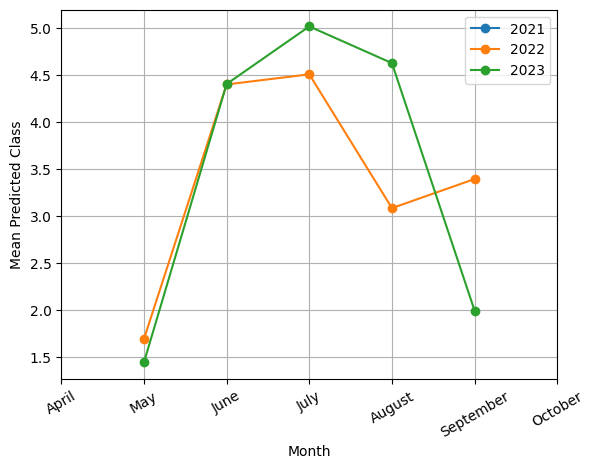

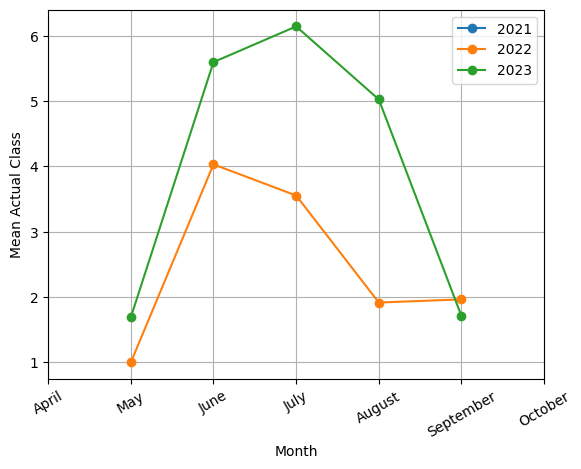

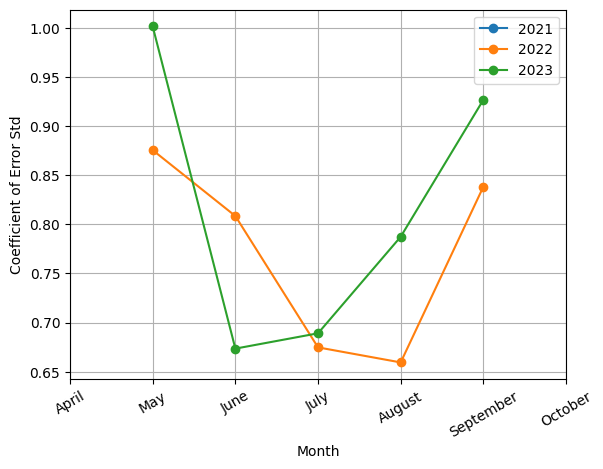

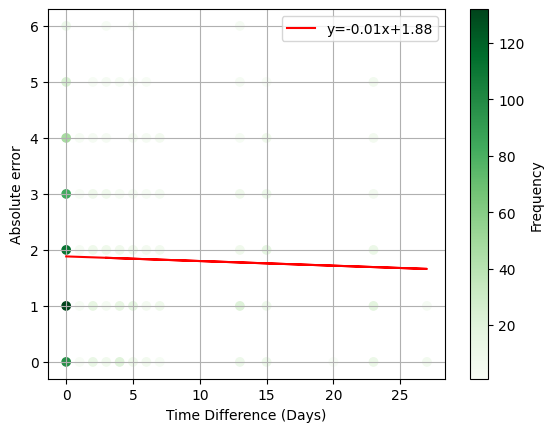

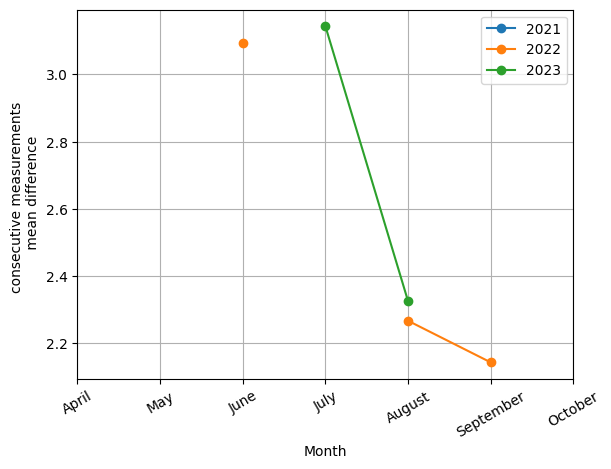

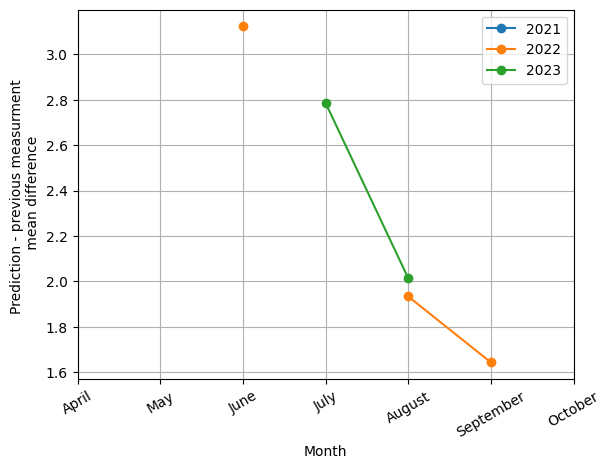

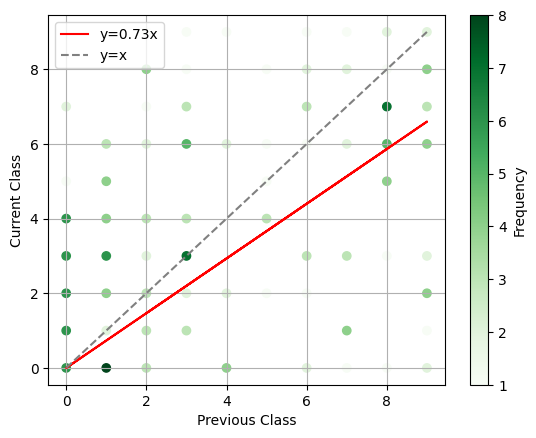

June: 0.8923076923076924
July: 0.2857142857142857
August: 0.42696629213483145
September: 0.4642857142857143


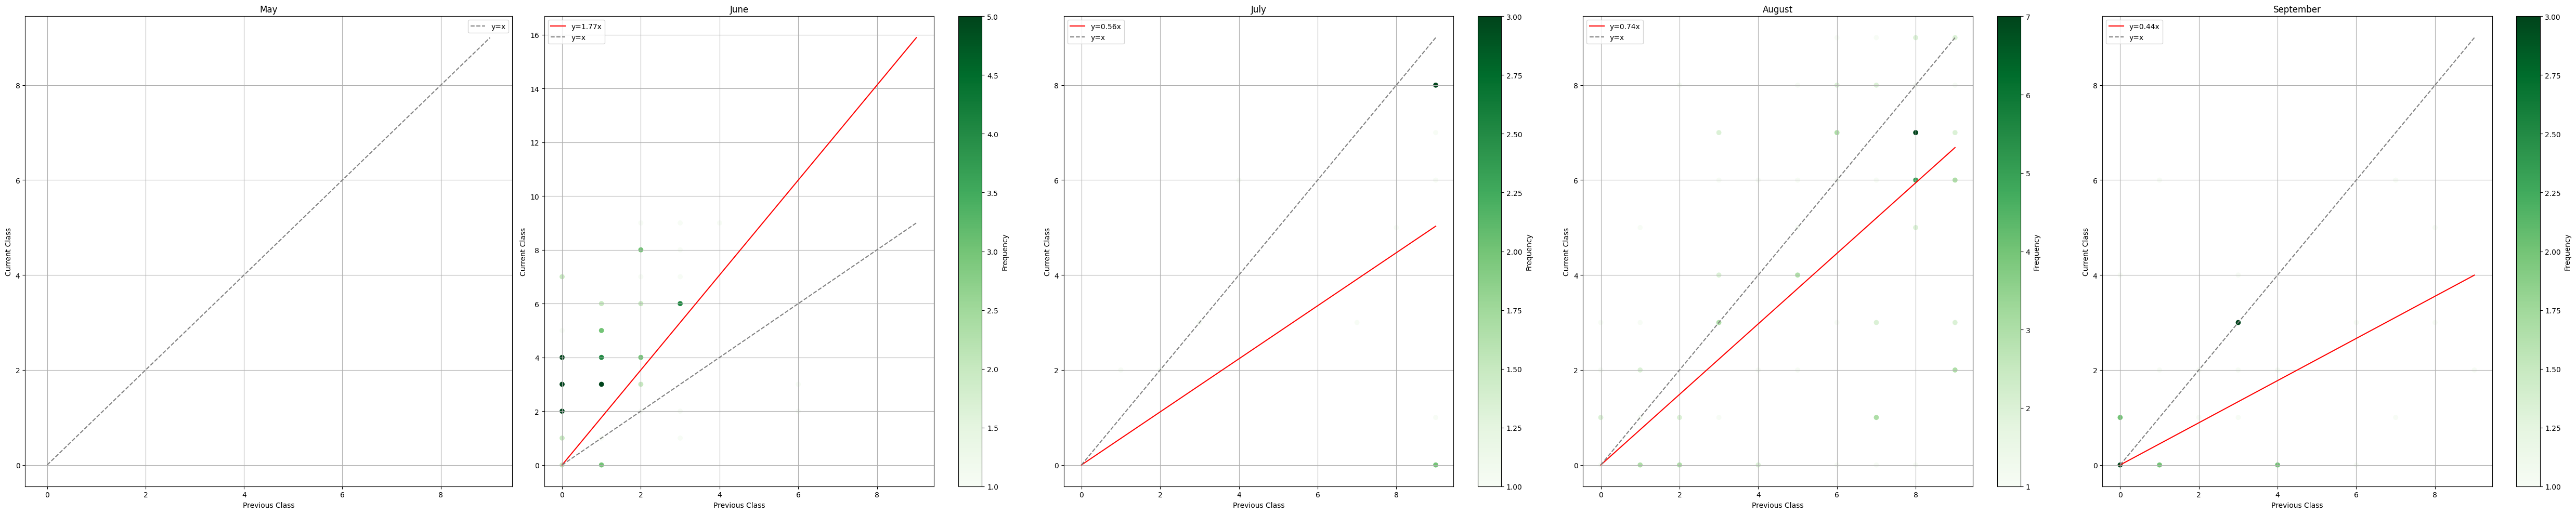

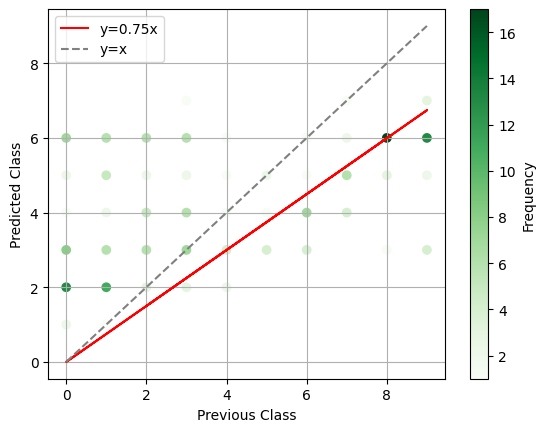

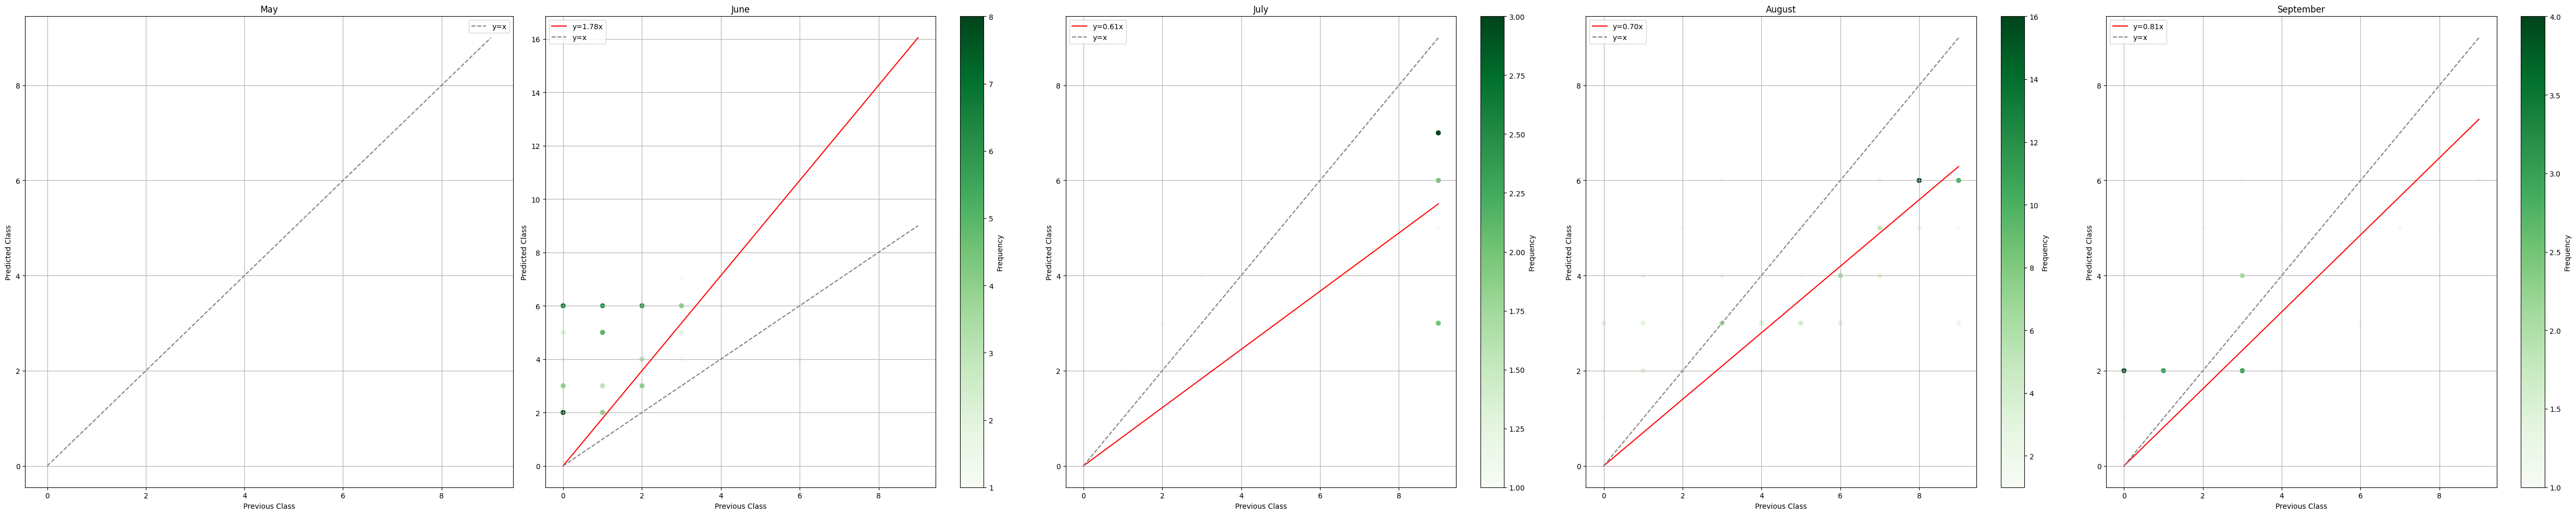

Overall MAE: 1.8527027027027028
Scaled MAE: 0.6168285789366439
Bias: -0.13108108108108107
Error <= 3: 84.46
Overall MAE with entomolgical info: 1.9948979591836735
% of error <= 3 with entomolgical info: 82.14
Overall MAE without entomolgical info: 1.8014705882352942
% of error <= 3 without entomolgical info: 85.29


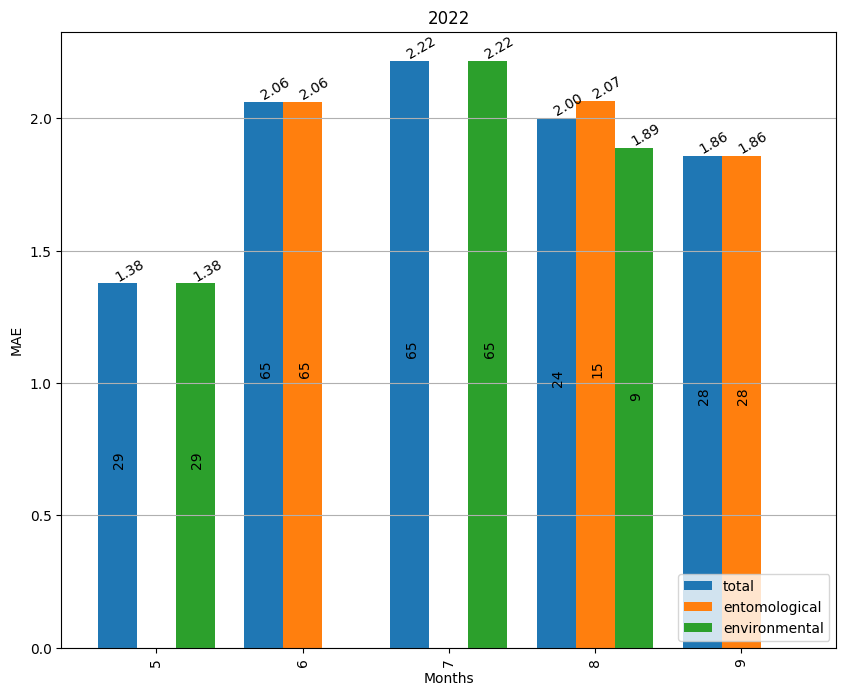

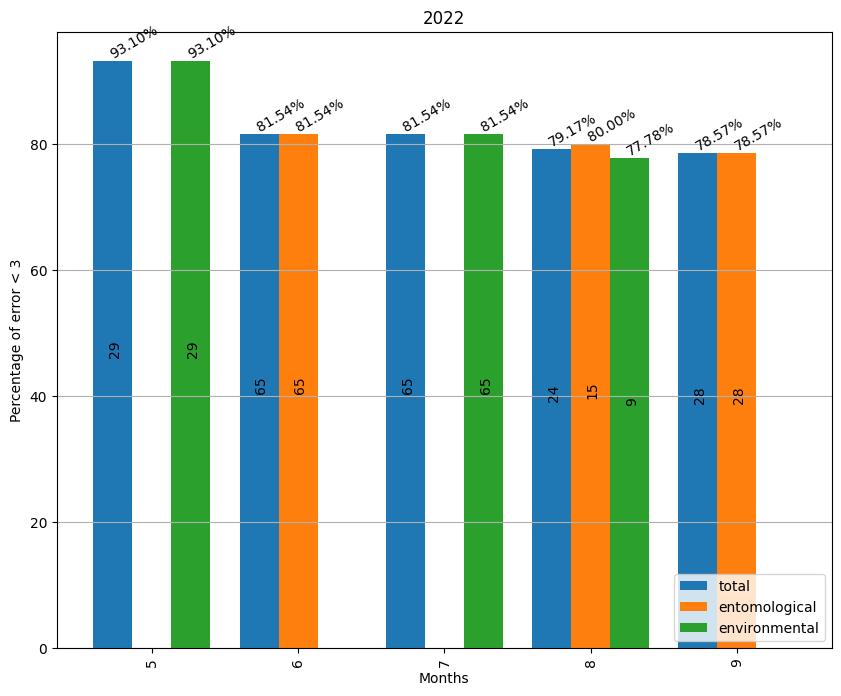

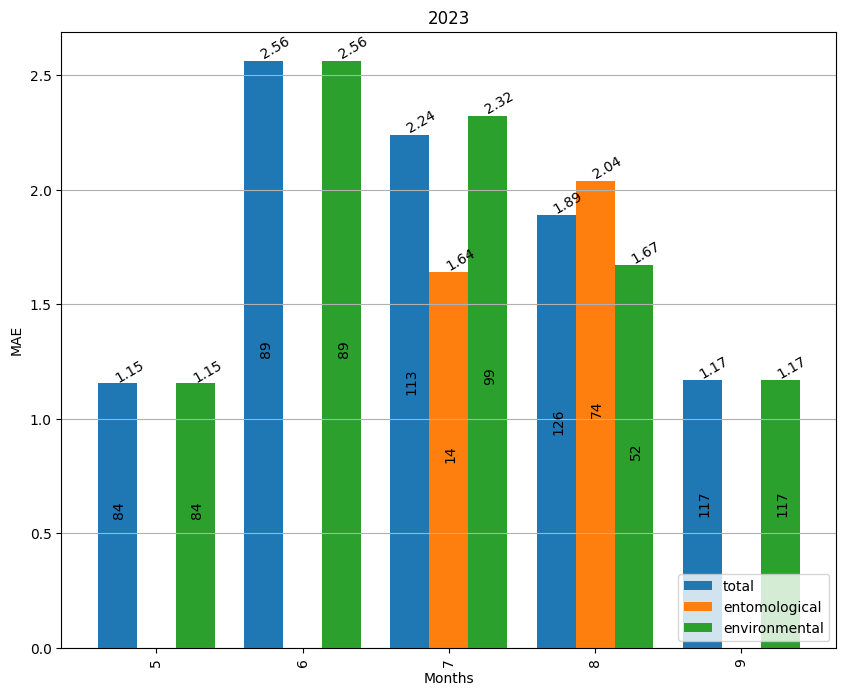

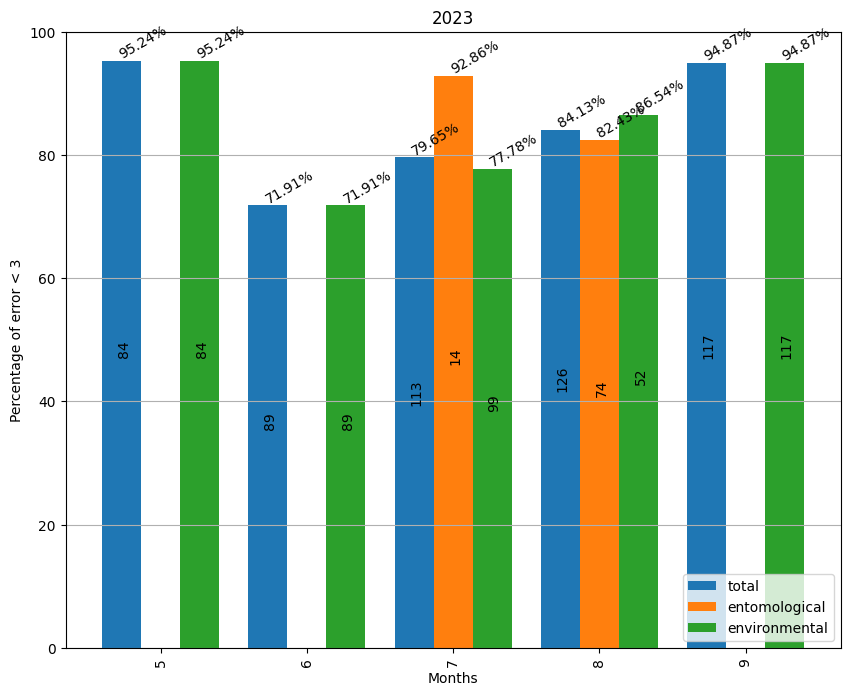

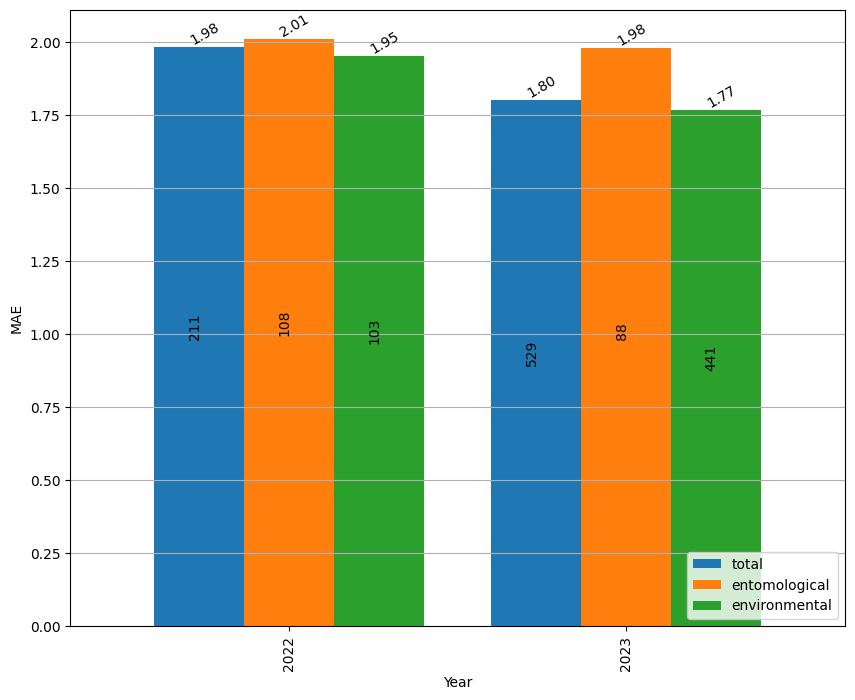

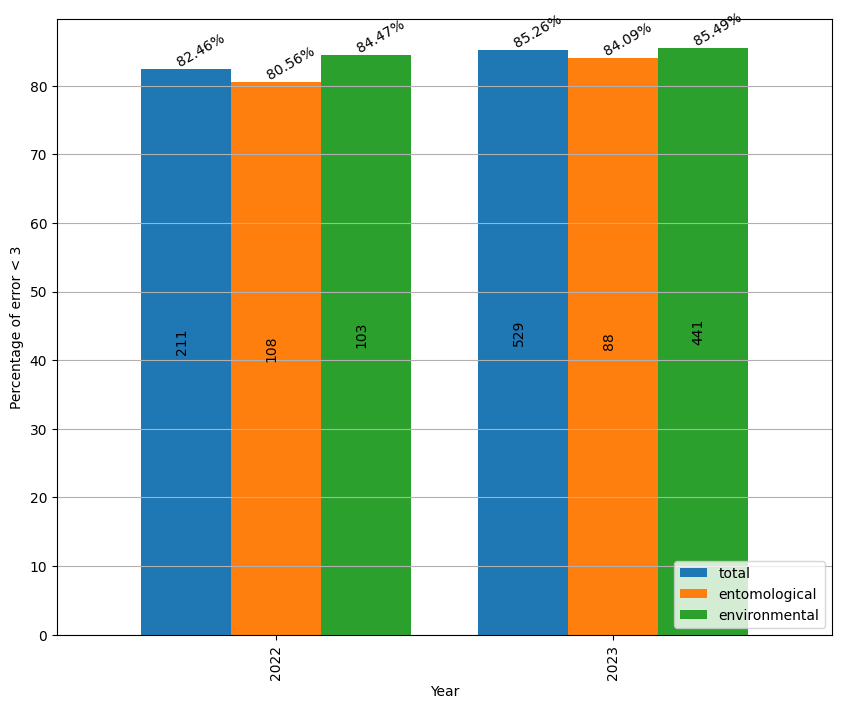

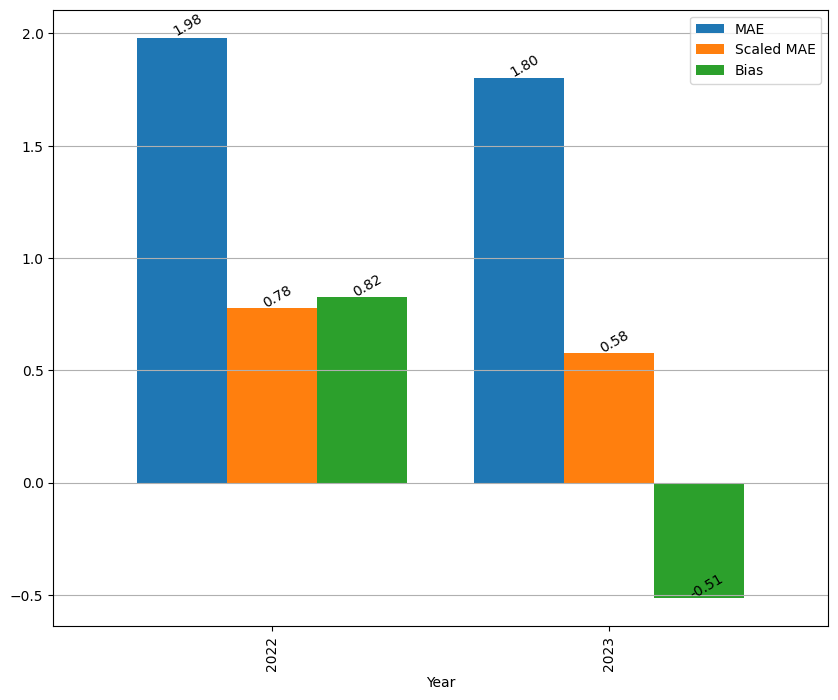

In [12]:
validation_plots(path)
metrics_plot(path)
# plot_correlations(path)

In [23]:
import sys
sys.modules.pop('Model_Validation_Module')
from Model_Validation_Module import give_predictions_nn, evaluate_nn, give_predictions_xgboost, evaluate_xgboost, validate_results, validate_results2, merge_predictions
sys.modules.pop('XGboost_Model_Module')
from XGboost_Model_Module import Xgboost_model